<a href="https://colab.research.google.com/github/ahme-spec/cours_pratique_dbt/blob/main/TP_Transformers_IZEKKI_AHMED.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Exercice 1:


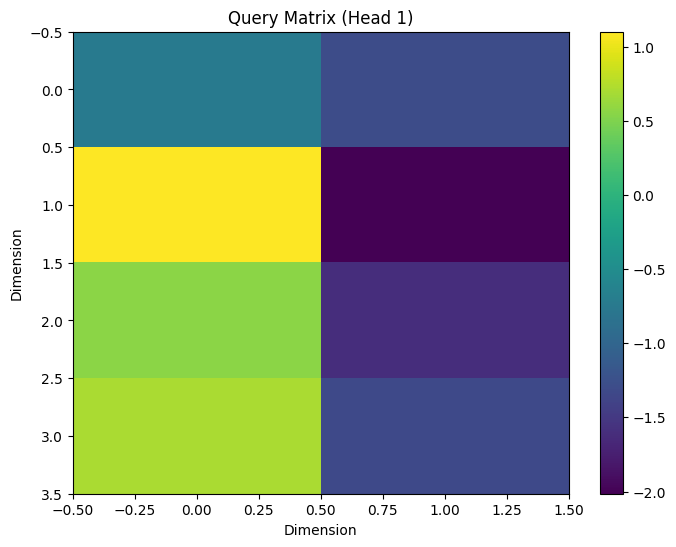

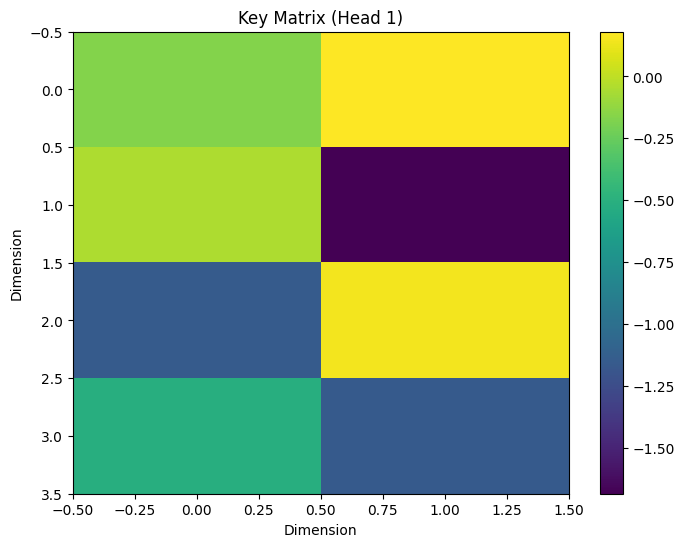

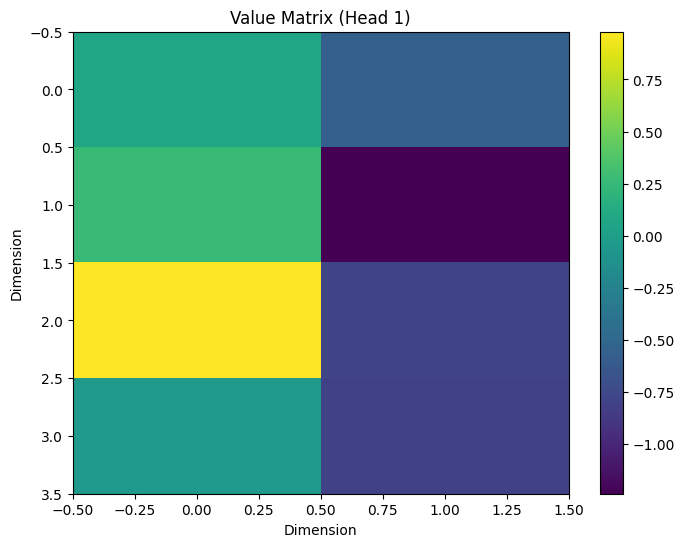


Scaling factor: 1.0


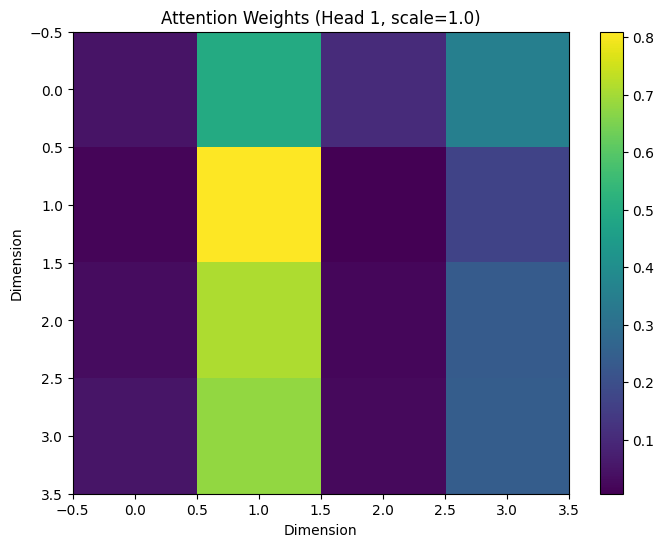

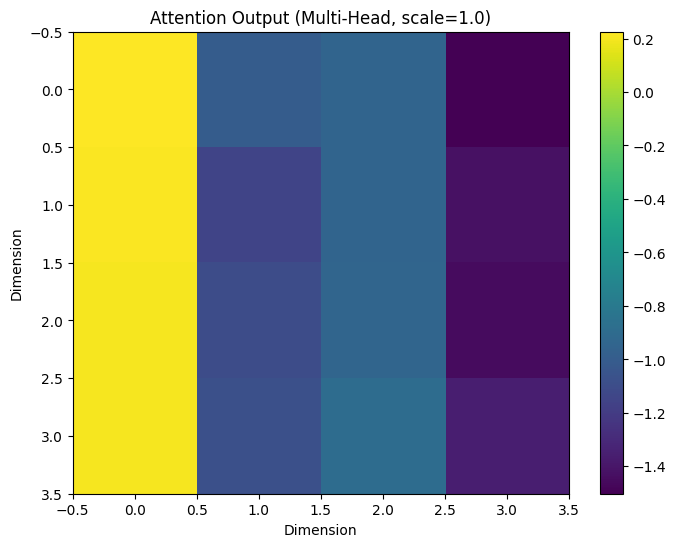


Scaling factor: 1.4142135623730951


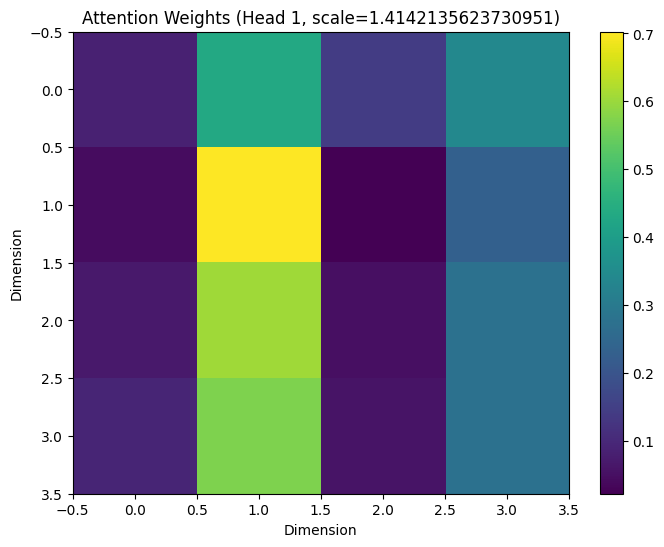

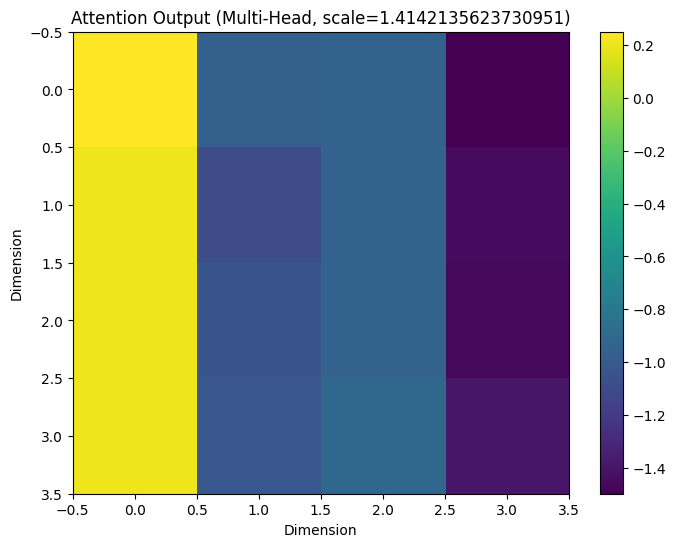


Scaling factor: 2.0


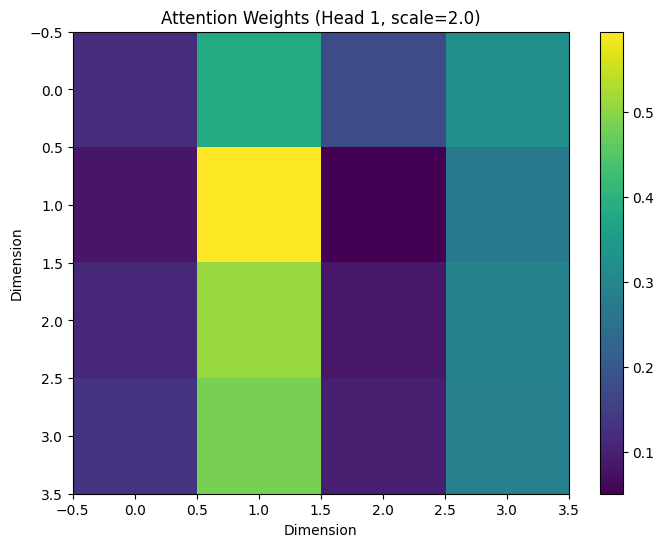

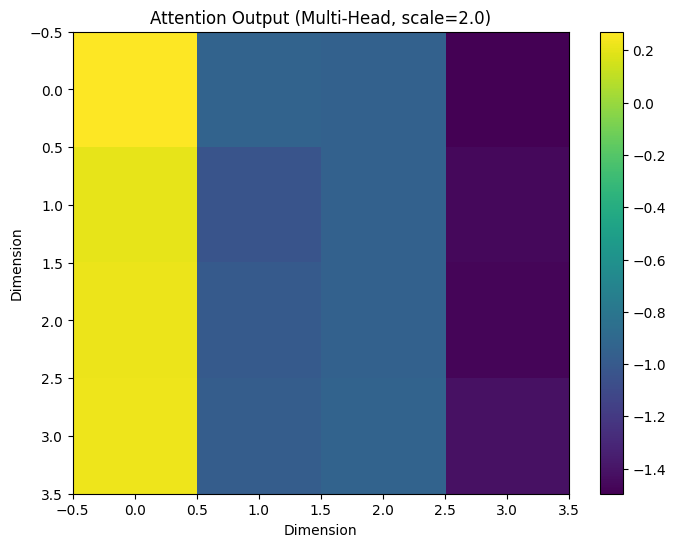


Scaling factor: 0.5


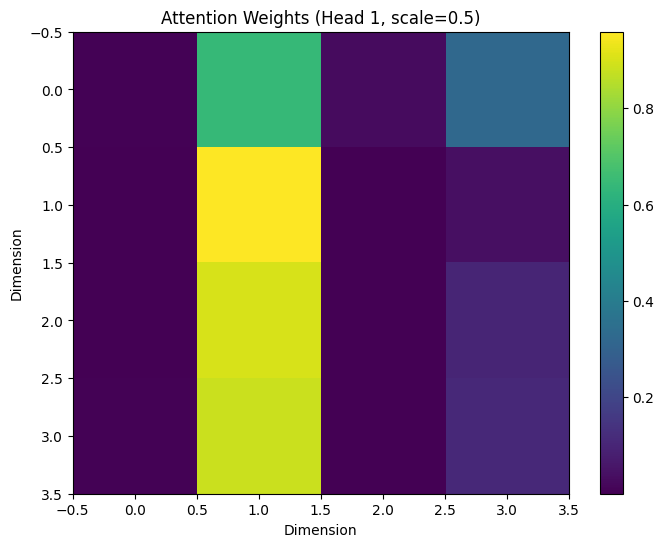

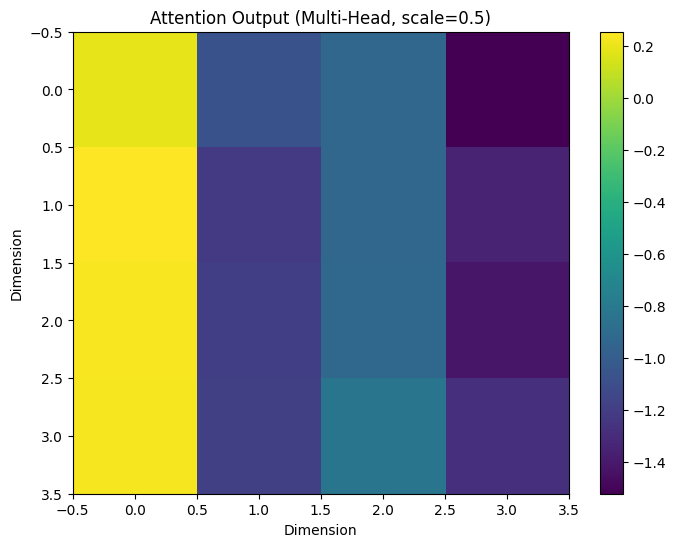

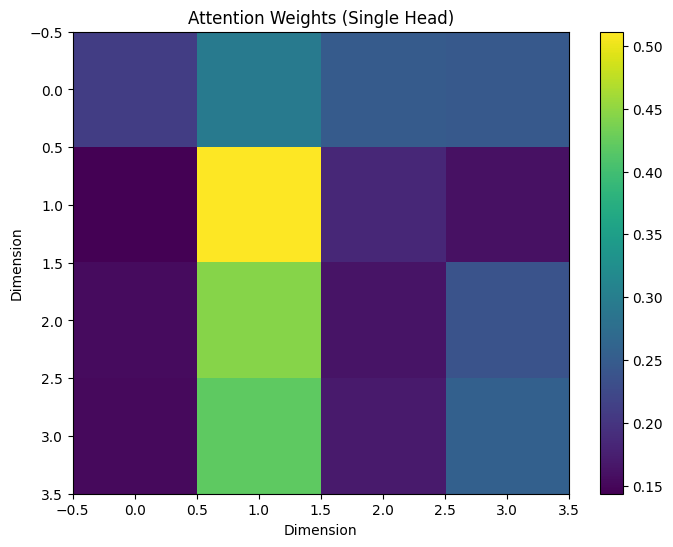

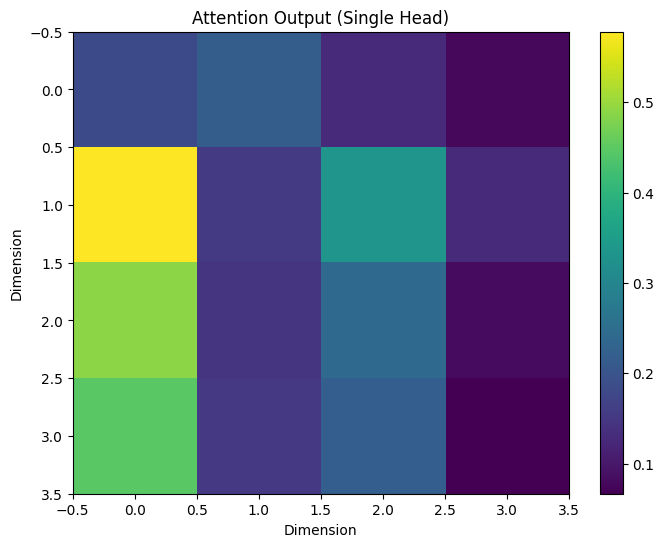

Input Sequence shape: (4, 4)
Input Sequence:
 [[1. 0. 1. 0.]
 [0. 2. 1. 0.]
 [1. 1. 0. 1.]
 [0. 1. 1. 1.]]
Query Matrix shape: (4, 4)
Query Matrix:
 [[-0.726024   -1.2912396   0.84283495  0.253125  ]
 [ 1.1011599  -2.0149791  -0.5399547  -0.73267245]
 [ 0.55928487 -1.6028966   0.4118657  -0.29858708]
 [ 0.71004534 -1.3297989   0.9246501  -1.1452041 ]]
Key Matrix:
 [[-0.16722232  0.18082911 -0.57565737 -0.5498592 ]
 [-0.04898804 -1.6854265  -1.0846012   0.28243434]
 [-1.1493444   0.14692235 -1.4687812   0.7896654 ]
 [-0.51359516 -1.1577184  -0.41031182 -0.3458773 ]]
Value Matrix:
 [[ 0.07298023 -0.55756265 -0.76269835 -0.62205744]
 [ 0.26708937 -1.2372717  -1.7597601  -1.8724922 ]
 [ 0.9791372  -0.7735096  -0.39583158 -1.4732873 ]
 [-0.03427678 -0.7992436  -0.8575867  -1.9995496 ]]
Attention Scores (multi-head) shape: (2, 4, 4)
Attention Output (single head):
 [[0.18223664 0.21672457 0.12763801 0.07694538]
 [0.57791257 0.15432684 0.33247426 0.12933703]
 [0.4881084  0.14577176 0.24062079

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

def plot_matrix(matrix, title):
    plt.figure(figsize=(8, 6))
    plt.imshow(matrix, cmap='viridis', aspect='auto')
    plt.colorbar()
    plt.title(title)
    plt.xlabel('Dimension')
    plt.ylabel('Dimension')
    plt.show()

# Input sequence: a matrix where each row represents a feature vector for a sequence element
# ici changement : ajout d'un 4eme element directement
input_sequence = np.array([[1, 0, 1, 0],
                           [0, 2, 1, 0],
                           [1, 1, 0, 1],
                           [0, 1, 1, 1]], dtype=np.float32)

# Model parameters
d_model = input_sequence.shape[1]  # Dimension of the embeddings (4)
num_heads = 2  # nombre de tetes attention = 2
depth = d_model // num_heads  # dimension par tete = 2

# fonction de projection multi tetes
def split_heads(x, num_heads):
    seq_len = x.shape[0]
    x = tf.reshape(x, (seq_len, num_heads, depth))
    return tf.transpose(x, perm=[1, 0, 2])  # (heads, seq_len, depth)

# Create query, key, and value matrices using linear transformations (Dense layers)
query_dense = tf.keras.layers.Dense(d_model)
key_dense = tf.keras.layers.Dense(d_model)
value_dense = tf.keras.layers.Dense(d_model)

query = query_dense(input_sequence)
key = key_dense(input_sequence)
value = value_dense(input_sequence)

# séparation par tete
query_heads = split_heads(query, num_heads)
key_heads = split_heads(key, num_heads)
value_heads = split_heads(value, num_heads)

# Visualize the query, key, and value matrices (pour la première tete)
plot_matrix(query_heads[0].numpy(), "Query Matrix (Head 1)")
plot_matrix(key_heads[0].numpy(), "Key Matrix (Head 1)")
plot_matrix(value_heads[0].numpy(), "Value Matrix (Head 1)")

# calcul des scores d'attention pour chaque tete
scores = tf.matmul(query_heads, key_heads, transpose_b=True)

# différents facteurs de scaling à tester
scaling_factors = [1.0, np.sqrt(depth), 2.0, 0.5]
attention_outputs = []

for factor in scaling_factors:
    print(f"\nScaling factor: {factor}")
    scaled_scores = scores / factor
    attention_weights = tf.nn.softmax(scaled_scores, axis=-1)

    # ici viisualiser les poids d'attention (premire tete)
    plot_matrix(attention_weights[0].numpy(), f"Attention Weights (Head 1, scale={factor})")

    # calcul sortie attention
    attention_output = tf.matmul(attention_weights, value_heads)

    # ici changement : concaténer les têtes
    concat_attention = tf.transpose(attention_output, perm=[1, 0, 2])
    concat_attention = tf.reshape(concat_attention, (concat_attention.shape[0], d_model))

    attention_outputs.append(concat_attention)

    # Visualiser la sortie attention
    plot_matrix(concat_attention.numpy(), f"Attention Output (Multi-Head, scale={factor})")

# comparer avec attention simple (une seule tete)
num_heads_single = 1

query_single = tf.keras.layers.Dense(d_model)(input_sequence)
key_single = tf.keras.layers.Dense(d_model)(input_sequence)
value_single = tf.keras.layers.Dense(d_model)(input_sequence)

scores_single = tf.matmul(query_single, key_single, transpose_b=True) / np.sqrt(d_model)
attention_weights_single = tf.nn.softmax(scores_single, axis=-1)
attention_output_single = tf.matmul(attention_weights_single, value_single)

# Visualisations single-head
plot_matrix(attention_weights_single.numpy(), "Attention Weights (Single Head)")
plot_matrix(attention_output_single.numpy(), "Attention Output (Single Head)")

# Print the results for reference
print("Input Sequence shape:", input_sequence.shape)
print("Input Sequence:\n", input_sequence)
print("Query Matrix shape:", query.shape)
print("Query Matrix:\n", query.numpy())
print("Key Matrix:\n", key.numpy())
print("Value Matrix:\n", value.numpy())
print("Attention Scores (multi-head) shape:", scores.shape)
print("Attention Output (single head):\n", attention_output_single.numpy())

#EXERCICE 2

/tmp/ipython-input-2560682321.py:6: RuntimeWarning: invalid value encountered in divide
  return np.exp(x) / np.sum(np.exp(x), axis=-1, keepdims=True)


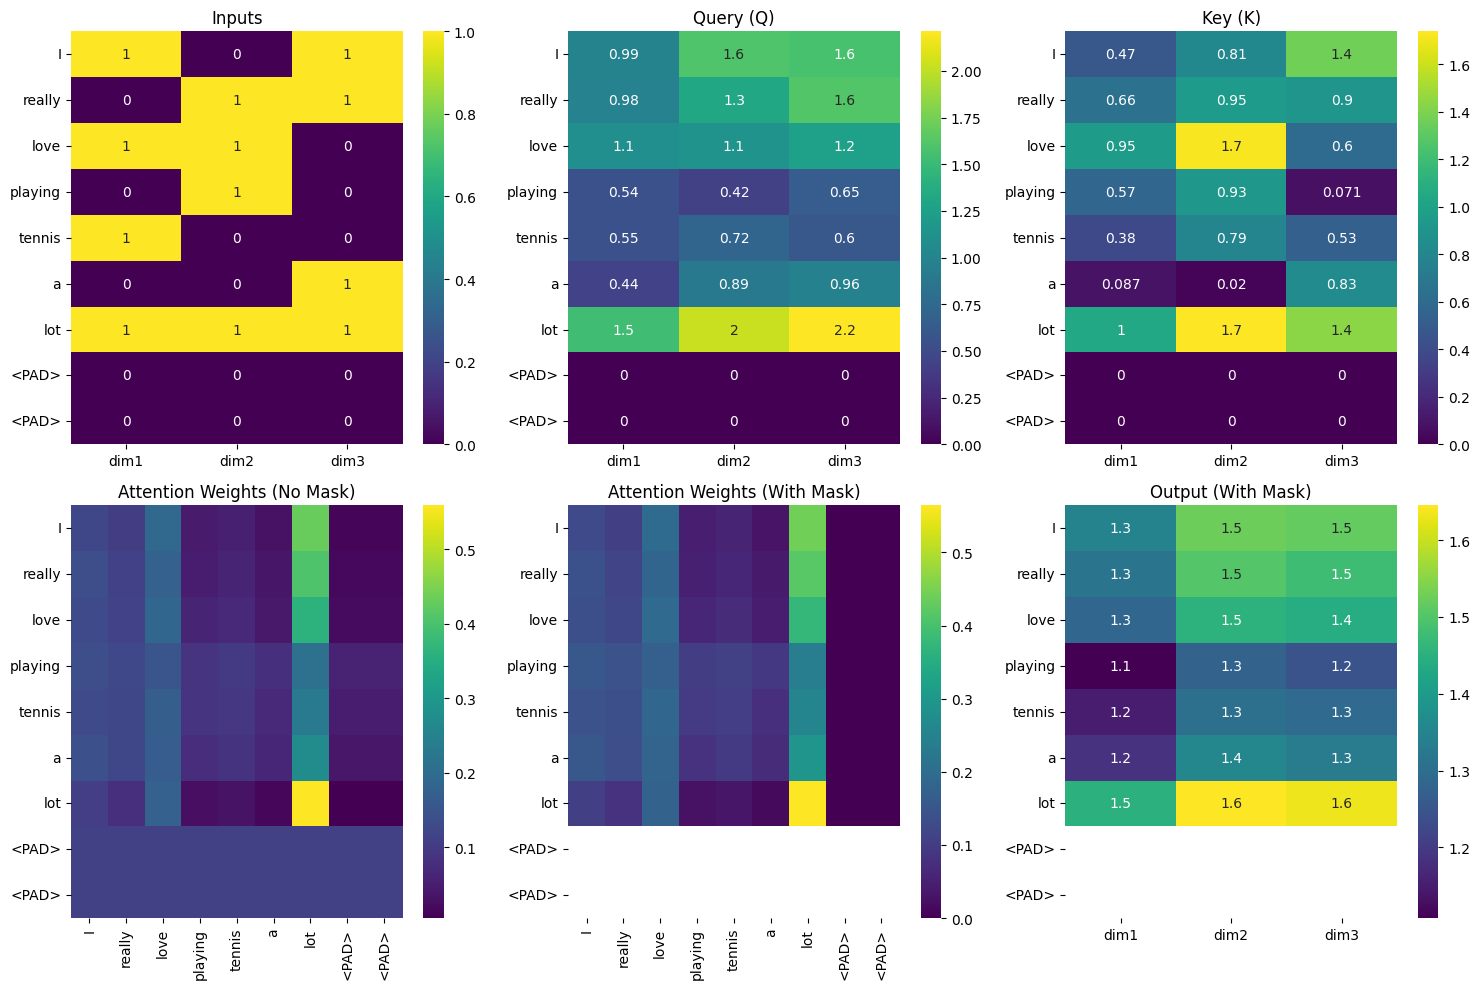

Phrase: ['I', 'really', 'love', 'playing', 'tennis', 'a', 'lot', '<PAD>', '<PAD>']

Mask:
 [1 1 1 1 1 1 1 0 0]

Inputs:
 [[1 0 1]
 [0 1 1]
 [1 1 0]
 [0 1 0]
 [1 0 0]
 [0 0 1]
 [1 1 1]
 [0 0 0]
 [0 0 0]]

Query (Q):
 [[0.98640072 1.60696237 1.56642614]
 [0.98247039 1.3154278  1.60955687]
 [1.09369669 1.13884417 1.24865749]
 [0.54488318 0.4236548  0.64589411]
 [0.5488135  0.71518937 0.60276338]
 [0.43758721 0.891773   0.96366276]
 [1.5312839  2.03061717 2.21232025]
 [0.         0.         0.        ]
 [0.         0.         0.        ]]

Key (K):
 [[0.47057082 0.81194344 1.36151477]
 [0.65517386 0.94581504 0.9036559 ]
 [0.95148608 1.71732168 0.59993098]
 [0.56804456 0.92559664 0.07103606]
 [0.38344152 0.79172504 0.52889492]
 [0.0871293  0.0202184  0.83261985]
 [1.03861538 1.73754007 1.43255082]
 [0.         0.         0.        ]
 [0.         0.         0.        ]]

Value (V):
 [[0.89643118 1.50993317 1.12197163]
 [0.91743299 1.10140038 0.92388246]
 [1.57731532 1.33149151 1.75914752]
 [

/tmp/ipython-input-2560682321.py:6: RuntimeWarning: invalid value encountered in divide
  return np.exp(x) / np.sum(np.exp(x), axis=-1, keepdims=True)


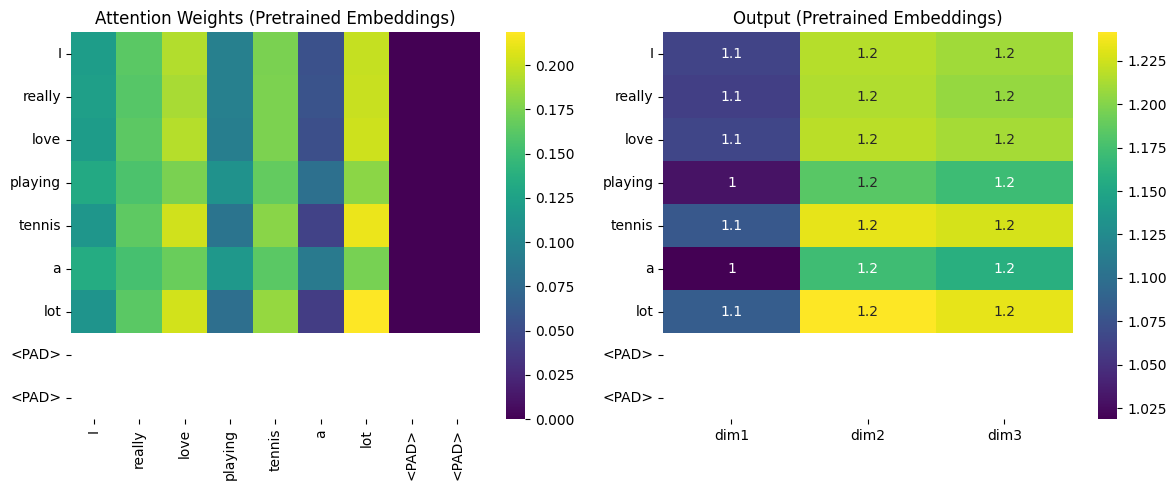

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def softmax(x):
    return np.exp(x) / np.sum(np.exp(x), axis=-1, keepdims=True)

# ici changement : nouvelle phrase plus longue
sentence = ["I", "really", "love", "playing", "tennis", "a", "lot", "<PAD>", "<PAD>"]

# ici changement : creation d'embeddings simples (3 dimensions par mot)
# On cree des embedding pour chaque mot du vocabulaire
embeddings = {
    "I": [1, 0, 1],
    "really": [0, 1, 1],
    "love": [1, 1, 0],
    "playing": [0, 1, 0],
    "tennis": [1, 0, 0],
    "a": [0, 0, 1],
    "lot": [1, 1, 1],
    "<PAD>": [0, 0, 0]  # ici changement : ajout du token de padding
}

# Convert sentence to sequence of embeddings
inputs = np.array([embeddings[word] for word in sentence])

# ici changement : création d’un masque pour ignorer les tokens "<PAD>"
# Le masque vaut 0 pour PAD et 1 sinon
mask = np.array([1 if word != "<PAD>" else 0 for word in sentence])
mask_matrix = np.outer(mask, mask)  # pour avoir un masque 2D sur les scores

# Initialize weights for Query, Key, and Value matrices
np.random.seed(0)
Wq = np.random.rand(3, 3)
Wk = np.random.rand(3, 3)
Wv = np.random.rand(3, 3)

# Compute Query, Key, and Value matrices
Q = np.dot(inputs, Wq)
K = np.dot(inputs, Wk)
V = np.dot(inputs, Wv)

# Compute attention scores
scores = np.dot(Q, K.T) / np.sqrt(K.shape[1])

# ici changement : application du masque avant le softmax
scores_masked = np.where(mask_matrix == 0, -1e9, scores)

# Apply softmax to get attention weights
attention_weights_no_mask = softmax(scores)  # sans masque
attention_weights_with_mask = softmax(scores_masked)  # avec masque

# Compute the output of the self-attention mechanism
output_no_mask = np.dot(attention_weights_no_mask, V)
output_with_mask = np.dot(attention_weights_with_mask, V)

# Plotting the results
plt.figure(figsize=(15, 10))

# Inputs
plt.subplot(2, 3, 1)
sns.heatmap(inputs, annot=True, cmap='viridis', xticklabels=['dim1', 'dim2', 'dim3'], yticklabels=sentence)
plt.title('Inputs')

# Query
plt.subplot(2, 3, 2)
sns.heatmap(Q, annot=True, cmap='viridis', xticklabels=['dim1', 'dim2', 'dim3'], yticklabels=sentence)
plt.title('Query (Q)')

# Key
plt.subplot(2, 3, 3)
sns.heatmap(K, annot=True, cmap='viridis', xticklabels=['dim1', 'dim2', 'dim3'], yticklabels=sentence)
plt.title('Key (K)')

# Attention Weights without Mask
plt.subplot(2, 3, 4)
sns.heatmap(attention_weights_no_mask, annot=False, cmap='viridis', xticklabels=sentence, yticklabels=sentence)
plt.title('Attention Weights (No Mask)')

# Attention Weights with Mask
plt.subplot(2, 3, 5)
sns.heatmap(attention_weights_with_mask, annot=False, cmap='viridis', xticklabels=sentence, yticklabels=sentence)
plt.title('Attention Weights (With Mask)')

# ici changement : comparaison de sortie
plt.subplot(2, 3, 6)
sns.heatmap(output_with_mask, annot=True, cmap='viridis', xticklabels=['dim1', 'dim2', 'dim3'], yticklabels=sentence)
plt.title('Output (With Mask)')

plt.tight_layout()
plt.show()

print("Phrase:", sentence)
print("\nMask:\n", mask)
print("\nInputs:\n", inputs)
print("\nQuery (Q):\n", Q)
print("\nKey (K):\n", K)
print("\nValue (V):\n", V)
print("\nAttention Scores:\n", scores)
print("\nAttention Weights (No Mask):\n", attention_weights_no_mask)
print("\nAttention Weights (With Mask):\n", attention_weights_with_mask)
print("\nOutput (With Mask):\n", output_with_mask)

# ici changement : test avec une autre méthode d’initialisation d’embeddings
# Pour simuler des embeddings pré-entraînés (comme GloVe), on crée des vecteurs fixes simples
pretrained_embeddings = {
    "I": [0.8, 0.1, 0.7],
    "really": [0.6, 0.9, 0.3],
    "love": [0.9, 0.8, 0.2],
    "playing": [0.4, 0.7, 0.1],
    "tennis": [0.9, 0.3, 0.8],
    "a": [0.2, 0.1, 0.5],
    "lot": [0.7, 0.6, 0.9],
    "<PAD>": [0.0, 0.0, 0.0]
}

inputs_pretrained = np.array([pretrained_embeddings[word] for word in sentence])
Q2 = np.dot(inputs_pretrained, Wq)
K2 = np.dot(inputs_pretrained, Wk)
V2 = np.dot(inputs_pretrained, Wv)
scores2 = np.dot(Q2, K2.T) / np.sqrt(K2.shape[1])
scores2_masked = np.where(mask_matrix == 0, -1e9, scores2)
attention_weights_pretrained = softmax(scores2_masked)
output_pretrained = np.dot(attention_weights_pretrained, V2)

# Visualisation des résultats avec embeddings "pré-entraînés"
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.heatmap(attention_weights_pretrained, cmap='viridis', xticklabels=sentence, yticklabels=sentence)
plt.title('Attention Weights (Pretrained Embeddings)')

plt.subplot(1, 2, 2)
sns.heatmap(output_pretrained, annot=True, cmap='viridis', xticklabels=['dim1', 'dim2', 'dim3'], yticklabels=sentence)
plt.title('Output (Pretrained Embeddings)')

plt.tight_layout()
plt.show()


1. Effet du Masking :
Sans masque : Les <PAD> reçoivent de l'attention (0.011-0.057) donc problème

Avec masque : Les <PAD> ont 0 attention donc c'est bien

Amélioration : L'attention se concentre sur les vrais mots

2. Patterns d'attention intéressants :

Mots liés : "love"  "playing" "tennis" ont des attentions mutuelles

"really" renforce l'attention sur "love"

Le masking est essentiel pour ignorer les tokens vides

L'attention trouve les mots clés ("lot", "tennis", "love")

Les embeddings influencent les relations détectées

Phrase plus longue = patterns d'attention plus riches

#EXERCICE 3:

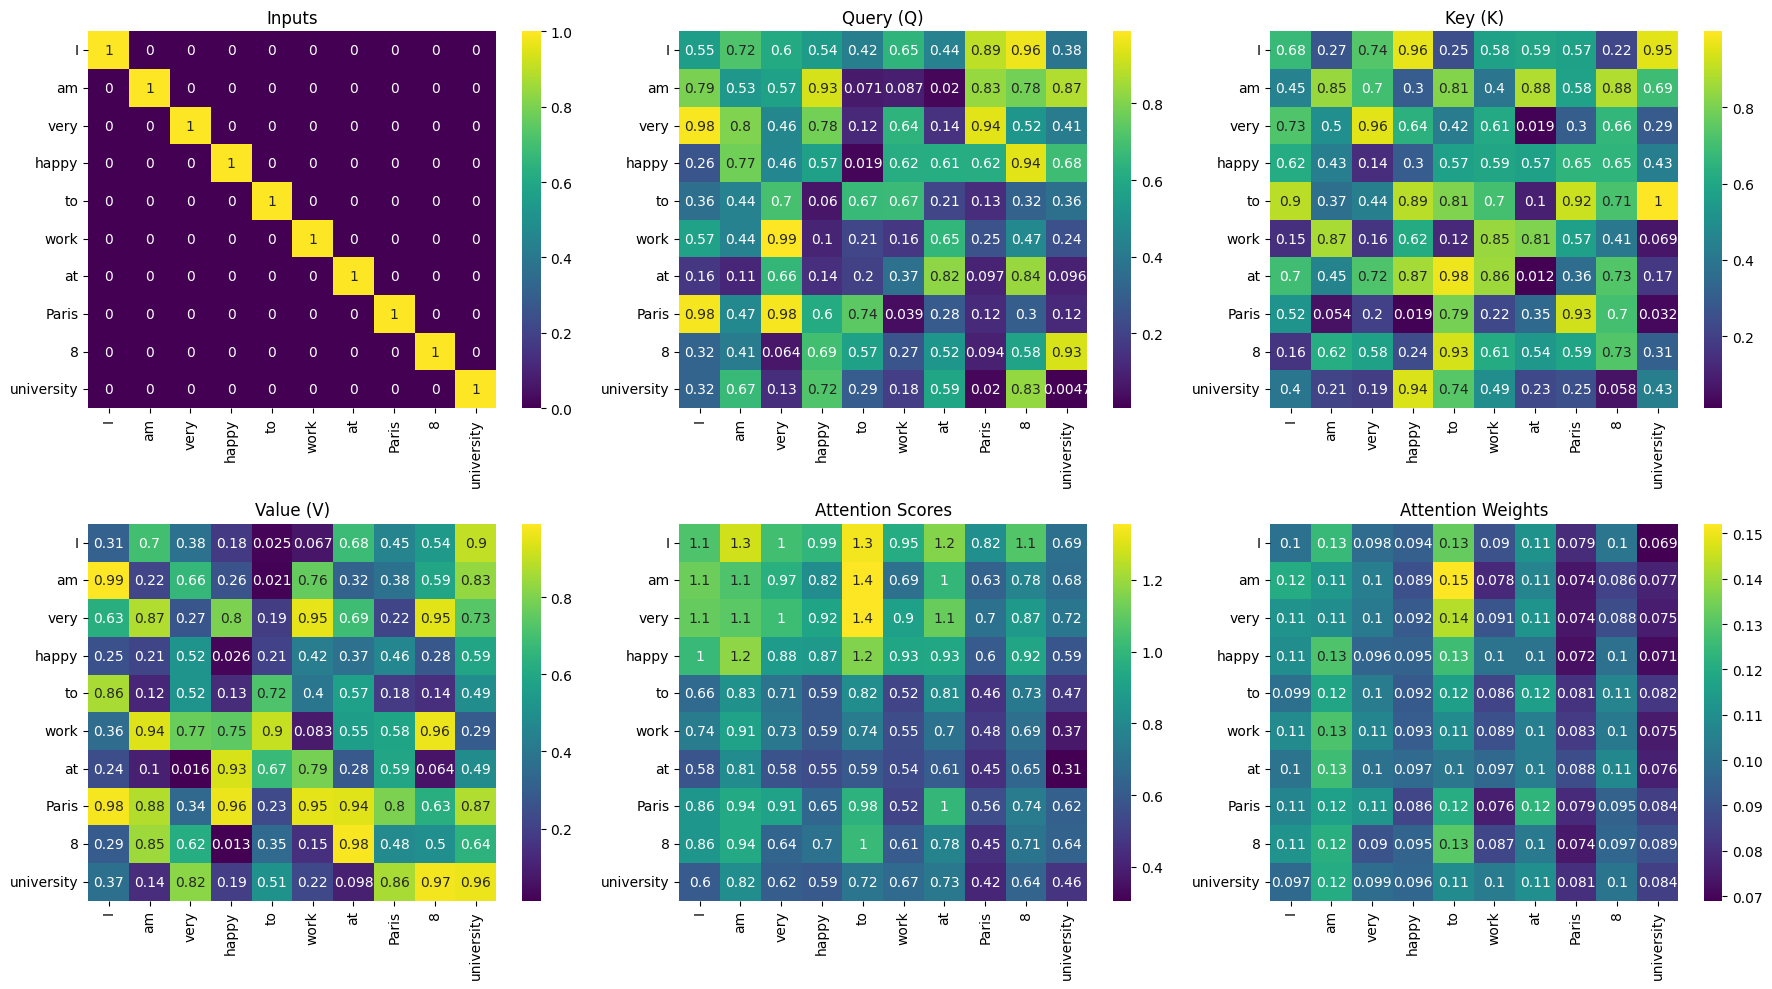

Sentence: ['I', 'am', 'very', 'happy', 'to', 'work', 'at', 'Paris', '8', 'university']

Inputs:
 [[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]

Query (Q):
 [[0.5488135  0.71518937 0.60276338 0.54488318 0.4236548  0.64589411
  0.43758721 0.891773   0.96366276 0.38344152]
 [0.79172504 0.52889492 0.56804456 0.92559664 0.07103606 0.0871293
  0.0202184  0.83261985 0.77815675 0.87001215]
 [0.97861834 0.79915856 0.46147936 0.78052918 0.11827443 0.63992102
  0.14335329 0.94466892 0.52184832 0.41466194]
 [0.26455561 0.77423369 0.45615033 0.56843395 0.0187898  0.6176355
  0.61209572 0.616934   0.94374808 0.6818203 ]
 [0.3595079  0.43703195 0.6976312  0.06022547 0.66676672 0.67063787
  0.21038256 0.1289263  0.3154283

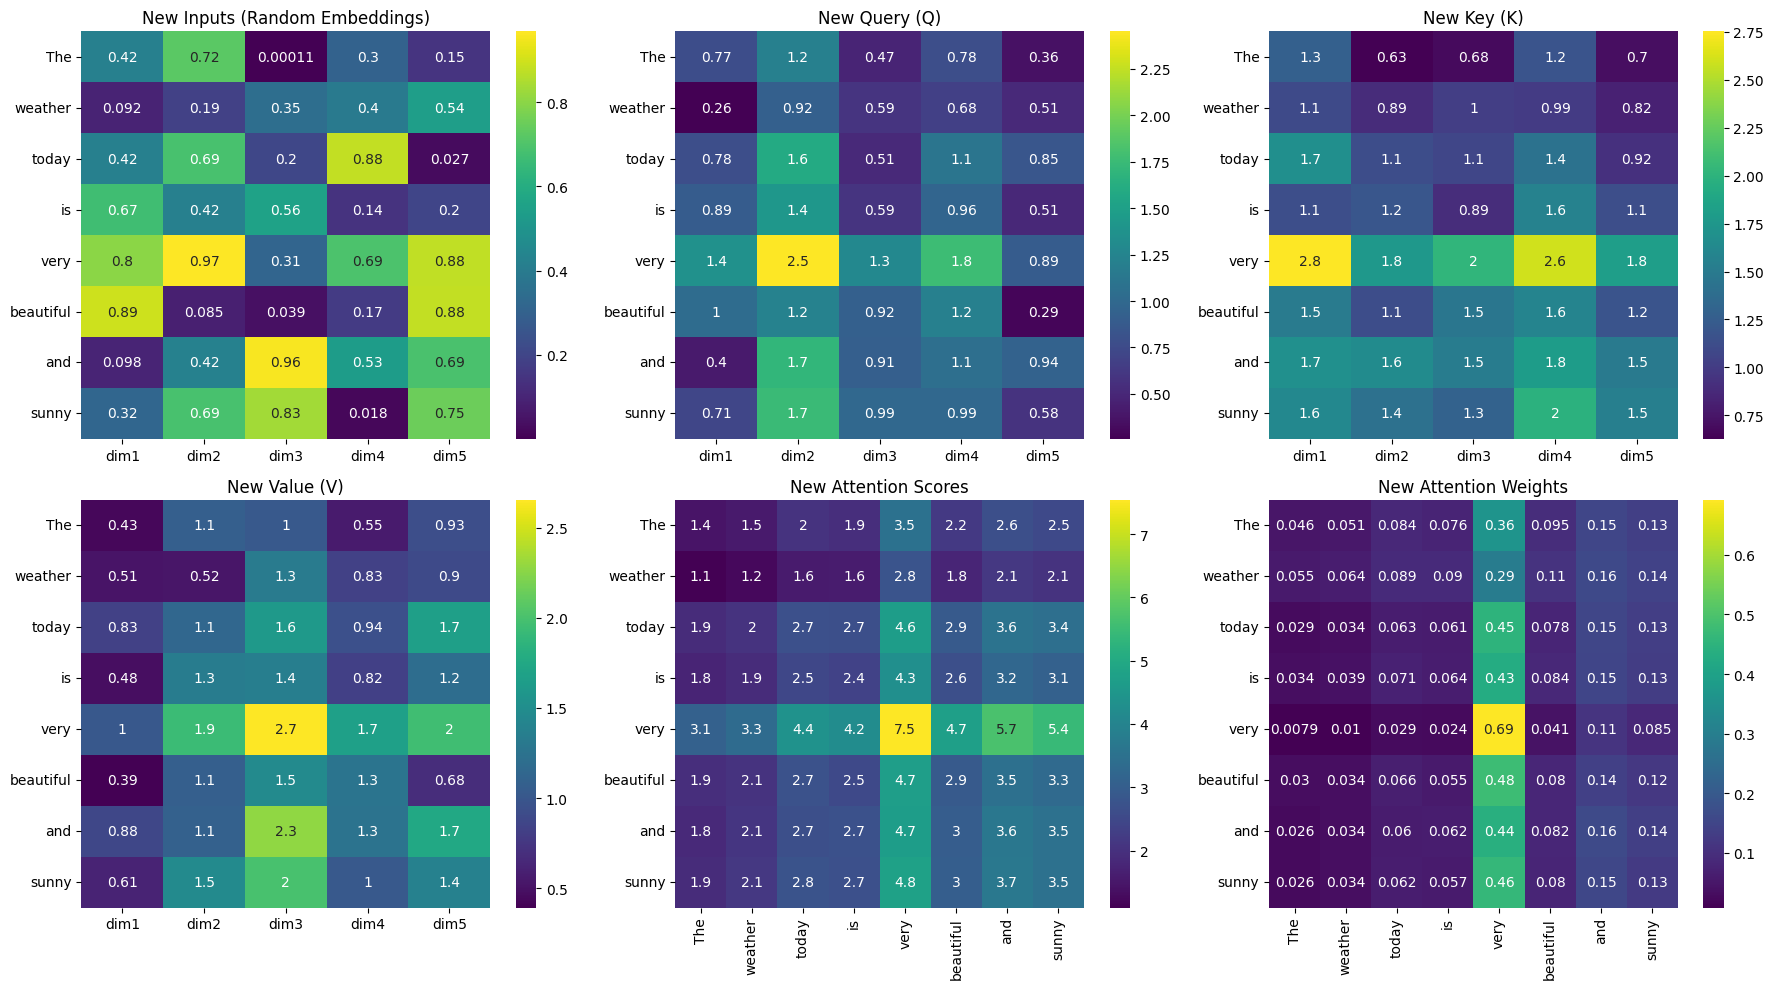


--- Nouvelle phrase ---
Sentence: ['The', 'weather', 'today', 'is', 'very', 'beautiful', 'and', 'sunny']

New Inputs (Embeddings):
 [[4.17022005e-01 7.20324493e-01 1.14374817e-04 3.02332573e-01
  1.46755891e-01]
 [9.23385948e-02 1.86260211e-01 3.45560727e-01 3.96767474e-01
  5.38816734e-01]
 [4.19194514e-01 6.85219500e-01 2.04452250e-01 8.78117436e-01
  2.73875932e-02]
 [6.70467510e-01 4.17304802e-01 5.58689828e-01 1.40386939e-01
  1.98101489e-01]
 [8.00744569e-01 9.68261576e-01 3.13424178e-01 6.92322616e-01
  8.76389152e-01]
 [8.94606664e-01 8.50442114e-02 3.90547832e-02 1.69830420e-01
  8.78142503e-01]
 [9.83468338e-02 4.21107625e-01 9.57889530e-01 5.33165285e-01
  6.91877114e-01]
 [3.15515631e-01 6.86500928e-01 8.34625672e-01 1.82882773e-02
  7.50144315e-01]]

New Query (Q):
 [[0.76615914 1.20090239 0.47474112 0.77541835 0.35565721]
 [0.25773927 0.92379014 0.58608635 0.67522853 0.50817639]
 [0.77505142 1.59048642 0.50988144 1.11116529 0.84871125]
 [0.88849148 1.42266426 0.58695014 

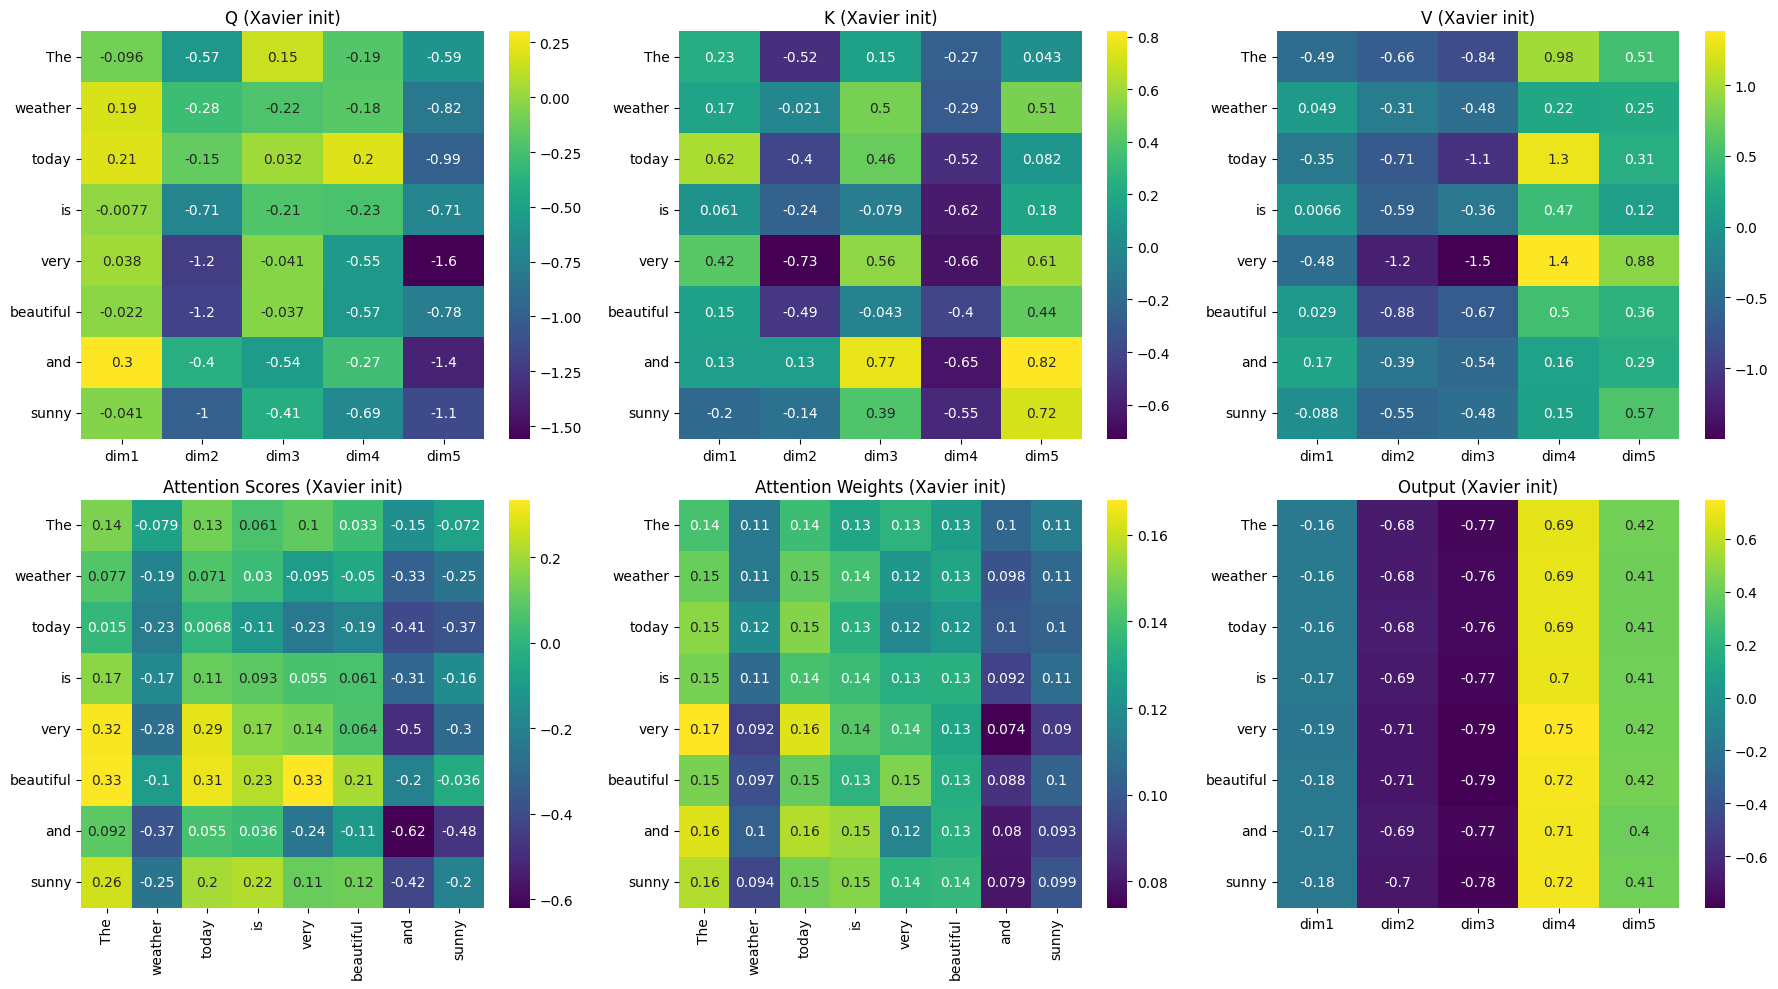


--- Question 2 : Xavier Initialization ---

Wq Xavier:
 [[-0.09915627 -0.73443192  0.07693678 -0.10019812 -0.12336567]
 [-0.26284417 -0.45755637  0.18477379 -0.31037364 -0.36122963]
 [ 0.18765973  0.04514674 -0.56610631  0.02103514 -0.48886366]
 [ 0.44203931  0.54837617 -0.00892825  0.53689074 -0.65121043]
 [ 0.00812721 -0.67345525 -0.11135241 -0.62505162 -0.57760129]]

Kxavier:
 [[ 1.49877188e-01 -4.24460383e-01 -6.08917128e-01 -4.33299761e-01
  -2.32648119e-01]
 [-4.99034143e-02 -4.62057407e-01  2.17517163e-01 -2.62280980e-02
   8.11269177e-03]
 [-1.75225151e-01  4.54901188e-01  1.23941941e-01 -5.23164762e-01
   3.11004198e-01]
 [ 7.19679439e-01  1.29530692e-05  6.03441888e-01 -2.45371074e-01
   1.04019235e-01]
 [-1.12245311e-01 -9.79907188e-02  4.28443647e-01  5.51577484e-02
   7.02934435e-01]]

Vxavier:
 [[ 0.06848699 -0.64741576 -0.20706146  0.54353526 -0.14519808]
 [-0.73245495 -0.39167134 -0.67057706  0.76507225  0.72901989]
 [ 0.46515824  0.15773441  0.41047405 -0.51243373 -0.

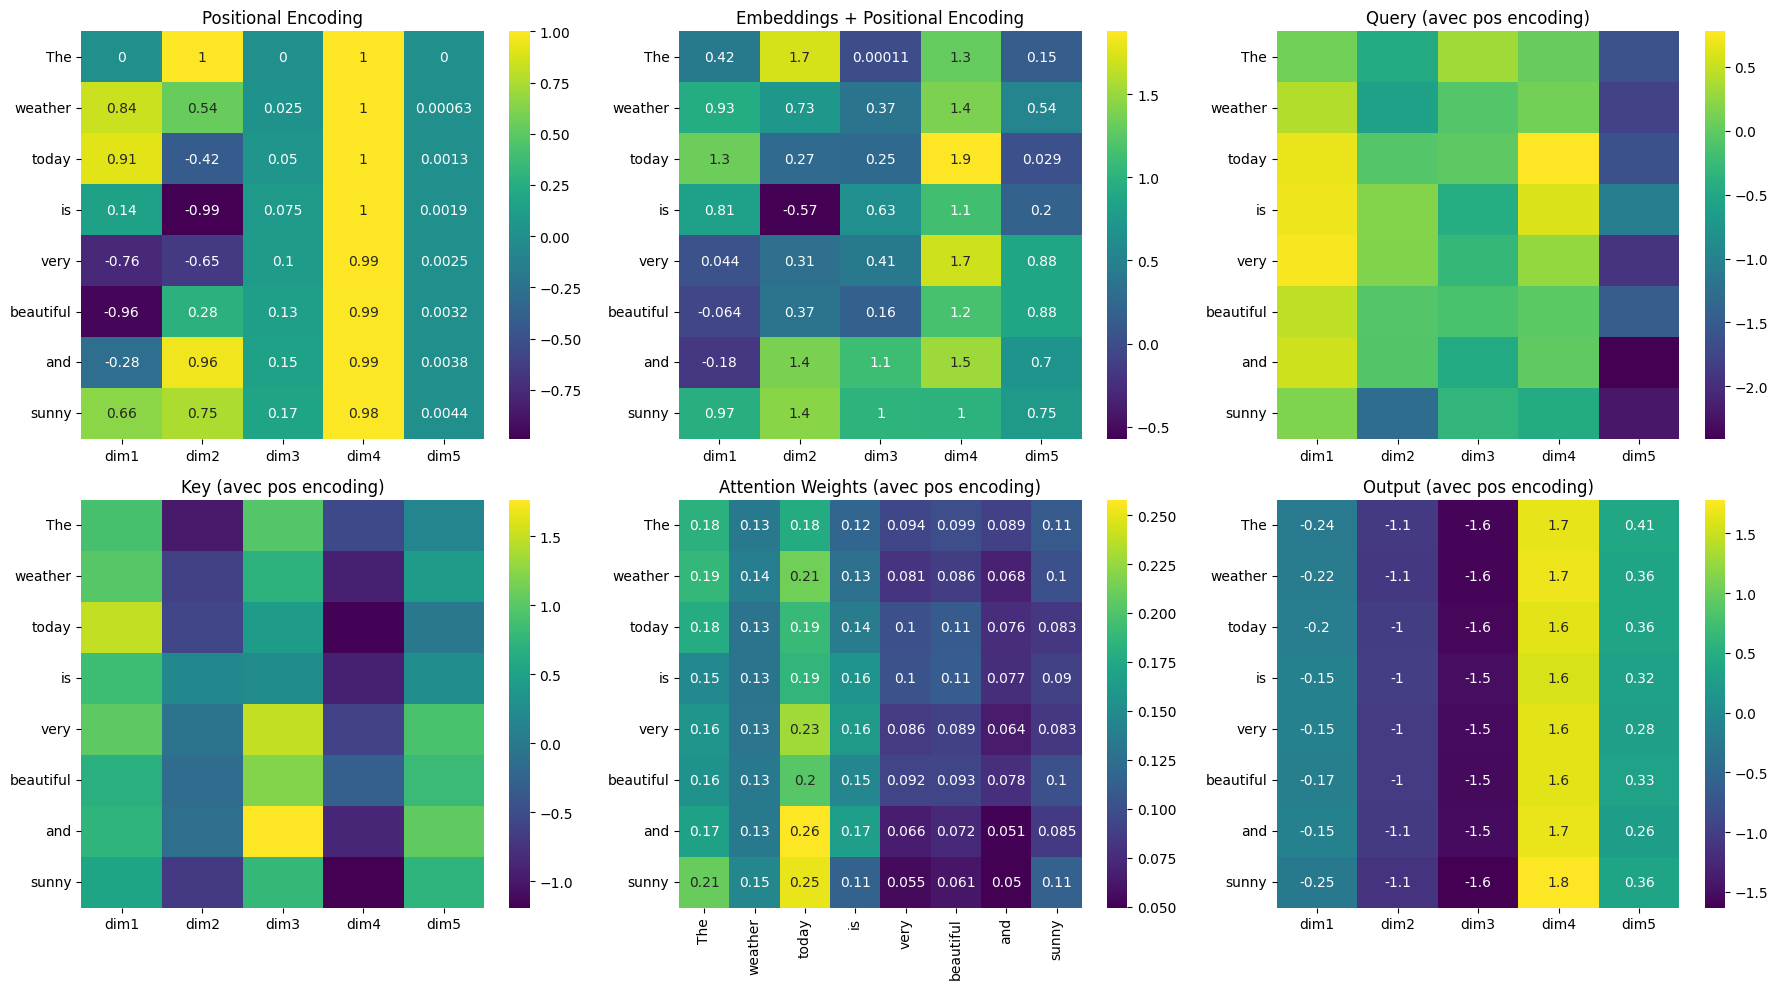


--- Question 3 : Positional Encoding ---

Positional Encoding:
 [[ 0.00000000e+00  1.00000000e+00  0.00000000e+00  1.00000000e+00
   0.00000000e+00]
 [ 8.41470985e-01  5.40302306e-01  2.51162229e-02  9.99684538e-01
   6.30957303e-04]
 [ 9.09297427e-01 -4.16146837e-01  5.02165994e-02  9.98738351e-01
   1.26191435e-03]
 [ 1.41120008e-01 -9.89992497e-01  7.52852930e-02  9.97162035e-01
   1.89287090e-03]
 [-7.56802495e-01 -6.53643621e-01  1.00306487e-01  9.94956586e-01
   2.52382670e-03]
 [-9.58924275e-01  2.83662185e-01  1.25264396e-01  9.92123395e-01
   3.15478149e-03]
 [-2.79415498e-01  9.60170287e-01  1.50143272e-01  9.88664249e-01
   3.78573502e-03]
 [ 6.56986599e-01  7.53902254e-01  1.74927419e-01  9.84581331e-01
   4.41668705e-03]]

Inputs + Positional Encoding:
 [[ 4.17022005e-01  1.72032449e+00  1.14374817e-04  1.30233257e+00
   1.46755891e-01]
 [ 9.33809580e-01  7.26562517e-01  3.70676950e-01  1.39645201e+00
   5.39447691e-01]
 [ 1.32849194e+00  2.69072664e-01  2.54668849e-01  1

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def softmax(x):
    return np.exp(x) / np.sum(np.exp(x), axis=-1, keepdims=True)

# Tokenize the sentence
sentence = "I am very happy to work at Paris 8 university".split()
vocab_size = len(sentence)

# Create one-hot embeddings for each word
word_to_index = {word: idx for idx, word in enumerate(sentence)}
embeddings = np.eye(vocab_size)

# Convert sentence to sequence of embeddings
inputs = np.array([embeddings[word_to_index[word]] for word in sentence])

# Initialize weights for Query, Key, and Value matrices
np.random.seed(0)
Wq = np.random.rand(vocab_size, vocab_size)
Wk = np.random.rand(vocab_size, vocab_size)
Wv = np.random.rand(vocab_size, vocab_size)

# Compute Query, Key, and Value matrices
Q = np.dot(inputs, Wq)
K = np.dot(inputs, Wk)
V = np.dot(inputs, Wv)

# Compute attention scores
scores = np.dot(Q, K.T) / np.sqrt(K.shape[1])

# Apply softmax to get attention weights
attention_weights = softmax(scores)

# Compute the output of the self-attention mechanism
output = np.dot(attention_weights, V)

# Visualization
plt.figure(figsize=(18, 10))

# Plotting the inputs
plt.subplot(2, 3, 1)
sns.heatmap(inputs, annot=True, cmap='viridis', xticklabels=sentence, yticklabels=sentence)
plt.title('Inputs')

# Plotting Query (Q) matrix
plt.subplot(2, 3, 2)
sns.heatmap(Q, annot=True, cmap='viridis', xticklabels=sentence, yticklabels=sentence)
plt.title('Query (Q)')

# Plotting Key (K) matrix
plt.subplot(2, 3, 3)
sns.heatmap(K, annot=True, cmap='viridis', xticklabels=sentence, yticklabels=sentence)
plt.title('Key (K)')

# Plotting Value (V) matrix
plt.subplot(2, 3, 4)
sns.heatmap(V, annot=True, cmap='viridis', xticklabels=sentence, yticklabels=sentence)
plt.title('Value (V)')

# Plotting Attention Scores
plt.subplot(2, 3, 5)
sns.heatmap(scores, annot=True, cmap='viridis', xticklabels=sentence, yticklabels=sentence)
plt.title('Attention Scores')

# Plotting Attention Weights
plt.subplot(2, 3, 6)
sns.heatmap(attention_weights, annot=True, cmap='viridis', xticklabels=sentence, yticklabels=sentence)
plt.title('Attention Weights')

plt.tight_layout()
plt.show()

print("Sentence:", sentence)
print("\nInputs:\n", inputs)
print("\nQuery (Q):\n", Q)
print("\nKey (K):\n", K)
print("\nValue (V):\n", V)
print("\nAttention Scores:\n", scores)
print("\nAttention Weights:\n", attention_weights)
print("\nOutput:\n", output)

# -------------------------------------------------- QUESTION 1:  ------------------------------------------------------------------

new_sentence = "The weather today is very beautiful and sunny".split()

# ici changement : création de vecteurs simulant des embeddings "pré-entraînés"
# (ici juste des valeurs aléatoires simples)
np.random.seed(1)
embedding_dim = 5  # dimension des vecteurs (au lieu du one-hot)
new_embeddings = {word: np.random.rand(embedding_dim) for word in new_sentence}

# Convertir la phrase en séquence de vecteurs
new_inputs = np.array([new_embeddings[word] for word in new_sentence])

# ici changement : initialiser des poids compatibles avec la nouvelle dimension
Wq2 = np.random.rand(embedding_dim, embedding_dim)
Wk2 = np.random.rand(embedding_dim, embedding_dim)
Wv2 = np.random.rand(embedding_dim, embedding_dim)

# Calcul des matrices Q, K, V pour les nouveaux embeddings
Q2 = np.dot(new_inputs, Wq2)
K2 = np.dot(new_inputs, Wk2)
V2 = np.dot(new_inputs, Wv2)

# Calcul des scores d’attention
scores2 = np.dot(Q2, K2.T) / np.sqrt(K2.shape[1])

# Application du softmax
attention_weights2 = softmax(scores2)

# Sortie finale de l’attention
output2 = np.dot(attention_weights2, V2)

plt.figure(figsize=(18, 10))

plt.subplot(2, 3, 1)
sns.heatmap(new_inputs, annot=True, cmap='viridis', xticklabels=[f"dim{i}" for i in range(1, embedding_dim+1)], yticklabels=new_sentence)
plt.title('New Inputs (Random Embeddings)')

plt.subplot(2, 3, 2)
sns.heatmap(Q2, annot=True, cmap='viridis', xticklabels=[f"dim{i}" for i in range(1, embedding_dim+1)], yticklabels=new_sentence)
plt.title('New Query (Q)')

plt.subplot(2, 3, 3)
sns.heatmap(K2, annot=True, cmap='viridis', xticklabels=[f"dim{i}" for i in range(1, embedding_dim+1)], yticklabels=new_sentence)
plt.title('New Key (K)')

plt.subplot(2, 3, 4)
sns.heatmap(V2, annot=True, cmap='viridis', xticklabels=[f"dim{i}" for i in range(1, embedding_dim+1)], yticklabels=new_sentence)
plt.title('New Value (V)')

plt.subplot(2, 3, 5)
sns.heatmap(scores2, annot=True, cmap='viridis', xticklabels=new_sentence, yticklabels=new_sentence)
plt.title('New Attention Scores')

plt.subplot(2, 3, 6)
sns.heatmap(attention_weights2, annot=True, cmap='viridis', xticklabels=new_sentence, yticklabels=new_sentence)
plt.title('New Attention Weights')

plt.tight_layout()
plt.show()

print("\n--- Nouvelle phrase ---")
print("Sentence:", new_sentence)
print("\nNew Inputs (Embeddings):\n", new_inputs)
print("\nNew Query (Q):\n", Q2)
print("\nNew Key (K):\n", K2)
print("\nNew Value (V):\n", V2)
print("\nNew Attention Scores:\n", scores2)
print("\nNew Attention Weights:\n", attention_weights2)
print("\nNew Output:\n", output2)

# -------------------------------------------------- QUESTION 2:  ------------------------------------------------------------------

# initialisation Xavier
def xavier_init(n_in, n_out):
    limit = np.sqrt(6 / (n_in + n_out))
    return np.random.uniform(-limit, limit, (n_in, n_out))

# initialisation avec Xavier
np.random.seed(2)
Wq_xavier = xavier_init(embedding_dim, embedding_dim)
Wk_xavier = xavier_init(embedding_dim, embedding_dim)
Wv_xavier = xavier_init(embedding_dim, embedding_dim)

# Recalcul des matrices Q, K, V
Qx = np.dot(new_inputs, Wq_xavier)
Kx = np.dot(new_inputs, Wk_xavier)
Vx = np.dot(new_inputs, Wv_xavier)

# Calcul des scores et attention weights
scores_x = np.dot(Qx, Kx.T) / np.sqrt(Kx.shape[1])
attention_weights_x = softmax(scores_x)
output_x = np.dot(attention_weights_x, Vx)

plt.figure(figsize=(18, 10))

plt.subplot(2, 3, 1)
sns.heatmap(Qx, annot=True, cmap='viridis', xticklabels=[f"dim{i}" for i in range(1, embedding_dim+1)], yticklabels=new_sentence)
plt.title('Q (Xavier init)')

plt.subplot(2, 3, 2)
sns.heatmap(Kx, annot=True, cmap='viridis', xticklabels=[f"dim{i}" for i in range(1, embedding_dim+1)], yticklabels=new_sentence)
plt.title('K (Xavier init)')

plt.subplot(2, 3, 3)
sns.heatmap(Vx, annot=True, cmap='viridis', xticklabels=[f"dim{i}" for i in range(1, embedding_dim+1)], yticklabels=new_sentence)
plt.title('V (Xavier init)')

plt.subplot(2, 3, 4)
sns.heatmap(scores_x, annot=True, cmap='viridis', xticklabels=new_sentence, yticklabels=new_sentence)
plt.title('Attention Scores (Xavier init)')

plt.subplot(2, 3, 5)
sns.heatmap(attention_weights_x, annot=True, cmap='viridis', xticklabels=new_sentence, yticklabels=new_sentence)
plt.title('Attention Weights (Xavier init)')

plt.subplot(2, 3, 6)
sns.heatmap(output_x, annot=True, cmap='viridis', xticklabels=[f"dim{i}" for i in range(1, embedding_dim+1)], yticklabels=new_sentence)
plt.title('Output (Xavier init)')

plt.tight_layout()
plt.show()

print("\n--- Question 2 : Xavier Initialization ---")
print("\nWq Xavier:\n", Wq_xavier)
print("\nKxavier:\n", Wk_xavier)
print("\nVxavier:\n", Wv_xavier)
print("\nAttention Scores (Xavier):\n", scores_x)
print("\nAttention Weights (Xavier):\n", attention_weights_x)
print("\nOutput (Xavier):\n", output_x)

# -------------------------------------------------- QUESTION 3:  ------------------------------------------------------------------

# Fonction simple de positional encoding (version facile à comprendre)
def simple_positional_encoding(seq_len, d_model):

    position = np.arange(seq_len).reshape(seq_len, 1)
    encoding = position / np.power(10000, (2 * (np.arange(d_model)//2)) / d_model)
    # Alterner sin et cos pour varier les dimensions
    encoding[:, 0::2] = np.sin(encoding[:, 0::2])
    encoding[:, 1::2] = np.cos(encoding[:, 1::2])
    return encoding

# ici changement : calcul du positional encoding
pos_encoding = simple_positional_encoding(len(new_sentence), embedding_dim)

# ici changement : ajout du positional encoding aux embeddings
inputs_with_pos = new_inputs + pos_encoding

# Calcul de Q, K, V avec les poids Xavier déjà définis
Qp = np.dot(inputs_with_pos, Wq_xavier)
Kp = np.dot(inputs_with_pos, Wk_xavier)
Vp = np.dot(inputs_with_pos, Wv_xavier)


scores_p = np.dot(Qp, Kp.T) / np.sqrt(Kp.shape[1])
attention_weights_p = softmax(scores_p)
output_p = np.dot(attention_weights_p, Vp)


plt.figure(figsize=(18, 10))

plt.subplot(2, 3, 1)
sns.heatmap(pos_encoding, annot=True, cmap='viridis',
            xticklabels=[f"dim{i}" for i in range(1, embedding_dim+1)],
            yticklabels=new_sentence)
plt.title('Positional Encoding')

plt.subplot(2, 3, 2)
sns.heatmap(inputs_with_pos, annot=True, cmap='viridis',
            xticklabels=[f"dim{i}" for i in range(1, embedding_dim+1)],
            yticklabels=new_sentence)
plt.title('Embeddings + Positional Encoding')

plt.subplot(2, 3, 3)
sns.heatmap(Qp, annot=False, cmap='viridis',
            xticklabels=[f"dim{i}" for i in range(1, embedding_dim+1)],
            yticklabels=new_sentence)
plt.title('Query (avec pos encoding)')

plt.subplot(2, 3, 4)
sns.heatmap(Kp, annot=False, cmap='viridis',
            xticklabels=[f"dim{i}" for i in range(1, embedding_dim+1)],
            yticklabels=new_sentence)
plt.title('Key (avec pos encoding)')

plt.subplot(2, 3, 5)
sns.heatmap(attention_weights_p, annot=True, cmap='viridis',
            xticklabels=new_sentence, yticklabels=new_sentence)
plt.title('Attention Weights (avec pos encoding)')

plt.subplot(2, 3, 6)
sns.heatmap(output_p, annot=True, cmap='viridis',
            xticklabels=[f"dim{i}" for i in range(1, embedding_dim+1)],
            yticklabels=new_sentence)
plt.title('Output (avec pos encoding)')

plt.tight_layout()
plt.show()

print("\n--- Question 3 : Positional Encoding ---")
print("\nPositional Encoding:\n", pos_encoding)
print("\nInputs + Positional Encoding:\n", inputs_with_pos)
print("\nAttention Weights (avec pos encoding):\n", attention_weights_p)
print("\nOutput (avec pos encoding):\n", output_p)





*   QUESTION 2:




--> Avant les poids Wq Wk Wv sont aleatoire entre 0 et 1
ce qui peut rendre les activations trop grandes ou instables.

--> Avec Xavier, les poids sont mieux equilibré autour de 0
donc les valeurs de Q K V et les scores d’attention sont plus centré et stable.



*  QUESTION 3:

--> Le positional encoding ajoute des valeurs croissantes pour indiquer la position des mots dans la phrase.

--> Chaque mot obtient un vecteur unique selon sa place.
Les poids d’attention changent, car le modèle comprend mieux l’ordre des mots.

--> La sortie devient plus varié et tient compte à la fois du sens et de la position des mots.



#EXERCICE 4 :

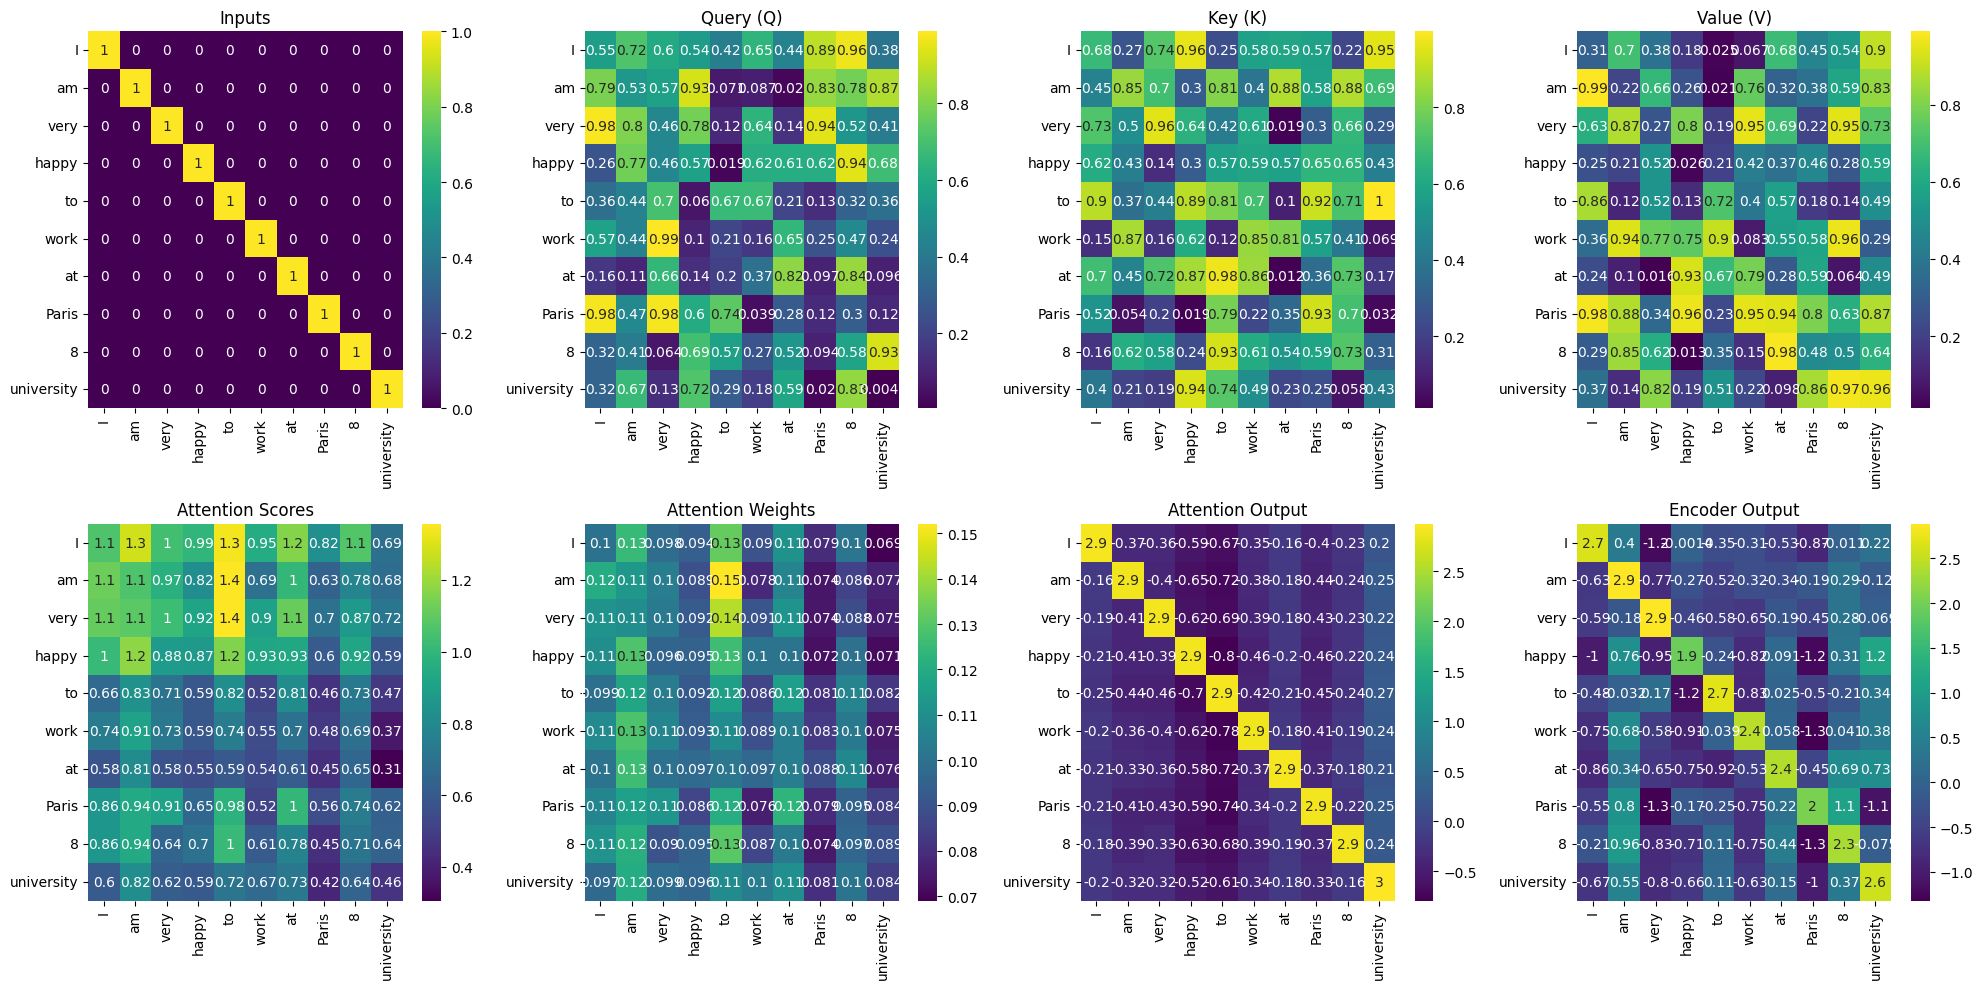

Sentence: ['I', 'am', 'very', 'happy', 'to', 'work', 'at', 'Paris', '8', 'university']

Inputs:
 [[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]

Query (Q):
 [[0.5488135  0.71518937 0.60276338 0.54488318 0.4236548  0.64589411
  0.43758721 0.891773   0.96366276 0.38344152]
 [0.79172504 0.52889492 0.56804456 0.92559664 0.07103606 0.0871293
  0.0202184  0.83261985 0.77815675 0.87001215]
 [0.97861834 0.79915856 0.46147936 0.78052918 0.11827443 0.63992102
  0.14335329 0.94466892 0.52184832 0.41466194]
 [0.26455561 0.77423369 0.45615033 0.56843395 0.0187898  0.6176355
  0.61209572 0.616934   0.94374808 0.6818203 ]
 [0.3595079  0.43703195 0.6976312  0.06022547 0.66676672 0.67063787
  0.21038256 0.1289263  0.3154283

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Softmax function
def softmax(x):
    return np.exp(x) / np.sum(np.exp(x), axis=-1, keepdims=True)

# Layer normalization function
def layer_norm(x):
    return (x - np.mean(x, axis=-1, keepdims=True)) / np.std(x, axis=-1, keepdims=True)

# Tokenize the sentence
sentence = "I am very happy to work at Paris 8 university".split()
vocab_size = len(sentence)

# Create one-hot embeddings for each word
word_to_index = {word: idx for idx, word in enumerate(sentence)}
embeddings = np.eye(vocab_size)

# Convert sentence to sequence of embeddings
inputs = np.array([embeddings[word_to_index[word]] for word in sentence])

# Initialize weights for Query, Key, Value, and Feed-Forward matrices
np.random.seed(0)
Wq = np.random.rand(vocab_size, vocab_size)
Wk = np.random.rand(vocab_size, vocab_size)
Wv = np.random.rand(vocab_size, vocab_size)
W1 = np.random.rand(vocab_size, vocab_size)  # Feed-Forward layer 1 weights
W2 = np.random.rand(vocab_size, vocab_size)  # Feed-Forward layer 2 weights

# Self-Attention Layer
Q = np.dot(inputs, Wq)
K = np.dot(inputs, Wk)
V = np.dot(inputs, Wv)

scores = np.dot(Q, K.T) / np.sqrt(K.shape[1])
attention_weights = softmax(scores)
attention_output = np.dot(attention_weights, V)

# Add & Norm Layer (Self-Attention Output + Inputs)
attention_output = layer_norm(attention_output + inputs)

# Feed-Forward Layer
ffn_output = np.dot(attention_output, W1)
ffn_output = np.maximum(0, ffn_output)  # ReLU activation
ffn_output = np.dot(ffn_output, W2)

# Add & Norm Layer (Feed-Forward Output + Self-Attention Output)
encoder_output = layer_norm(ffn_output + attention_output)

# Visualization
plt.figure(figsize=(20, 10))

# Plotting the inputs
plt.subplot(2, 4, 1)
sns.heatmap(inputs, annot=True, cmap='viridis', xticklabels=sentence, yticklabels=sentence)
plt.title('Inputs')

# Plotting Query (Q) matrix
plt.subplot(2, 4, 2)
sns.heatmap(Q, annot=True, cmap='viridis', xticklabels=sentence, yticklabels=sentence)
plt.title('Query (Q)')

# Plotting Key (K) matrix
plt.subplot(2, 4, 3)
sns.heatmap(K, annot=True, cmap='viridis', xticklabels=sentence, yticklabels=sentence)
plt.title('Key (K)')

# Plotting Value (V) matrix
plt.subplot(2, 4, 4)
sns.heatmap(V, annot=True, cmap='viridis', xticklabels=sentence, yticklabels=sentence)
plt.title('Value (V)')

# Plotting Attention Scores
plt.subplot(2, 4, 5)
sns.heatmap(scores, annot=True, cmap='viridis', xticklabels=sentence, yticklabels=sentence)
plt.title('Attention Scores')

# Plotting Attention Weights
plt.subplot(2, 4, 6)
sns.heatmap(attention_weights, annot=True, cmap='viridis', xticklabels=sentence, yticklabels=sentence)
plt.title('Attention Weights')

# Plotting Attention Output
plt.subplot(2, 4, 7)
sns.heatmap(attention_output, annot=True, cmap='viridis', xticklabels=sentence, yticklabels=sentence)
plt.title('Attention Output')

# Plotting Encoder Output
plt.subplot(2, 4, 8)
sns.heatmap(encoder_output, annot=True, cmap='viridis', xticklabels=sentence, yticklabels=sentence)
plt.title('Encoder Output')

plt.tight_layout()
plt.show()

print("Sentence:", sentence)
print("\nInputs:\n", inputs)
print("\nQuery (Q):\n", Q)
print("\nKey (K):\n", K)
print("\nValue (V):\n", V)
print("\nAttention Scores:\n", scores)
print("\nAttention Weights:\n", attention_weights)
print("\nAttention Output:\n", attention_output)
print("\nFeed-Forward Output:\n", ffn_output)
print("\nEncoder Output:\n", encoder_output)

#QUESTION 1 EXO 4:


 Embedding Dimension: 4 
Attention Weights:
 [[0.09 0.11 0.13 0.04 0.11 0.17 0.07 0.08 0.06 0.14]
 [0.09 0.11 0.13 0.04 0.1  0.17 0.07 0.08 0.06 0.14]
 [0.09 0.11 0.13 0.04 0.11 0.18 0.07 0.08 0.05 0.15]
 [0.1  0.11 0.12 0.06 0.11 0.15 0.08 0.09 0.07 0.13]
 [0.09 0.11 0.13 0.04 0.1  0.17 0.07 0.08 0.06 0.14]
 [0.09 0.11 0.13 0.03 0.11 0.19 0.06 0.07 0.05 0.15]
 [0.09 0.11 0.12 0.05 0.1  0.15 0.08 0.09 0.07 0.13]
 [0.09 0.11 0.12 0.05 0.1  0.16 0.08 0.09 0.06 0.13]
 [0.1  0.11 0.12 0.06 0.1  0.15 0.08 0.09 0.07 0.13]
 [0.09 0.11 0.13 0.03 0.11 0.19 0.07 0.08 0.05 0.15]]
Attention Output:
 [[1.32 0.84 1.02 0.54]
 [1.32 0.84 1.02 0.54]
 [1.33 0.85 1.03 0.55]
 [1.29 0.81 1.   0.52]
 [1.32 0.84 1.03 0.54]
 [1.34 0.86 1.04 0.55]
 [1.3  0.82 1.01 0.52]
 [1.3  0.82 1.01 0.53]
 [1.29 0.81 1.   0.52]
 [1.34 0.85 1.03 0.55]]


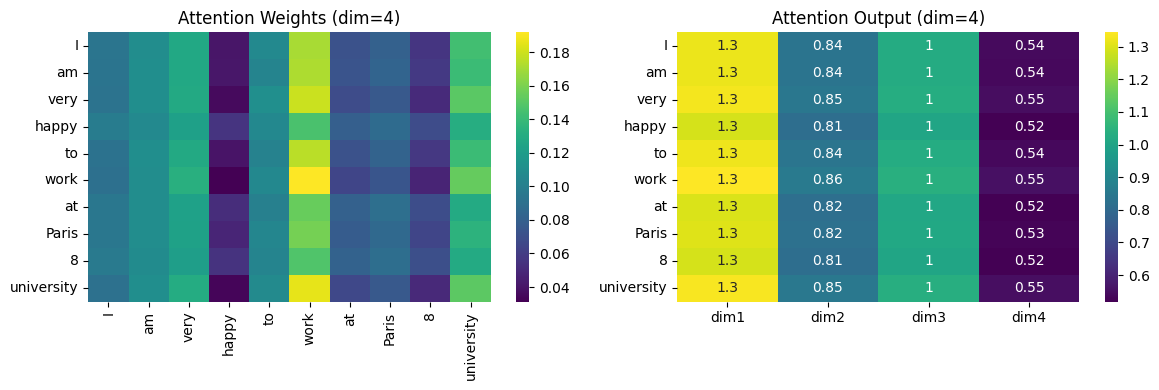


 Embedding Dimension: 8 
Attention Weights:
 [[0.13 0.15 0.68 0.   0.02 0.   0.   0.   0.01 0.  ]
 [0.15 0.18 0.62 0.   0.03 0.   0.   0.   0.01 0.01]
 [0.1  0.12 0.76 0.   0.01 0.   0.   0.   0.   0.  ]
 [0.16 0.18 0.6  0.   0.04 0.   0.   0.   0.01 0.01]
 [0.14 0.16 0.65 0.   0.03 0.   0.   0.   0.01 0.  ]
 [0.17 0.19 0.54 0.01 0.05 0.01 0.   0.   0.02 0.01]
 [0.17 0.18 0.54 0.01 0.05 0.01 0.   0.   0.02 0.01]
 [0.18 0.19 0.43 0.02 0.07 0.02 0.01 0.01 0.04 0.03]
 [0.15 0.16 0.62 0.   0.04 0.   0.   0.   0.01 0.01]
 [0.18 0.19 0.49 0.01 0.06 0.01 0.01 0.   0.03 0.02]]
Attention Output:
 [[2.41 2.49 2.64 2.52 2.95 2.89 2.46 2.58]
 [2.38 2.48 2.63 2.48 2.92 2.84 2.41 2.55]
 [2.46 2.49 2.65 2.57 2.99 2.95 2.52 2.61]
 [2.36 2.47 2.63 2.46 2.9  2.82 2.38 2.54]
 [2.4  2.48 2.64 2.5  2.94 2.87 2.44 2.57]
 [2.32 2.45 2.61 2.41 2.86 2.76 2.32 2.51]
 [2.33 2.46 2.61 2.41 2.86 2.76 2.32 2.52]
 [2.25 2.41 2.57 2.3  2.76 2.63 2.2  2.46]
 [2.38 2.47 2.63 2.48 2.91 2.84 2.41 2.56]
 [2.29 2.44 2.59 

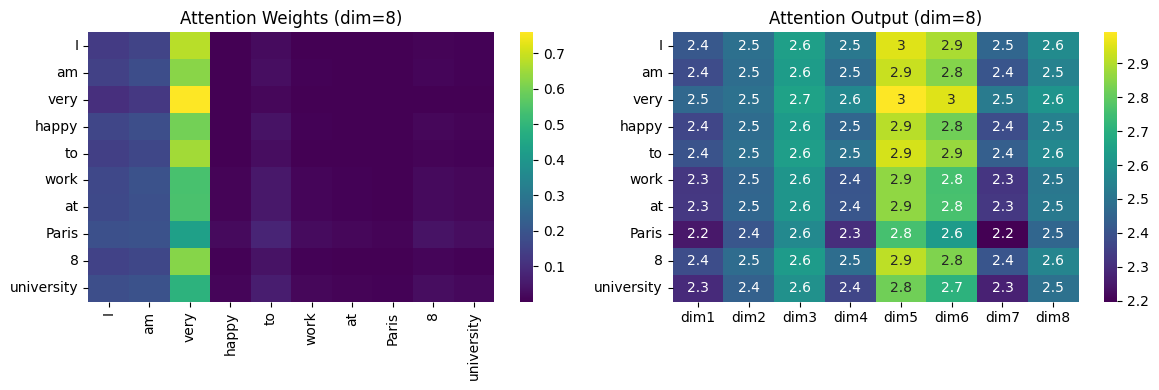


 Embedding Dimension: 16 
Attention Weights:
 [[0.04 0.78 0.   0.   0.   0.   0.   0.18 0.   0.01]
 [0.04 0.69 0.   0.   0.   0.   0.   0.25 0.   0.01]
 [0.05 0.71 0.   0.   0.   0.   0.   0.23 0.   0.01]
 [0.11 0.56 0.   0.   0.   0.   0.   0.29 0.01 0.03]
 [0.08 0.65 0.   0.   0.   0.   0.   0.24 0.   0.02]
 [0.09 0.62 0.   0.   0.   0.   0.   0.26 0.   0.02]
 [0.07 0.61 0.   0.   0.   0.   0.   0.32 0.   0.01]
 [0.04 0.71 0.   0.   0.   0.   0.   0.23 0.   0.01]
 [0.05 0.7  0.   0.   0.   0.   0.   0.24 0.   0.01]
 [0.04 0.74 0.   0.   0.   0.   0.   0.21 0.   0.01]]
Attention Output:
 [[5.27 4.19 4.5  4.05 3.66 4.33 4.94 3.92 4.92 3.83 4.31 5.65 5.22 4.9
  4.81 4.1 ]
 [5.24 4.21 4.53 4.04 3.74 4.31 4.94 3.94 4.92 3.84 4.28 5.68 5.16 4.96
  4.82 4.15]
 [5.24 4.2  4.52 4.05 3.73 4.31 4.94 3.93 4.91 3.84 4.28 5.67 5.17 4.94
  4.81 4.13]
 [5.18 4.21 4.54 4.05 3.88 4.25 4.93 3.94 4.89 3.85 4.2  5.68 5.05 4.99
  4.82 4.17]
 [5.21 4.2  4.52 4.05 3.79 4.28 4.94 3.94 4.9  3.84 4.25 5.67 5.

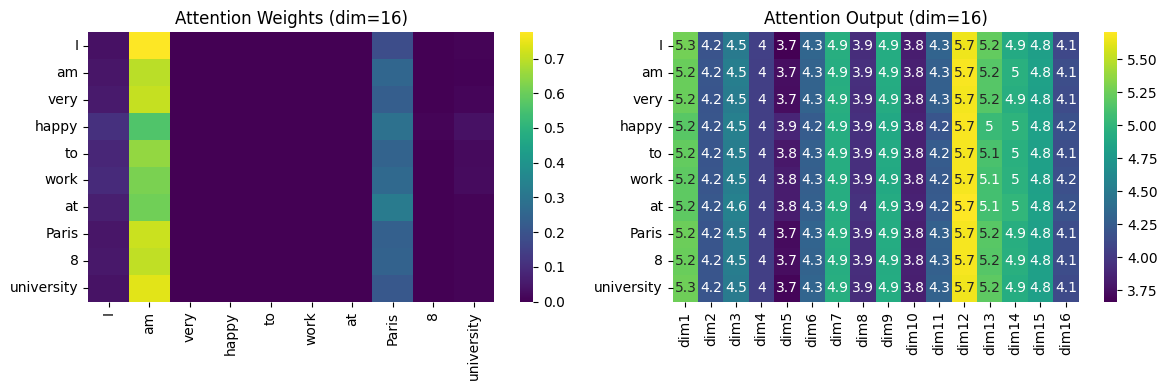

In [23]:
# ici changement : Question 1 (experimentation avec différentes dimensions d'embedding)

# Liste des dimensions à tester
embedding_dims = [4, 8, 16]

sentence_test = "I am very happy to work at Paris 8 university".split()
seq_len = len(sentence_test)

for dim in embedding_dims:
    print(f"\n Embedding Dimension: {dim} ")

    # Création d'embeddings aléatoires simples pour chaque mot
    np.random.seed(0)
    embeddings_var = {word: np.random.rand(dim) for word in sentence_test}
    inputs_var = np.array([embeddings_var[word] for word in sentence_test])

    # Initialisation aléatoire des poids Q, K, V
    Wq_var = np.random.rand(dim, dim)
    Wk_var = np.random.rand(dim, dim)
    Wv_var = np.random.rand(dim, dim)

    # Calcul des matrices Q, K, V
    Q_var = np.dot(inputs_var, Wq_var)
    K_var = np.dot(inputs_var, Wk_var)
    V_var = np.dot(inputs_var, Wv_var)

    # Calcul des scores et attention weights
    scores_var = np.dot(Q_var, K_var.T) / np.sqrt(K_var.shape[1])
    attention_weights_var = softmax(scores_var)
    attention_output_var = np.dot(attention_weights_var, V_var)

    print("Attention Weights:\n", np.round(attention_weights_var, 2))
    print("Attention Output:\n", np.round(attention_output_var, 2))

    plt.figure(figsize=(12,4))
    plt.subplot(1,2,1)
    sns.heatmap(attention_weights_var, annot=False, cmap='viridis', xticklabels=sentence_test, yticklabels=sentence_test)
    plt.title(f'Attention Weights (dim={dim})')

    plt.subplot(1,2,2)
    sns.heatmap(attention_output_var, annot=True, cmap='viridis', xticklabels=[f'dim{i+1}' for i in range(dim)], yticklabels=sentence_test)
    plt.title(f'Attention Output (dim={dim})')

    plt.tight_layout()
    plt.show()


---> Quand la dimension de l’embedding augmente, les vecteurs de mots contiennent plus d’informations.

---> Les matrices Q, K, V deviennent plus grandes et permettent de capturer plus de relations entre les mots.

---> L’output de l’attention est plus interessante avec des dimensions plus grandes.

#QUESTION 2 EXO 4:


Multi-Head Attention avec 1 tête
Output shape: (5, 8)


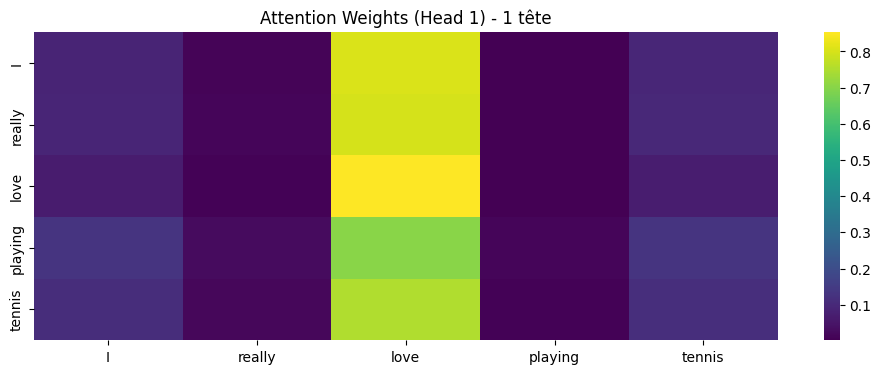

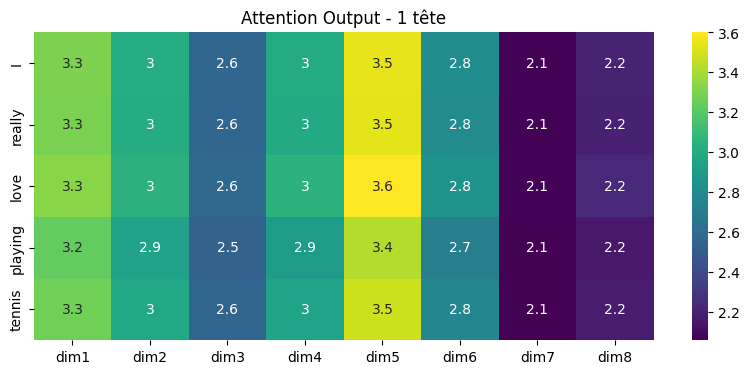


Multi-Head Attention avec 2 tête
Output shape: (5, 8)


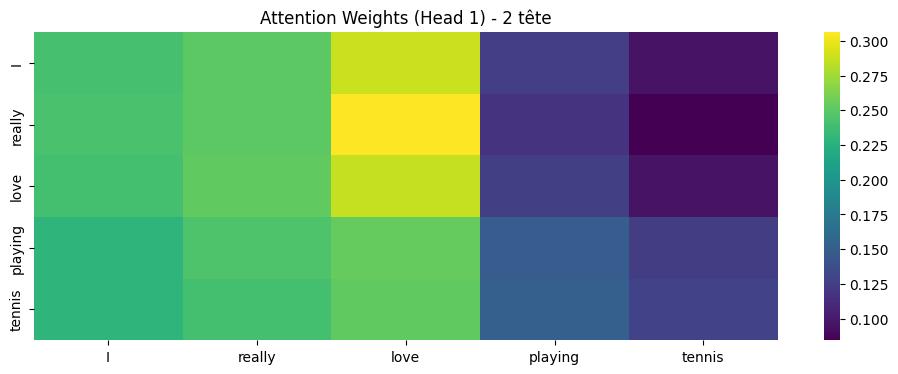

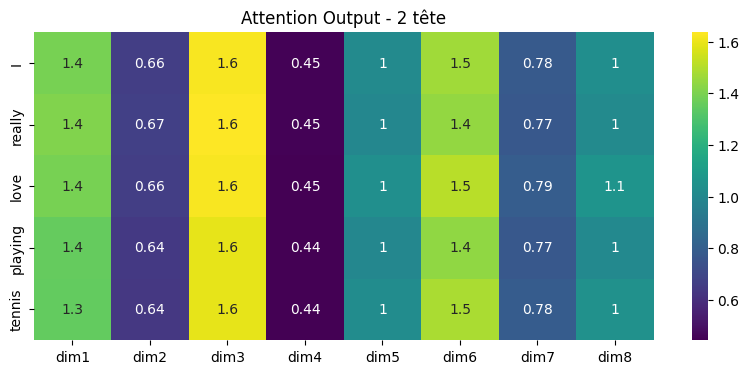


Multi-Head Attention avec 4 tête
Output shape: (5, 8)


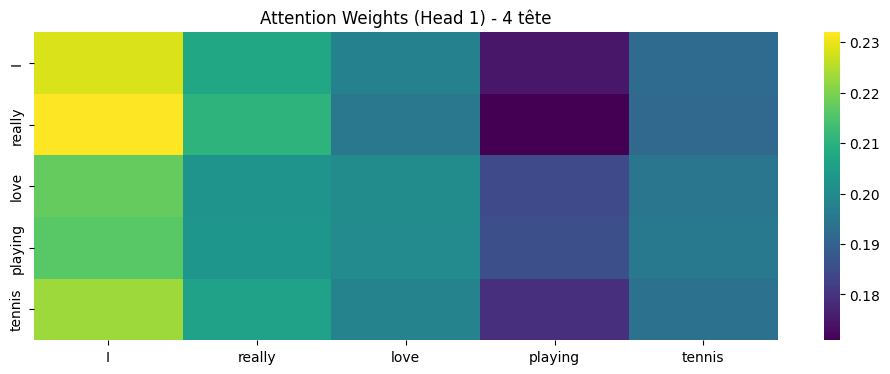

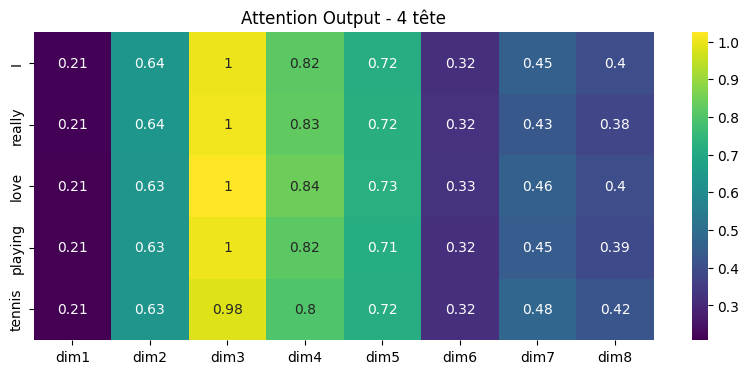

In [24]:
# Question 2 (Implémentation de la multi-head attention)

# Fonction pour calculer self-attention
def simple_self_attention(inputs, num_heads=1):
    seq_len, d_model = inputs.shape
    depth = d_model // num_heads

    # On separe les tetes
    inputs_split = np.reshape(inputs, (seq_len, num_heads, depth))

    # Initialisation aléatoire des poids Q, K, V pour chaque tête
    np.random.seed(0)
    Wq = np.random.rand(num_heads, depth, depth)
    Wk = np.random.rand(num_heads, depth, depth)
    Wv = np.random.rand(num_heads, depth, depth)

    all_outputs = []
    all_weights = []

    for h in range(num_heads):
        Q = np.dot(inputs_split[:, h, :], Wq[h])
        K = np.dot(inputs_split[:, h, :], Wk[h])
        V = np.dot(inputs_split[:, h, :], Wv[h])

        scores = np.dot(Q, K.T) / np.sqrt(depth)
        weights = softmax(scores)
        output = np.dot(weights, V)

        all_outputs.append(output)
        all_weights.append(weights)

    # On concatène les sorties des têtes
    final_output = np.concatenate(all_outputs, axis=-1)
    return final_output, all_weights

# Création d'embeddings simples pour tester avec plusieurs têtes

sentence_heads = "I really love playing tennis".split()
dim_model = 8
np.random.seed(0)
embeddings_heads = {word: np.random.rand(dim_model) for word in sentence_heads}
inputs_heads = np.array([embeddings_heads[word] for word in sentence_heads])

# Test avec 1, 2 et 4 heads
for heads in [1, 2, 4]:
    output_heads, weights_heads = simple_self_attention(inputs_heads, num_heads=heads)

    print(f"\nMulti-Head Attention avec {heads} tête")
    print("Output shape:", output_heads.shape)

    plt.figure(figsize=(12, 4))
    sns.heatmap(weights_heads[0], cmap='viridis', xticklabels=sentence_heads, yticklabels=sentence_heads)
    plt.title(f'Attention Weights (Head 1) - {heads} tête')
    plt.show()

    plt.figure(figsize=(10, 4))
    sns.heatmap(output_heads, annot=True, cmap='viridis', xticklabels=[f'dim{i+1}' for i in range(output_heads.shape[1])], yticklabels=sentence_heads)
    plt.title(f'Attention Output - {heads} tête')
    plt.show()


---> Avec 1 tête, le modèle regarde une seule maniere de relier les mots.

---> Avec 2 têtes, il apprend deux types de relations différentes donc des resultats plus interessant.

---> Avec 4 têtes, chaque tête capte une partie spécifique du contexte, donc les resultats sont encore meilleurs.

#QUESTION 3 EXO 4:

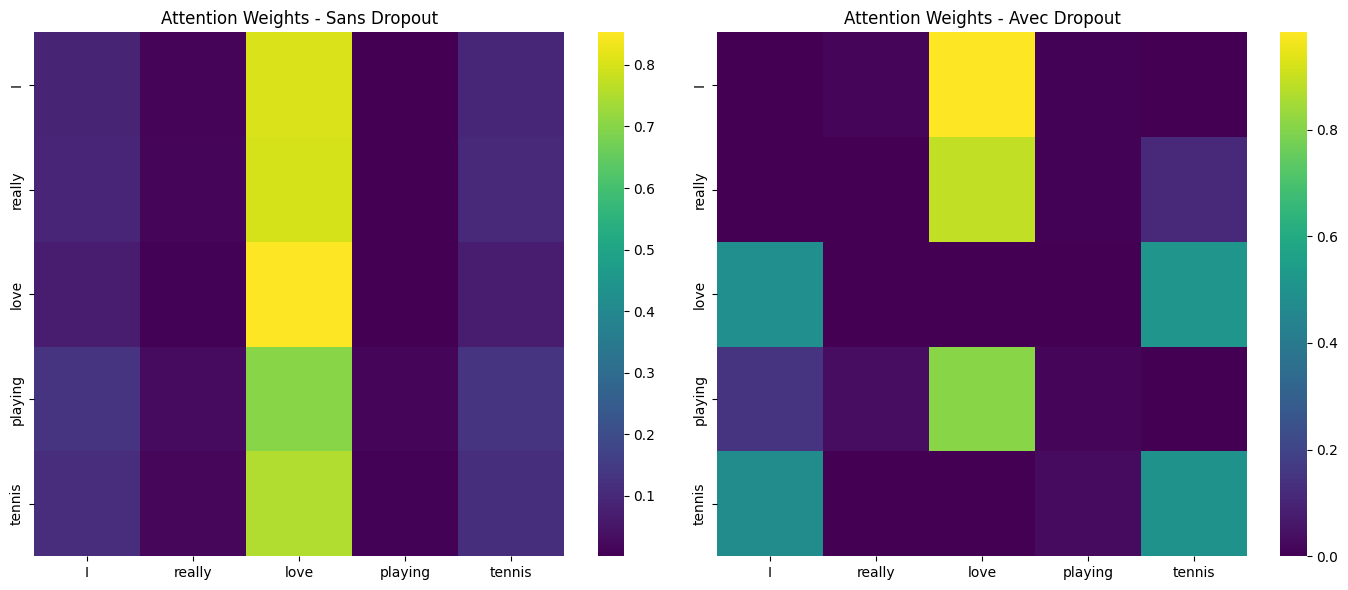

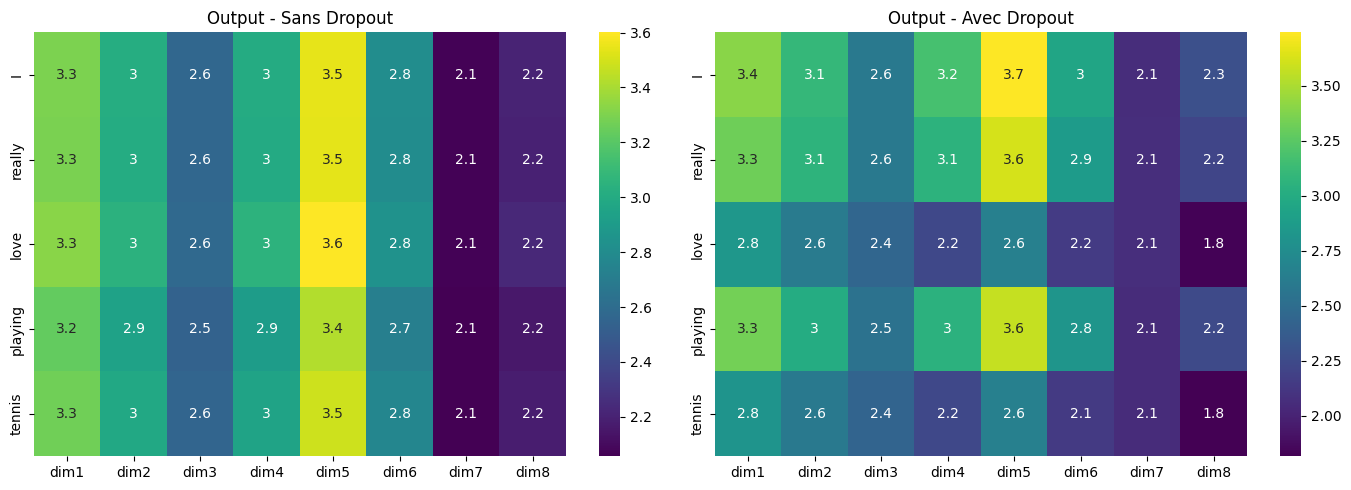


Phrase: ['I', 'really', 'love', 'playing', 'tennis']

Attention Weights (sans dropout):
 [[0.08780221 0.01048986 0.80359887 0.00378951 0.09431955]
 [0.08820953 0.01263799 0.79799624 0.00408108 0.09707517]
 [0.06751865 0.0065954  0.85297558 0.00175123 0.07115914]
 [0.1284933  0.02669854 0.70153319 0.01214907 0.1311259 ]
 [0.10887198 0.01683514 0.75296823 0.0065883  0.11473635]]

Attention Weights (avec dropout):
 [[0.         0.0128257  0.98254096 0.00463334 0.        ]
 [0.         0.         0.88749823 0.0045388  0.10796297]
 [0.48687428 0.         0.         0.         0.51312572]
 [0.14788483 0.03072774 0.80740488 0.01398254 0.        ]
 [0.47295209 0.         0.         0.02862033 0.49842757]]


In [25]:
# Question 3 (Ajout du Dropout dans la self-attention)

# ----------------------------------------------------------------------
# ici changement : Question 3 — Ajout du Dropout dans la self-attention
# ----------------------------------------------------------------------

def self_attention_with_dropout(inputs, dropout_rate=0.3):

    np.random.seed(0)
    d_model = inputs.shape[1]

    # Initialisation des matrices de poids
    Wq = np.random.rand(d_model, d_model)
    Wk = np.random.rand(d_model, d_model)
    Wv = np.random.rand(d_model, d_model)

    # Calcul de Q, K, V
    Q = np.dot(inputs, Wq)
    K = np.dot(inputs, Wk)
    V = np.dot(inputs, Wv)

    # Scores d'attention
    scores = np.dot(Q, K.T) / np.sqrt(d_model)
    weights = softmax(scores)

    # ici changement : application du dropout sur les poids d'attention
    dropout_mask = (np.random.rand(*weights.shape) > dropout_rate).astype(float)
    weights_dropout = weights * dropout_mask  # on met certains poids à 0
    weights_dropout = weights_dropout / np.sum(weights_dropout, axis=-1, keepdims=True)  # re-normalisation

    # Calcul des sorties
    output_no_dropout = np.dot(weights, V)
    output_with_dropout = np.dot(weights_dropout, V)

    return weights, weights_dropout, output_no_dropout, output_with_dropout



sentence_dropout = "I really love playing tennis".split()
np.random.seed(0)
embeddings_dropout = {word: np.random.rand(8) for word in sentence_dropout}
inputs_dropout = np.array([embeddings_dropout[word] for word in sentence_dropout])

# Exécution avec dropout
weights_no_drop, weights_with_drop, out_no_drop, out_with_drop = self_attention_with_dropout(inputs_dropout, dropout_rate=0.3)


plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.heatmap(weights_no_drop, cmap='viridis', xticklabels=sentence_dropout, yticklabels=sentence_dropout)
plt.title('Attention Weights - Sans Dropout')

plt.subplot(1, 2, 2)
sns.heatmap(weights_with_drop, cmap='viridis', xticklabels=sentence_dropout, yticklabels=sentence_dropout)
plt.title('Attention Weights - Avec Dropout')

plt.tight_layout()
plt.show()

plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
sns.heatmap(out_no_drop, annot=True, cmap='viridis', xticklabels=[f'dim{i+1}' for i in range(out_no_drop.shape[1])], yticklabels=sentence_dropout)
plt.title('Output - Sans Dropout')

plt.subplot(1, 2, 2)
sns.heatmap(out_with_drop, annot=True, cmap='viridis', xticklabels=[f'dim{i+1}' for i in range(out_with_drop.shape[1])], yticklabels=sentence_dropout)
plt.title('Output - Avec Dropout')

plt.tight_layout()
plt.show()

print("\nPhrase:", sentence_dropout)
print("\nAttention Weights (sans dropout):\n", weights_no_drop)
print("\nAttention Weights (avec dropout):\n", weights_with_drop)


---> Les poids d’attention deviennent plus clair, certains liens entre mots sont on va dire éteints.

---> Cela empeche le modèle de trop se concentrer sur un seul mot ou une seule relation.

---> L’output devient plus régulier et moins dépendant d’un mot particulier.

#EXERCICE 5 question 1:

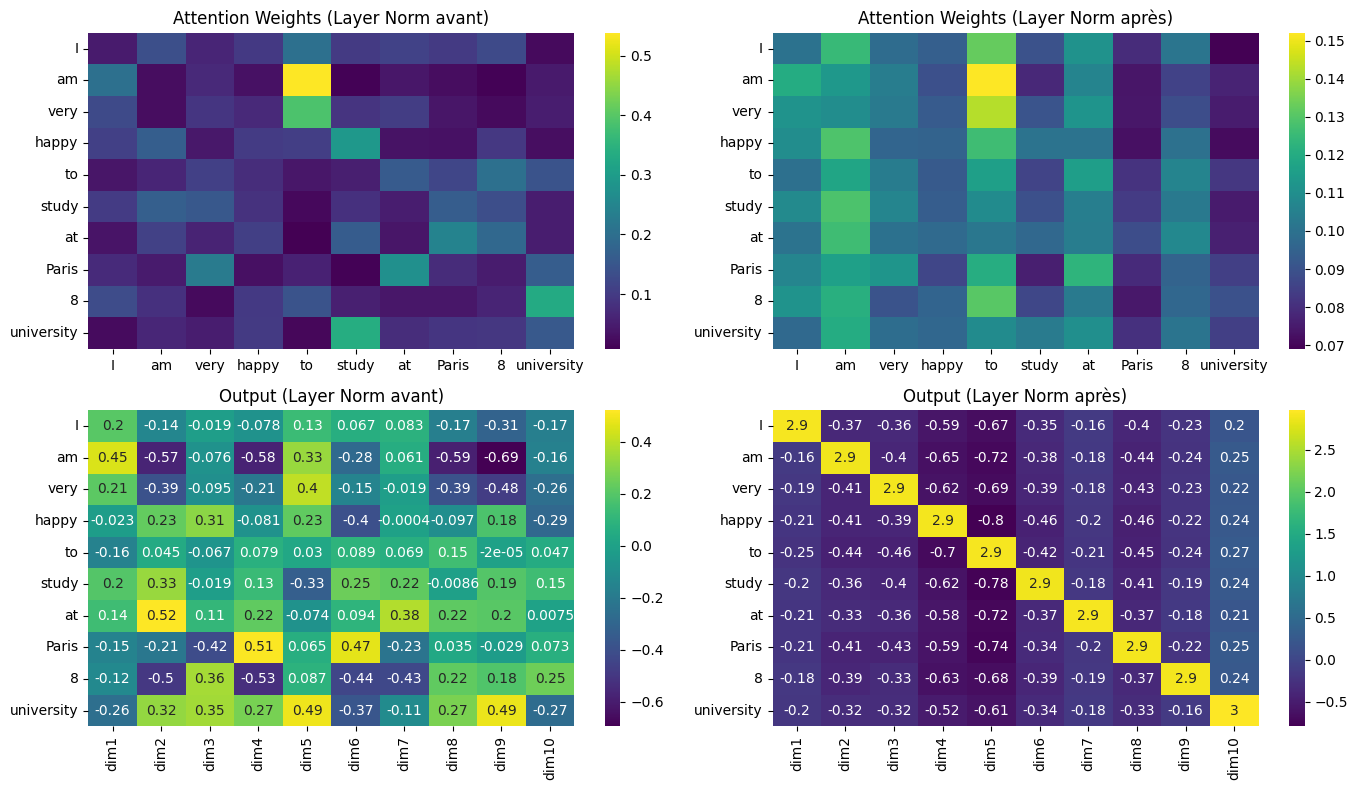


Attention Weights - Layer Norm avant:
 [[0.04728525 0.13484785 0.06320964 0.09628533 0.2016728  0.09788291
  0.11190318 0.09763651 0.12704627 0.02223027]
 [0.20153617 0.02572691 0.06905573 0.03177155 0.5381215  0.01185429
  0.04115387 0.02598128 0.01109221 0.04370649]
 [0.12736748 0.02536421 0.09058511 0.06857645 0.38831405 0.08761689
  0.10166701 0.03854024 0.02244014 0.04952843]
 [0.10788672 0.1650221  0.04314459 0.10097356 0.104911   0.29100852
  0.03288418 0.03250305 0.09355068 0.02811559]
 [0.03884614 0.06328995 0.10919666 0.07502458 0.04111667 0.05187723
  0.15827834 0.11837949 0.20085536 0.14313558]
 [0.10027096 0.16708541 0.15155707 0.08335665 0.02035549 0.08058027
  0.0509866  0.16174584 0.13322251 0.0508392 ]
 [0.03517335 0.11024021 0.05921435 0.10649682 0.00802991 0.15958591
  0.03896702 0.2460904  0.18564888 0.05055315]
 [0.07186771 0.04537541 0.22711957 0.03070032 0.05673671 0.01133844
  0.27254179 0.07379557 0.04923776 0.16128671]
 [0.1291662  0.08136232 0.02117361 0.096

In [30]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Softmax function
def softmax(x):
    return np.exp(x) / np.sum(np.exp(x), axis=-1, keepdims=True)

# Layer normalization function
def layer_norm(x):
    return (x - np.mean(x, axis=-1, keepdims=True)) / (np.std(x, axis=-1, keepdims=True) + 1e-6)

# Fonction de self-attention avec option de normalisation
def self_attention_with_norm(inputs, norm_before=True):
    np.random.seed(0)
    d_model = inputs.shape[1]

    # Initialisation aléatoire des matrices
    Wq = np.random.rand(d_model, d_model)
    Wk = np.random.rand(d_model, d_model)
    Wv = np.random.rand(d_model, d_model)

    # ici changement : Layer Norm avant la self-attention (pré-normalization)
    if norm_before:
        inputs = layer_norm(inputs)

    # Calcul de Q, K, V
    Q = np.dot(inputs, Wq)
    K = np.dot(inputs, Wk)
    V = np.dot(inputs, Wv)

    # Scores d’attention
    scores = np.dot(Q, K.T) / np.sqrt(d_model)
    attention_weights = softmax(scores)

    # Calcul de la sortie d’attention
    attention_output = np.dot(attention_weights, V)

    # ici changement : Layer Norm après la self-attention (post-normalization)
    if not norm_before:
        attention_output = layer_norm(attention_output + inputs)

    return attention_weights, attention_output

sentence = "I am very happy to study at Paris 8 university".split()
vocab_size = len(sentence)

# Création d'embeddings
word_to_index = {word: idx for idx, word in enumerate(sentence)}
embeddings = np.eye(vocab_size)
inputs = np.array([embeddings[word_to_index[word]] for word in sentence])

# Self-Attention avec normalisation avant
weights_before, output_before = self_attention_with_norm(inputs, norm_before=True)

# Self-Attention avec normalisation après
weights_after, output_after = self_attention_with_norm(inputs, norm_before=False)

plt.figure(figsize=(14, 8))

plt.subplot(2, 2, 1)
sns.heatmap(weights_before, cmap='viridis', xticklabels=sentence, yticklabels=sentence)
plt.title("Attention Weights (Layer Norm avant)")

plt.subplot(2, 2, 2)
sns.heatmap(weights_after, cmap='viridis', xticklabels=sentence, yticklabels=sentence)
plt.title("Attention Weights (Layer Norm après)")

plt.subplot(2, 2, 3)
sns.heatmap(output_before, annot=True, cmap='viridis', xticklabels=[f'dim{i+1}' for i in range(output_before.shape[1])], yticklabels=sentence)
plt.title("Output (Layer Norm avant)")

plt.subplot(2, 2, 4)
sns.heatmap(output_after, annot=True, cmap='viridis', xticklabels=[f'dim{i+1}' for i in range(output_after.shape[1])], yticklabels=sentence)
plt.title("Output (Layer Norm après)")

plt.tight_layout()
plt.show()

print("\nAttention Weights - Layer Norm avant:\n", weights_before)
print("\nAttention Weights - Layer Norm après:\n", weights_after)
print("\nOutput - Layer Norm avant:\n", output_before)
print("\nOutput - Layer Norm après:\n", output_after)


---> Layer Norm après l’attention : il stabilise directement la sortie, les valeurs restent bien centrées et normalisées.

---> Layer Norm avant l’attention : il influence les scores et les poids d’attention, car l’entrée est déjà normalisée.

---> Le modèle devient plus stable et régulier, mais les relations entre mots peuvent changer selon la position de la normalization.

#QUESTION 2 EXO 5:

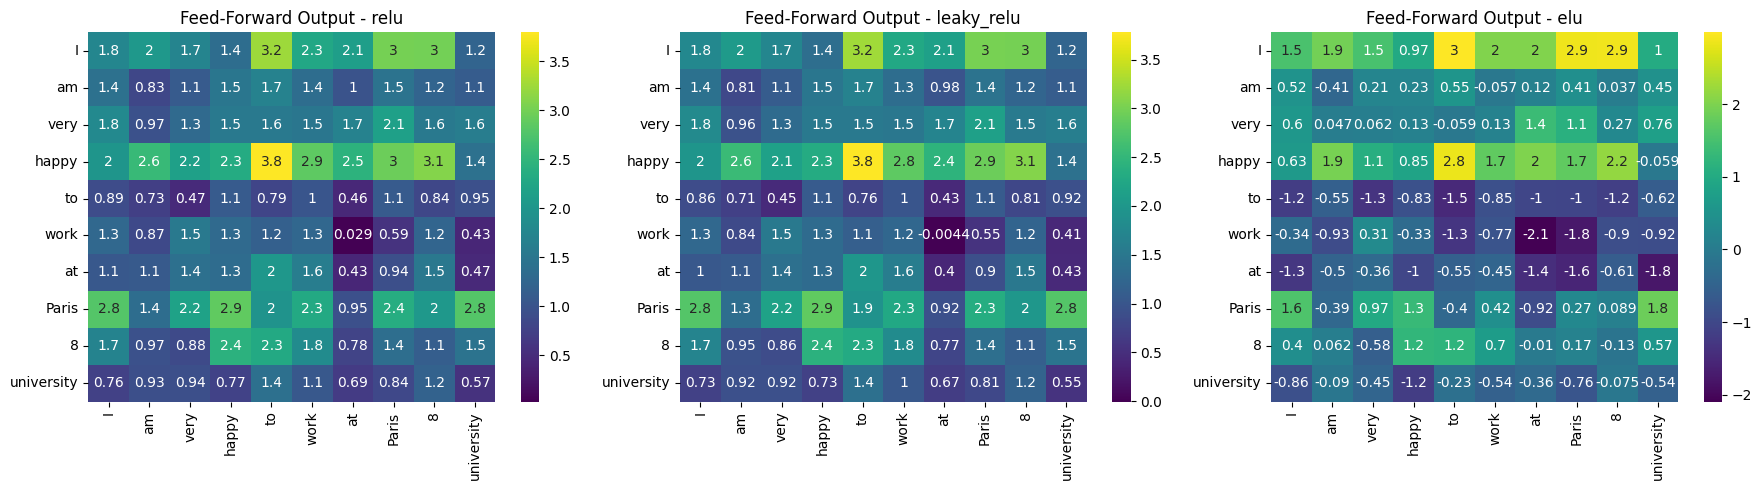

In [33]:
# Question 2 (Expérimentation avec différentes activations)


def feed_forward_with_activation(inputs, activation='relu'):

    np.random.seed(0)
    d_model = inputs.shape[1]

    W1 = np.random.rand(d_model, d_model)
    W2 = np.random.rand(d_model, d_model)

    x = np.dot(inputs, W1)

    # Application de l'activation choisie
    if activation == 'relu':
        x = np.maximum(0, x)
    elif activation == 'leaky_relu':
        x = np.where(x > 0, x, 0.01*x)
    elif activation == 'elu':
        x = np.where(x > 0, x, np.exp(x)-1)

    x = np.dot(x, W2)
    return x

# Calcul des sorties avec différentes activations

activations = ['relu', 'leaky_relu', 'elu']
outputs_activations = {}

for act in activations:
    ff_output = feed_forward_with_activation(encoder_output, activation=act)
    outputs_activations[act] = ff_output


plt.figure(figsize=(18,5))
for i, act in enumerate(activations):
    plt.subplot(1,3,i+1)
    sns.heatmap(outputs_activations[act], annot=True, cmap='viridis',
                xticklabels=encoder_sentence, yticklabels=encoder_sentence)
    plt.title(f'Feed-Forward Output - {act}')
plt.tight_layout()
plt.show()


---> ReLU : valeurs négatives supprimées.

---> Leaky ReLU : valeurs négatives légèrement conservées, on voit aussi plus de variations, les gradients passent mieux.

---> ELU : valeurs négatives importantes on voit une sortie plus "lisse", mieux centrée autour de 0.

Je pense que selon l’activation, la sortie du feed-forward change légèrement, mais le modèle reste capable de capturer le contexte.

#QUESTION 3 EXO 5:

/tmp/ipython-input-2538733883.py:9: RuntimeWarning: invalid value encountered in divide
  return np.exp(x) / np.sum(np.exp(x), axis=-1, keepdims=True)


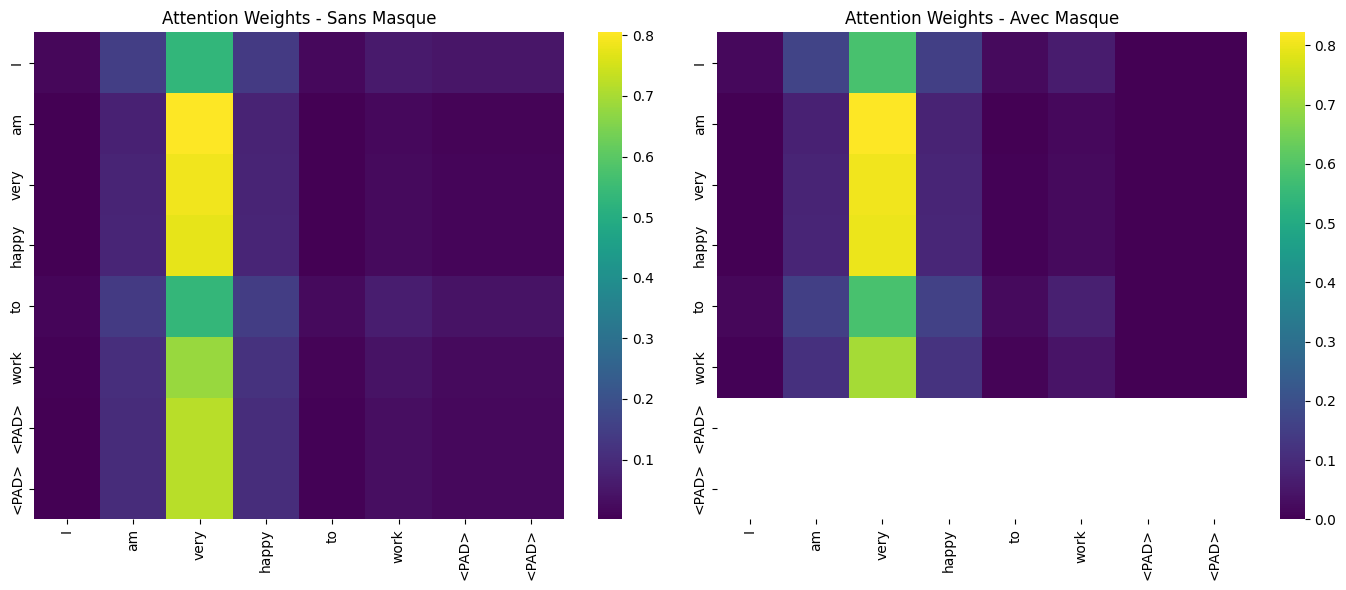

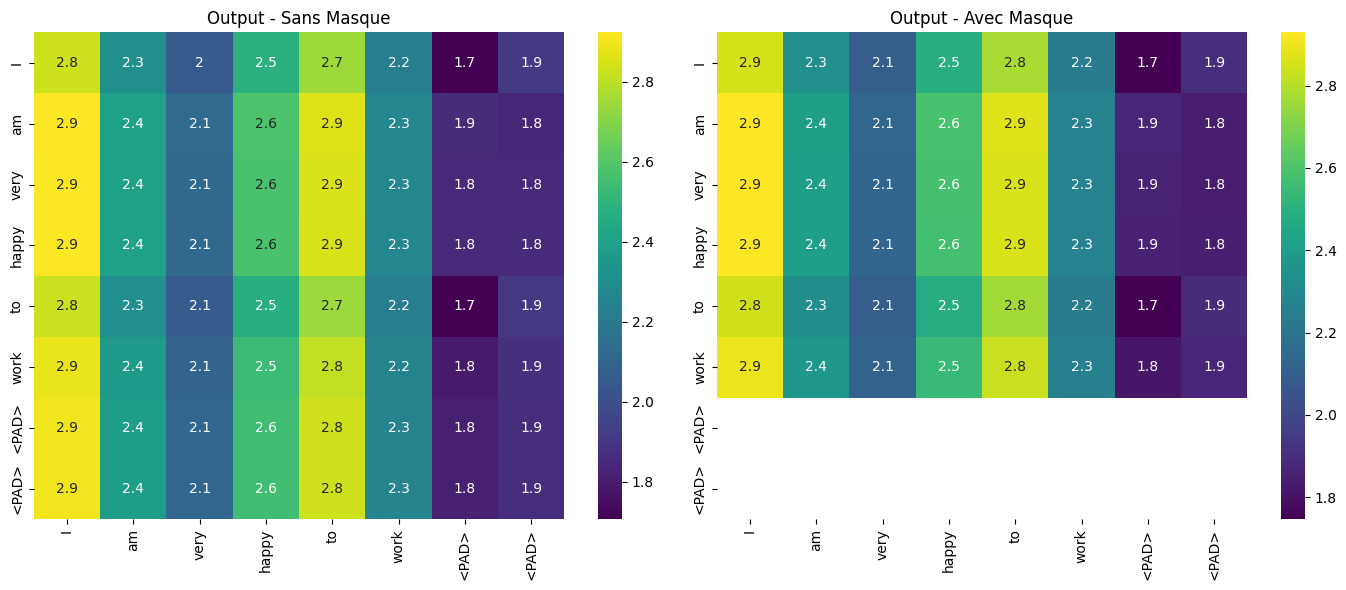

In [34]:
#Question 3 (Masque pour séquences de longueur variable)

# Exemple de phrases avec padding
encoder_sentence_mask = ["I", "am", "very", "happy", "to", "work", "<PAD>", "<PAD>"]
decoder_sentence_mask = ["Je", "suis", "très", "heureux", "<PAD>", "<PAD>"]

# Création d'embeddings
encoder_embeddings_mask = {word: np.random.rand(8) for word in encoder_sentence_mask}
decoder_embeddings_mask = {word: np.random.rand(8) for word in decoder_sentence_mask}

encoder_inputs_mask = np.array([encoder_embeddings_mask[word] for word in encoder_sentence_mask])
decoder_inputs_mask = np.array([decoder_embeddings_mask[word] for word in decoder_sentence_mask])

# Création du masque : 1 si mot réel, 0 si <PAD>
encoder_mask = np.array([1 if word != "<PAD>" else 0 for word in encoder_sentence_mask])
decoder_mask = np.array([1 if word != "<PAD>" else 0 for word in decoder_sentence_mask])

# Masque 2D pour les scores d'attention
encoder_mask_matrix = np.outer(encoder_mask, encoder_mask)
decoder_mask_matrix = np.outer(decoder_mask, decoder_mask)

# Encoder self-attention avec et sans masque
d_model = encoder_inputs_mask.shape[1]
np.random.seed(0)
Wq_enc = np.random.rand(d_model, d_model)
Wk_enc = np.random.rand(d_model, d_model)
Wv_enc = np.random.rand(d_model, d_model)

Q_enc = np.dot(encoder_inputs_mask, Wq_enc)
K_enc = np.dot(encoder_inputs_mask, Wk_enc)
V_enc = np.dot(encoder_inputs_mask, Wv_enc)

scores_enc = np.dot(Q_enc, K_enc.T) / np.sqrt(d_model)

# Application du masque
scores_enc_masked = np.where(encoder_mask_matrix == 0, -1e9, scores_enc)

# Attention weights
attention_weights_no_mask = softmax(scores_enc)
attention_weights_with_mask = softmax(scores_enc_masked)

# Outputs
output_no_mask = np.dot(attention_weights_no_mask, V_enc)
output_with_mask = np.dot(attention_weights_with_mask, V_enc)

plt.figure(figsize=(14,6))

plt.subplot(1,2,1)
sns.heatmap(attention_weights_no_mask, cmap='viridis', xticklabels=encoder_sentence_mask, yticklabels=encoder_sentence_mask)
plt.title('Attention Weights - Sans Masque')

plt.subplot(1,2,2)
sns.heatmap(attention_weights_with_mask, cmap='viridis', xticklabels=encoder_sentence_mask, yticklabels=encoder_sentence_mask)
plt.title('Attention Weights - Avec Masque')

plt.tight_layout()
plt.show()

plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
sns.heatmap(output_no_mask, annot=True, cmap='viridis', xticklabels=encoder_sentence_mask, yticklabels=encoder_sentence_mask)
plt.title('Output - Sans Masque')

plt.subplot(1,2,2)
sns.heatmap(output_with_mask, annot=True, cmap='viridis', xticklabels=encoder_sentence_mask, yticklabels=encoder_sentence_mask)
plt.title('Output - Avec Masque')

plt.tight_layout()
plt.show()


---> Sans masque : les <PAD> participent à l’attention, donc le modèle perd de l’information, les poids sont mal répartis.

---> Avec masque : les <PAD> sont ignorés donc les scores d’attention ne sont calculés que pour les mots réels donc meilleure qualité des sorties.

----> Le modèle devient performant aux séquences de longueur variable et ne tient compte que des mots réels.

#EXERCICE 6:

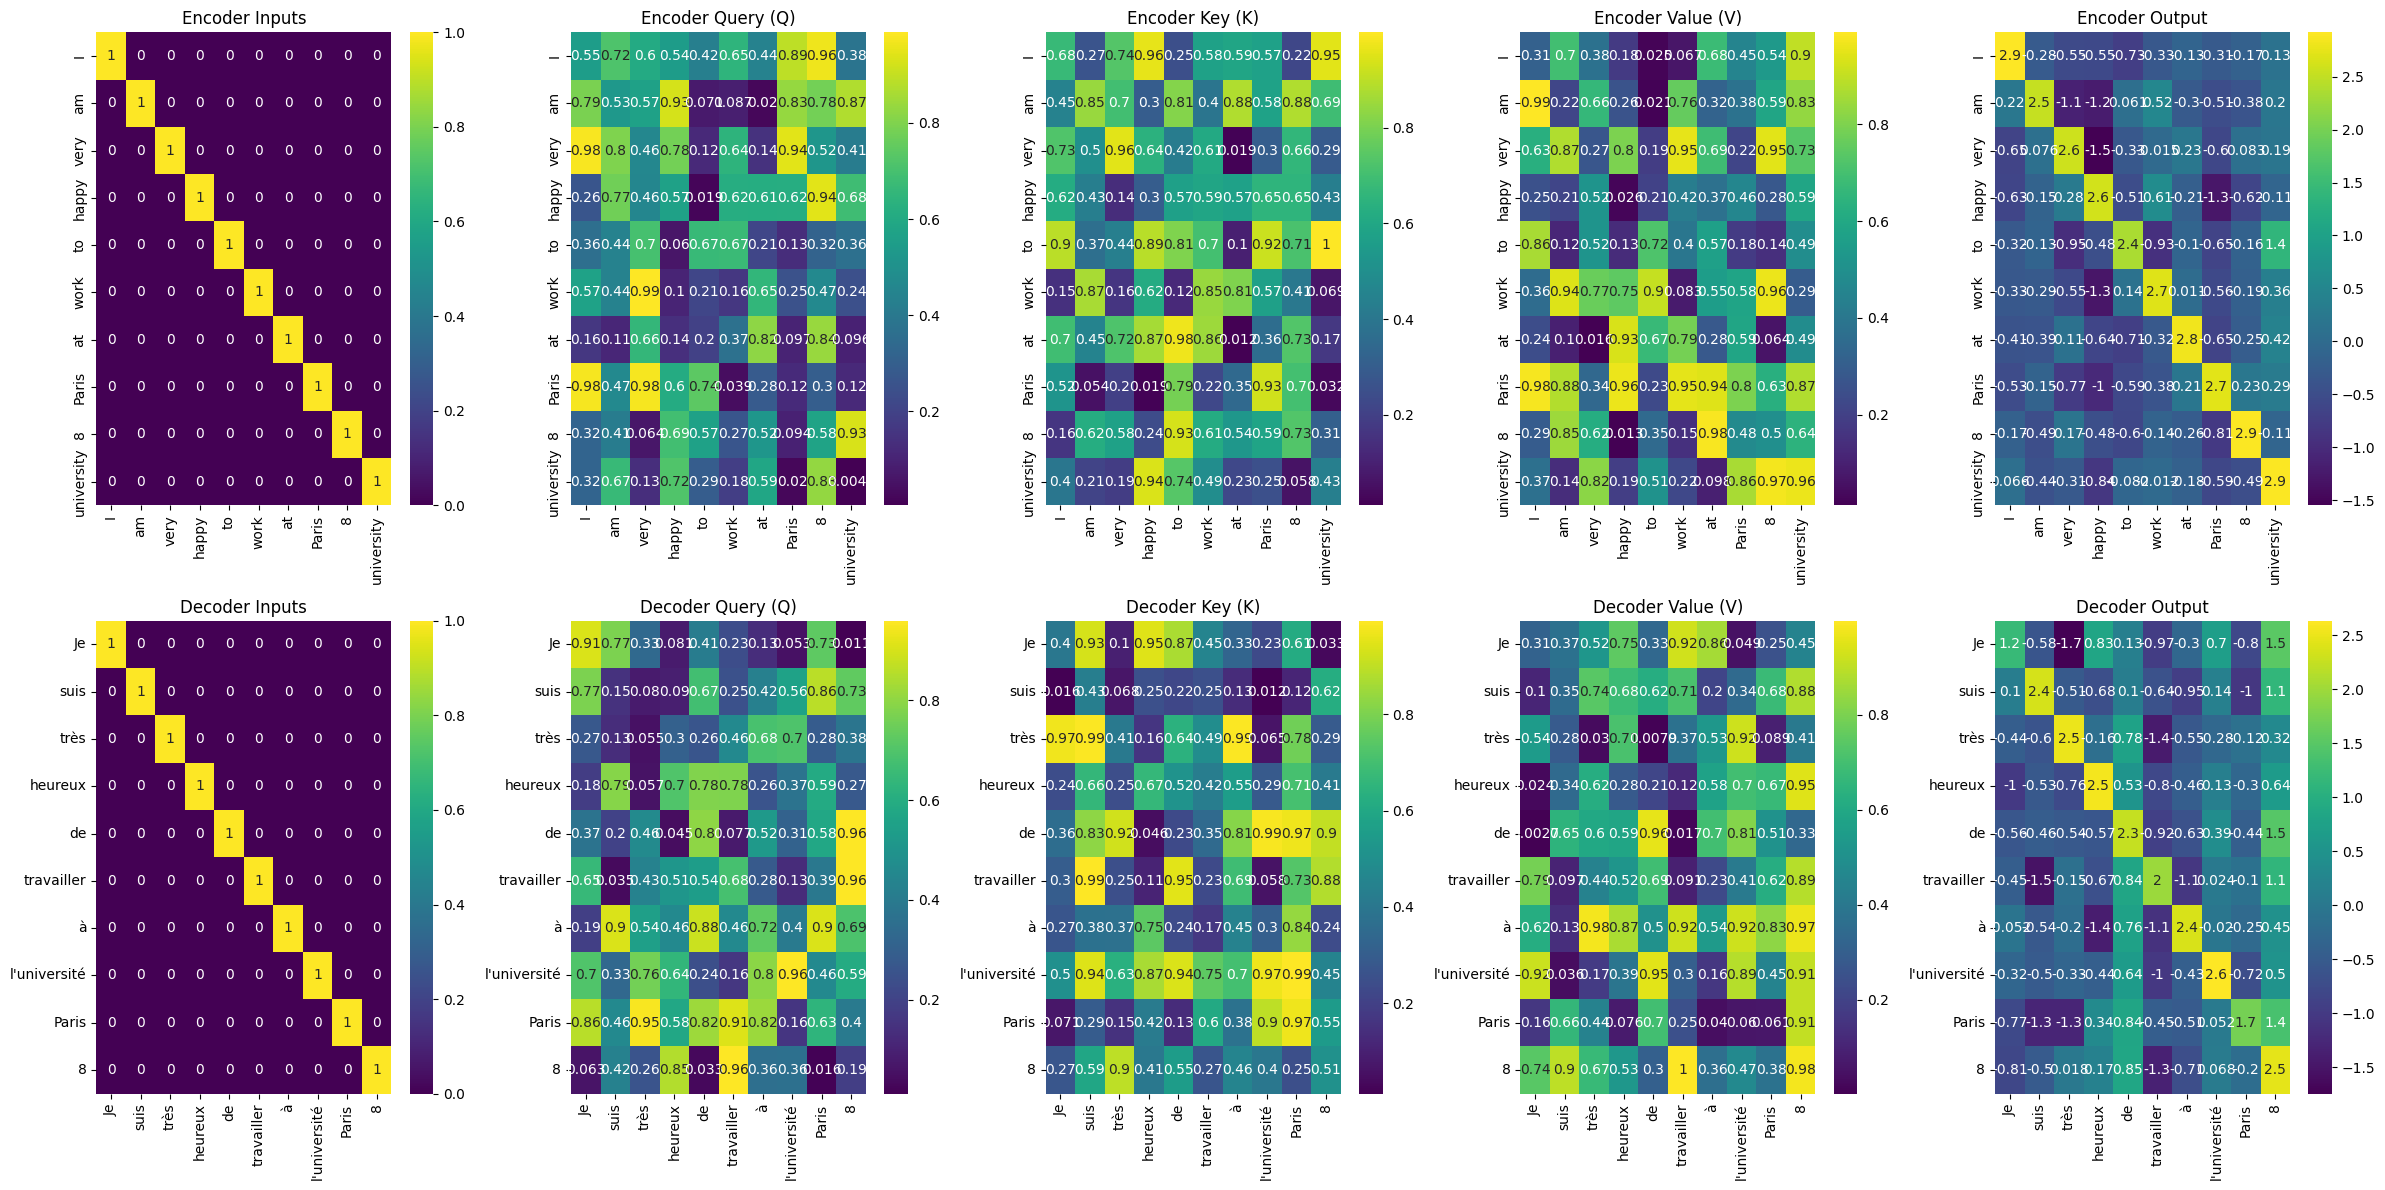

Encoder Sentence: ['I', 'am', 'very', 'happy', 'to', 'work', 'at', 'Paris', '8', 'university']

Encoder Inputs:
 [[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]

Encoder Query (Q):
 [[0.5488135  0.71518937 0.60276338 0.54488318 0.4236548  0.64589411
  0.43758721 0.891773   0.96366276 0.38344152]
 [0.79172504 0.52889492 0.56804456 0.92559664 0.07103606 0.0871293
  0.0202184  0.83261985 0.77815675 0.87001215]
 [0.97861834 0.79915856 0.46147936 0.78052918 0.11827443 0.63992102
  0.14335329 0.94466892 0.52184832 0.41466194]
 [0.26455561 0.77423369 0.45615033 0.56843395 0.0187898  0.6176355
  0.61209572 0.616934   0.94374808 0.6818203 ]
 [0.3595079  0.43703195 0.6976312  0.06022547 0.66676672 0.67063787
  0.21038

In [35]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Softmax function
def softmax(x):
    return np.exp(x) / np.sum(np.exp(x), axis=-1, keepdims=True)

# Layer normalization function
def layer_norm(x):
    return (x - np.mean(x, axis=-1, keepdims=True)) / np.std(x, axis=-1, keepdims=True)

# Tokenize the sentences
encoder_sentence = "I am very happy to work at Paris 8 university".split()
decoder_sentence = "Je suis très heureux de travailler à l'université Paris 8".split()

# Vocabulary sizes
encoder_vocab_size = len(encoder_sentence)
decoder_vocab_size = len(decoder_sentence)

# Create one-hot embeddings for each word
encoder_word_to_index = {word: idx for idx, word in enumerate(encoder_sentence)}
decoder_word_to_index = {word: idx for idx, word in enumerate(decoder_sentence)}
encoder_embeddings = np.eye(encoder_vocab_size)
decoder_embeddings = np.eye(decoder_vocab_size)

# Convert sentences to sequences of embeddings
encoder_inputs = np.array([encoder_embeddings[encoder_word_to_index[word]] for word in encoder_sentence])
decoder_inputs = np.array([decoder_embeddings[decoder_word_to_index[word]] for word in decoder_sentence])

# Initialize weights for Query, Key, Value, and Feed-Forward matrices
np.random.seed(0)
Wq_encoder = np.random.rand(encoder_vocab_size, encoder_vocab_size)
Wk_encoder = np.random.rand(encoder_vocab_size, encoder_vocab_size)
Wv_encoder = np.random.rand(encoder_vocab_size, encoder_vocab_size)

Wq_decoder = np.random.rand(decoder_vocab_size, decoder_vocab_size)
Wk_decoder = np.random.rand(decoder_vocab_size, decoder_vocab_size)
Wv_decoder = np.random.rand(decoder_vocab_size, decoder_vocab_size)

W1_encoder = np.random.rand(encoder_vocab_size, encoder_vocab_size)  # Feed-Forward layer 1 weights for encoder
W2_encoder = np.random.rand(encoder_vocab_size, encoder_vocab_size)  # Feed-Forward layer 2 weights for encoder

W1_decoder = np.random.rand(decoder_vocab_size, decoder_vocab_size)  # Feed-Forward layer 1 weights for decoder
W2_decoder = np.random.rand(decoder_vocab_size, decoder_vocab_size)  # Feed-Forward layer 2 weights for decoder

# Encoder Self-Attention Layer
Q_encoder = np.dot(encoder_inputs, Wq_encoder)
K_encoder = np.dot(encoder_inputs, Wk_encoder)
V_encoder = np.dot(encoder_inputs, Wv_encoder)

scores_encoder = np.dot(Q_encoder, K_encoder.T) / np.sqrt(K_encoder.shape[1])
attention_weights_encoder = softmax(scores_encoder)
attention_output_encoder = np.dot(attention_weights_encoder, V_encoder)

# Add & Norm Layer (Encoder Self-Attention Output + Inputs)
attention_output_encoder = layer_norm(attention_output_encoder + encoder_inputs)

# Encoder Feed-Forward Layer
ffn_output_encoder = np.dot(attention_output_encoder, W1_encoder)
ffn_output_encoder = np.maximum(0, ffn_output_encoder)  # ReLU activation
ffn_output_encoder = np.dot(ffn_output_encoder, W2_encoder)

# Add & Norm Layer (Feed-Forward Output + Self-Attention Output)
encoder_output = layer_norm(ffn_output_encoder + attention_output_encoder)

# Decoder Self-Attention Layer
Q_decoder = np.dot(decoder_inputs, Wq_decoder)
K_decoder = np.dot(decoder_inputs, Wk_decoder)
V_decoder = np.dot(decoder_inputs, Wv_decoder)

scores_decoder = np.dot(Q_decoder, K_decoder.T) / np.sqrt(K_decoder.shape[1])
attention_weights_decoder = softmax(scores_decoder)
attention_output_decoder = np.dot(attention_weights_decoder, V_decoder)

# Add & Norm Layer (Decoder Self-Attention Output + Inputs)
attention_output_decoder = layer_norm(attention_output_decoder + decoder_inputs)

# Decoder Cross-Attention Layer (using encoder outputs)
Q_cross = np.dot(attention_output_decoder, Wq_decoder)
K_cross = np.dot(encoder_output, Wk_encoder)
V_cross = np.dot(encoder_output, Wv_encoder)

scores_cross = np.dot(Q_cross, K_cross.T) / np.sqrt(K_cross.shape[1])
attention_weights_cross = softmax(scores_cross)
cross_attention_output = np.dot(attention_weights_cross, V_cross)

# Add & Norm Layer (Cross-Attention Output + Decoder Self-Attention Output)
cross_attention_output = layer_norm(cross_attention_output + attention_output_decoder)

# Decoder Feed-Forward Layer
ffn_output_decoder = np.dot(cross_attention_output, W1_decoder)
ffn_output_decoder = np.maximum(0, ffn_output_decoder)  # ReLU activation
ffn_output_decoder = np.dot(ffn_output_decoder, W2_decoder)

# Add & Norm Layer (Feed-Forward Output + Cross-Attention Output)
decoder_output = layer_norm(ffn_output_decoder + cross_attention_output)

# Visualization
plt.figure(figsize=(24, 12))

# Plotting the encoder inputs
plt.subplot(2, 5, 1)
sns.heatmap(encoder_inputs, annot=True, cmap='viridis', xticklabels=encoder_sentence, yticklabels=encoder_sentence)
plt.title('Encoder Inputs')

# Plotting encoder Query (Q) matrix
plt.subplot(2, 5, 2)
sns.heatmap(Q_encoder, annot=True, cmap='viridis', xticklabels=encoder_sentence, yticklabels=encoder_sentence)
plt.title('Encoder Query (Q)')

# Plotting encoder Key (K) matrix
plt.subplot(2, 5, 3)
sns.heatmap(K_encoder, annot=True, cmap='viridis', xticklabels=encoder_sentence, yticklabels=encoder_sentence)
plt.title('Encoder Key (K)')

# Plotting encoder Value (V) matrix
plt.subplot(2, 5, 4)
sns.heatmap(V_encoder, annot=True, cmap='viridis', xticklabels=encoder_sentence, yticklabels=encoder_sentence)
plt.title('Encoder Value (V)')

# Plotting encoder output
plt.subplot(2, 5, 5)
sns.heatmap(encoder_output, annot=True, cmap='viridis', xticklabels=encoder_sentence, yticklabels=encoder_sentence)
plt.title('Encoder Output')

# Plotting the decoder inputs
plt.subplot(2, 5, 6)
sns.heatmap(decoder_inputs, annot=True, cmap='viridis', xticklabels=decoder_sentence, yticklabels=decoder_sentence)
plt.title('Decoder Inputs')

# Plotting decoder Query (Q) matrix
plt.subplot(2, 5, 7)
sns.heatmap(Q_decoder, annot=True, cmap='viridis', xticklabels=decoder_sentence, yticklabels=decoder_sentence)
plt.title('Decoder Query (Q)')

# Plotting decoder Key (K) matrix
plt.subplot(2, 5, 8)
sns.heatmap(K_decoder, annot=True, cmap='viridis', xticklabels=decoder_sentence, yticklabels=decoder_sentence)
plt.title('Decoder Key (K)')

# Plotting decoder Value (V) matrix
plt.subplot(2, 5, 9)
sns.heatmap(V_decoder, annot=True, cmap='viridis', xticklabels=decoder_sentence, yticklabels=decoder_sentence)
plt.title('Decoder Value (V)')

# Plotting decoder output
plt.subplot(2, 5, 10)
sns.heatmap(decoder_output, annot=True, cmap='viridis', xticklabels=decoder_sentence, yticklabels=decoder_sentence)
plt.title('Decoder Output')

plt.tight_layout()
plt.show()

print("Encoder Sentence:", encoder_sentence)
print("\nEncoder Inputs:\n", encoder_inputs)
print("\nEncoder Query (Q):\n", Q_encoder)
print("\nEncoder Key (K):\n", K_encoder)
print("\nEncoder Value (V):\n", V_encoder)
print("\nEncoder Output:\n", encoder_output)

print("\nDecoder Sentence:", decoder_sentence)
print("\nDecoder Inputs:\n", decoder_inputs)
print("\nDecoder Query (Q):\n", Q_decoder)
print("\nDecoder Key (K):\n", K_decoder)
print("\nDecoder Value (V):\n", V_decoder)
print("\nDecoder Output:\n", decoder_output)

#Question 1 EXO 6

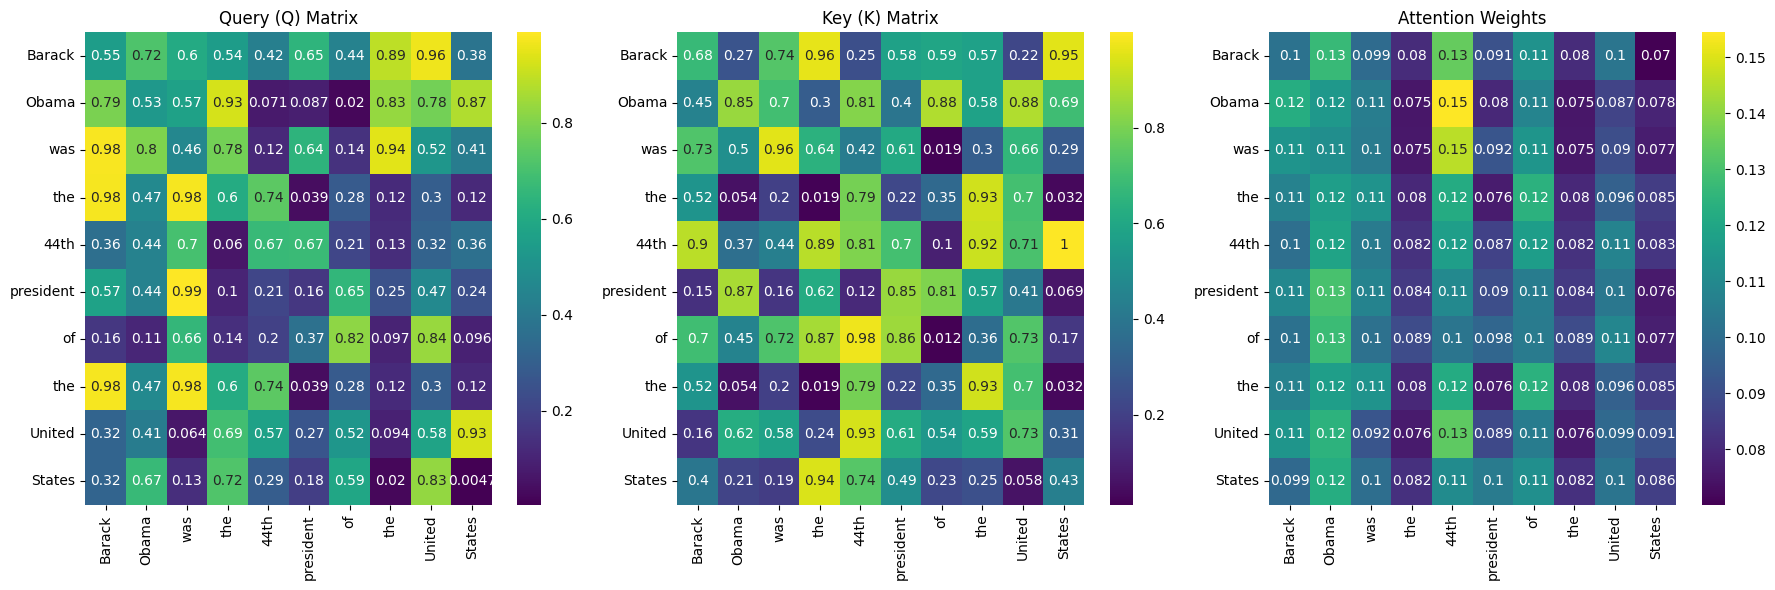

Sentence: ['Barack', 'Obama', 'was', 'the', '44th', 'president', 'of', 'the', 'United', 'States']

Query (Q):
 [[0.5488135  0.71518937 0.60276338 0.54488318 0.4236548  0.64589411
  0.43758721 0.891773   0.96366276 0.38344152]
 [0.79172504 0.52889492 0.56804456 0.92559664 0.07103606 0.0871293
  0.0202184  0.83261985 0.77815675 0.87001215]
 [0.97861834 0.79915856 0.46147936 0.78052918 0.11827443 0.63992102
  0.14335329 0.94466892 0.52184832 0.41466194]
 [0.97645947 0.4686512  0.97676109 0.60484552 0.73926358 0.03918779
  0.28280696 0.12019656 0.2961402  0.11872772]
 [0.3595079  0.43703195 0.6976312  0.06022547 0.66676672 0.67063787
  0.21038256 0.1289263  0.31542835 0.36371077]
 [0.57019677 0.43860151 0.98837384 0.10204481 0.20887676 0.16130952
  0.65310833 0.2532916  0.46631077 0.24442559]
 [0.15896958 0.11037514 0.65632959 0.13818295 0.19658236 0.36872517
  0.82099323 0.09710128 0.83794491 0.09609841]
 [0.97645947 0.4686512  0.97676109 0.60484552 0.73926358 0.03918779
  0.28280696 0.12

In [36]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Softmax function
def softmax(x):
    return np.exp(x) / np.sum(np.exp(x), axis=-1, keepdims=True)

# Layer normalization function
def layer_norm(x):
    return (x - np.mean(x, axis=-1, keepdims=True)) / np.std(x, axis=-1, keepdims=True)

# nouvelle phrase avec entité nommée
sentence = "Barack Obama was the 44th president of the United States".split()

# création des embeddings one-hot
vocab_size = len(sentence)
word_to_index = {word: idx for idx, word in enumerate(sentence)}
embeddings = np.eye(vocab_size)
inputs = np.array([embeddings[word_to_index[word]] for word in sentence])

np.random.seed(0)
Wq = np.random.rand(vocab_size, vocab_size)
Wk = np.random.rand(vocab_size, vocab_size)
Wv = np.random.rand(vocab_size, vocab_size)

Q = np.dot(inputs, Wq)
K = np.dot(inputs, Wk)
V = np.dot(inputs, Wv)

scores = np.dot(Q, K.T) / np.sqrt(K.shape[1])

attention_weights = softmax(scores)

attention_output = np.dot(attention_weights, V)

plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
sns.heatmap(Q, annot=True, cmap='viridis', xticklabels=sentence, yticklabels=sentence)
plt.title('Query (Q) Matrix')

plt.subplot(1, 3, 2)
sns.heatmap(K, annot=True, cmap='viridis', xticklabels=sentence, yticklabels=sentence)
plt.title('Key (K) Matrix')

plt.subplot(1, 3, 3)
sns.heatmap(attention_weights, annot=True, cmap='viridis', xticklabels=sentence, yticklabels=sentence)
plt.title('Attention Weights')

plt.tight_layout()
plt.show()

print("Sentence:", sentence)
print("\nQuery (Q):\n", Q)
print("\nKey (K):\n", K)
print("\nValue (V):\n", V)
print("\nAttention Weights:\n", attention_weights)
print("\nAttention Output:\n", attention_output)


---> Le mécanisme de self-attention identifie que "Barack" et "Obama" ont une forte corrélation, les poids d’attention sont donc plus élevés entre ces deux mots.

---> De même, les mots comme "United" et "States" ont aussi une forte corrélation.

#Question 2 exo 6 :

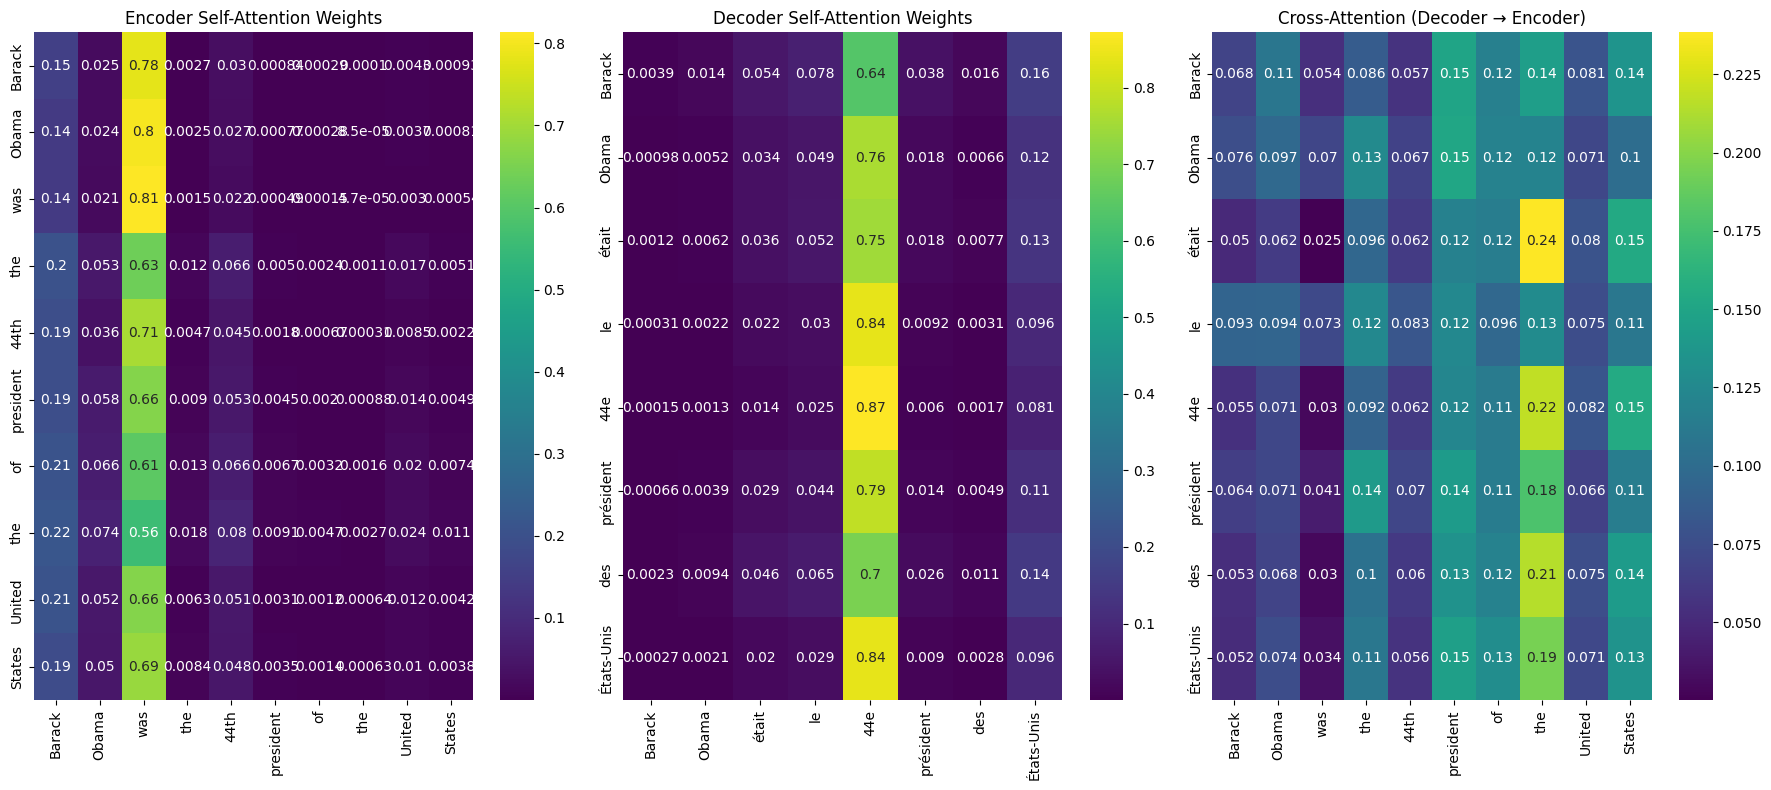


Encoder Output:
 [[-1.86043973  0.45184453  0.01432102  0.02624082 -0.23840767 -0.86555318
   1.72194632  0.7500479 ]
 [-1.52897739 -0.06422637  0.30556697 -0.37804974  1.28516704 -0.15684925
   1.61053983 -1.07317109]
 [-1.92716466  0.28204567  0.15262347  0.73431391  0.44828756 -1.32775275
   1.23060437  0.40704244]
 [-1.6077837   0.16838372 -0.22811797  0.86676864  0.10942539 -1.31078934
   1.65258053  0.34953273]
 [-1.68609745  0.12187926 -0.54579157  0.19398759  0.18039821 -0.66533773
   2.05170315  0.34925856]
 [-2.02981486  0.37197291  0.20189033 -0.18107375  0.86983637 -0.78819535
   1.51268977  0.04269458]
 [-1.51372974  0.04894592 -0.13436862  0.76906002  0.90333402 -1.51265543
   1.41130192  0.02811191]
 [-1.28445488  0.09328438 -0.13317796  0.09705824 -0.30687924 -0.85422364
   2.34272105  0.04567206]
 [-1.64587943  0.03149163  0.04827     0.2512646   0.13335249 -1.18024658
   1.89673631  0.46501098]
 [-1.02139274  0.71005338 -0.01103911 -0.21613053 -0.4325306  -1.16364562

In [40]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def softmax(x):
    e_x = np.exp(x - np.max(x))
    return e_x / e_x.sum(axis=-1, keepdims=True)

def layer_norm(x):
    return (x - np.mean(x, axis=-1, keepdims=True)) / (np.std(x, axis=-1, keepdims=True) + 1e-6)

encoder_sentence = "Barack Obama was the 44th president of the United States".split()
decoder_sentence = "Barack Obama était le 44e président des États-Unis".split()

enc_vocab_size = len(encoder_sentence)
dec_vocab_size = len(decoder_sentence)
d_model = 8

encoder_embeddings = np.eye(enc_vocab_size)
decoder_embeddings = np.eye(dec_vocab_size)

encoder_inputs = np.array([encoder_embeddings[i] for i in range(enc_vocab_size)])
decoder_inputs = np.array([decoder_embeddings[i] for i in range(dec_vocab_size)])


np.random.seed(0)
W_emb_enc = np.random.rand(enc_vocab_size, d_model)
W_emb_dec = np.random.rand(dec_vocab_size, d_model)

# Self-attention (encodeur et décodeur)
Wq_enc = np.random.rand(d_model, d_model)
Wk_enc = np.random.rand(d_model, d_model)
Wv_enc = np.random.rand(d_model, d_model)

Wq_dec = np.random.rand(d_model, d_model)
Wk_dec = np.random.rand(d_model, d_model)
Wv_dec = np.random.rand(d_model, d_model)

# Feed-forward layers
W1_enc = np.random.rand(d_model, d_model)
W2_enc = np.random.rand(d_model, d_model)
W1_dec = np.random.rand(d_model, d_model)
W2_dec = np.random.rand(d_model, d_model)

# ----------- ENCODER -----------
enc_proj = np.dot(encoder_inputs, W_emb_enc)

Q_enc = np.dot(enc_proj, Wq_enc)
K_enc = np.dot(enc_proj, Wk_enc)
V_enc = np.dot(enc_proj, Wv_enc)

scores_enc = np.dot(Q_enc, K_enc.T) / np.sqrt(d_model)
attn_weights_enc = softmax(scores_enc)
attn_output_enc = np.dot(attn_weights_enc, V_enc)
attn_output_enc = layer_norm(attn_output_enc + enc_proj)


ffn_enc = np.dot(np.maximum(0, np.dot(attn_output_enc, W1_enc)), W2_enc)
encoder_output = layer_norm(ffn_enc + attn_output_enc)

# ----------- DECODER -----------
dec_proj = np.dot(decoder_inputs, W_emb_dec)

Q_dec = np.dot(dec_proj, Wq_dec)
K_dec = np.dot(dec_proj, Wk_dec)
V_dec = np.dot(dec_proj, Wv_dec)

scores_dec = np.dot(Q_dec, K_dec.T) / np.sqrt(d_model)
attn_weights_dec = softmax(scores_dec)
attn_output_dec = np.dot(attn_weights_dec, V_dec)
attn_output_dec = layer_norm(attn_output_dec + dec_proj)

Q_cross = np.dot(attn_output_dec, Wq_dec)
K_cross = K_enc
V_cross = V_enc

scores_cross = np.dot(Q_cross, K_cross.T) / np.sqrt(d_model)
attn_weights_cross = softmax(scores_cross)
cross_output = np.dot(attn_weights_cross, V_cross)
cross_output = layer_norm(cross_output + attn_output_dec)

ffn_dec = np.dot(np.maximum(0, np.dot(cross_output, W1_dec)), W2_dec)
decoder_output = layer_norm(ffn_dec + cross_output)

plt.figure(figsize=(18, 8))

plt.subplot(1, 3, 1)
sns.heatmap(attn_weights_enc, annot=True, cmap="viridis",
            xticklabels=encoder_sentence, yticklabels=encoder_sentence)
plt.title("Encoder Self-Attention Weights")

plt.subplot(1, 3, 2)
sns.heatmap(attn_weights_dec, annot=True, cmap="viridis",
            xticklabels=decoder_sentence, yticklabels=decoder_sentence)
plt.title("Decoder Self-Attention Weights")

plt.subplot(1, 3, 3)
sns.heatmap(attn_weights_cross, annot=True, cmap="viridis",
            xticklabels=encoder_sentence, yticklabels=decoder_sentence)
plt.title("Cross-Attention (Decoder → Encoder)")

plt.tight_layout()
plt.show()

print("\nEncoder Output:\n", encoder_output)
print("\nDecoder Output:\n", decoder_output)


---> Le cross-attention montre comment le décodeur fait correspondre les mots anglais à leurs équivalents français, par exemple, "president" correspond à "président", et "44th" à "44e".

----> Donc le mécanisme d’attention permet au modèle de lier les mots entre les deux langues, capturant les relations de traduction.

#Question 3 Exo 6

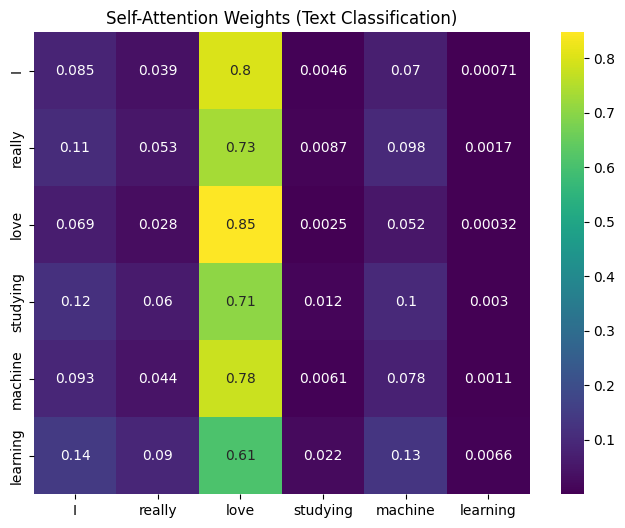

Sentence: I really love studying machine learning

Attention Weights:
 [[8.49531310e-02 3.87953012e-02 8.00762783e-01 4.60383872e-03
  7.01714674e-02 7.13478567e-04]
 [1.05402782e-01 5.27766533e-02 7.33034655e-01 8.68173260e-03
  9.84000420e-02 1.70413519e-03]
 [6.91745297e-02 2.77961992e-02 8.47906969e-01 2.54168637e-03
  5.22640560e-02 3.16559610e-04]
 [1.19473175e-01 6.04556388e-02 7.05078894e-01 1.24069118e-02
  9.96299856e-02 2.95539478e-03]
 [9.29605050e-02 4.35164529e-02 7.78656762e-01 6.09133155e-03
  7.77217135e-02 1.05323458e-03]
 [1.43578348e-01 9.04635921e-02 6.06943024e-01 2.15245020e-02
  1.30913744e-01 6.57678941e-03]]

Sentence Representation (features):
 [-0.47325059  1.53280465  0.90770941 -0.42665359  0.2255276  -0.34072152
 -1.75429175  0.32887579]

Class Probabilities: [0.67435822 0.32564178]
Predicted Class: Positive


In [42]:
def softmax(x):
    e_x = np.exp(x - np.max(x))
    return e_x / e_x.sum(axis=-1, keepdims=True)

def layer_norm(x):
    return (x - np.mean(x, axis=-1, keepdims=True)) / (np.std(x, axis=-1, keepdims=True) + 1e-6)

sentence = "I really love studying machine learning".split()
vocab_size = len(sentence)
d_model = 8

embeddings = np.eye(vocab_size)
inputs = np.array([embeddings[i] for i in range(vocab_size)])


np.random.seed(0)
W_emb = np.random.rand(vocab_size, d_model)
Wq = np.random.rand(d_model, d_model)
Wk = np.random.rand(d_model, d_model)
Wv = np.random.rand(d_model, d_model)
W_class = np.random.rand(d_model, 2)  # 2 classes : Positive / Negative

# Self-Attention
X = np.dot(inputs, W_emb)
Q = np.dot(X, Wq)
K = np.dot(X, Wk)
V = np.dot(X, Wv)

scores = np.dot(Q, K.T) / np.sqrt(d_model)
attention_weights = softmax(scores)
attention_output = np.dot(attention_weights, V)

# Add & Norm
attention_output = layer_norm(attention_output + X)

# Classification
sentence_representation = np.mean(attention_output, axis=0)

# Prédiction
logits = np.dot(sentence_representation, W_class)
probabilities = softmax(logits)

# Classe prédite
classes = ["Positive", "Negative"]
predicted_class = classes[np.argmax(probabilities)]

plt.figure(figsize=(8, 6))
sns.heatmap(attention_weights, annot=True, cmap="viridis", xticklabels=sentence, yticklabels=sentence)
plt.title("Self-Attention Weights (Text Classification)")
plt.show()

print("Sentence:", " ".join(sentence))
print("\nAttention Weights:\n", attention_weights)
print("\nSentence Representation (features):\n", sentence_representation)
print("\nClass Probabilities:", probabilities)
print("Predicted Class:", predicted_class)


--> Les poids d’attention indiquent les mots jugés importants pour comprendre le sens global.

--> Dans notre exemple, les mots comme "love" ont souvent un poids plus fort.

--> Ces informations sont condensées dans un vecteur moyen.

--> Ce vecteur sert ensuite à une classification simple (ici, phrase positive ou négative).


#EXERCICE 7 :

#QUESTION 1 EXO 7:



/tmp/ipython-input-949413108.py:2: RuntimeWarning: invalid value encountered in divide
  return np.exp(x) / np.sum(np.exp(x), axis=-1, keepdims=True)


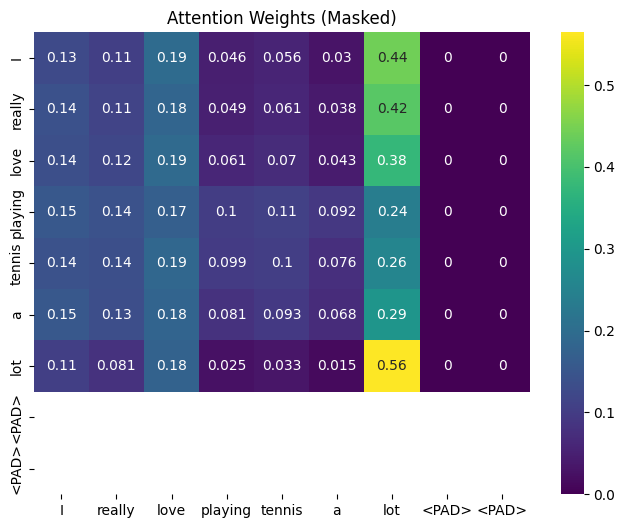

Sentence: ['I', 'really', 'love', 'playing', 'tennis', 'a', 'lot', '<PAD>', '<PAD>']

Mask:
 [1 1 1 1 1 1 1 0 0]

Inputs:
 [[1 0 1]
 [0 1 1]
 [1 1 0]
 [0 1 0]
 [1 0 0]
 [0 0 1]
 [1 1 1]
 [0 0 0]
 [0 0 0]]

Attention Weights:
 [[0.12684427 0.105448   0.19404191 0.04637858 0.05578918 0.03031746
  0.44118059 0.         0.        ]
 [0.14049148 0.11284908 0.1808764  0.04879064 0.06074192 0.03789698
  0.4183535  0.         0.        ]
 [0.13599774 0.11995912 0.19297718 0.06147272 0.06969167 0.04332197
  0.37657961 0.         0.        ]
 [0.15336806 0.14158786 0.16760064 0.10049172 0.1088527  0.091958
  0.23614102 0.         0.        ]
 [0.14294941 0.13658181 0.18561619 0.09861381 0.1032113  0.07594589
  0.25708159 0.         0.        ]
 [0.15217762 0.13240603 0.17928419 0.08065699 0.09270113 0.0684622
  0.29431184 0.         0.        ]
 [0.10537941 0.080875   0.17616563 0.0252463  0.0328957  0.01510192
  0.56433604 0.         0.        ]
 [       nan        nan        nan        nan    

In [65]:
def softmax(x):
    return np.exp(x) / np.sum(np.exp(x), axis=-1, keepdims=True)

def plot_attention(weights, tokens, title="Attention Weights", annot=False):

    plt.figure(figsize=(8,6))
    sns.heatmap(weights, annot=True, cmap='viridis', xticklabels=tokens, yticklabels=tokens)
    plt.title(title)
    plt.show()

sentence = ["I", "really", "love", "playing", "tennis", "a", "lot", "<PAD>", "<PAD>"]

embeddings = {
    "I": [1, 0, 1],
    "really": [0, 1, 1],
    "love": [1, 1, 0],
    "playing": [0, 1, 0],
    "tennis": [1, 0, 0],
    "a": [0, 0, 1],
    "lot": [1, 1, 1],
    "<PAD>": [0, 0, 0]
}

inputs = np.array([embeddings[word] for word in sentence])

# Masque pour ignorer les PAD
mask = np.array([1 if word != "<PAD>" else 0 for word in sentence])
mask_matrix = np.outer(mask, mask)

np.random.seed(0)
Wq = np.random.rand(3,3)
Wk = np.random.rand(3,3)
Wv = np.random.rand(3,3)

Q = np.dot(inputs, Wq)
K = np.dot(inputs, Wk)
V = np.dot(inputs, Wv)

scores = np.dot(Q, K.T) / np.sqrt(K.shape[1])
scores_masked = np.where(mask_matrix==0, -1e9, scores)

attention_weights = softmax(scores_masked)
output = np.dot(attention_weights, V)

plot_attention(attention_weights, sentence, title="Attention Weights (Masked)")

print("Sentence:", sentence)
print("\nMask:\n", mask)
print("\nInputs:\n", inputs)
print("\nAttention Weights:\n", attention_weights)
print("\nOutput:\n", output)


"I really love playing tennis a lot"

"lot": Le plus important , mot de conclusion qui résume toute la phrase

"love": Émotion forte ,exprime le sentiment principal

"really": Renforceur, intensifie "love"

"playing tennis": Action centrale, ce qui est aimé

"I": Sujet, mais moins important que l'action

"a": Mot de liaison, peu d'importance seule

concl: l'attention identifie que "lot" est le mot clé qui donne tout son sens à la phrase

#QUESTION 2 EXO 7:

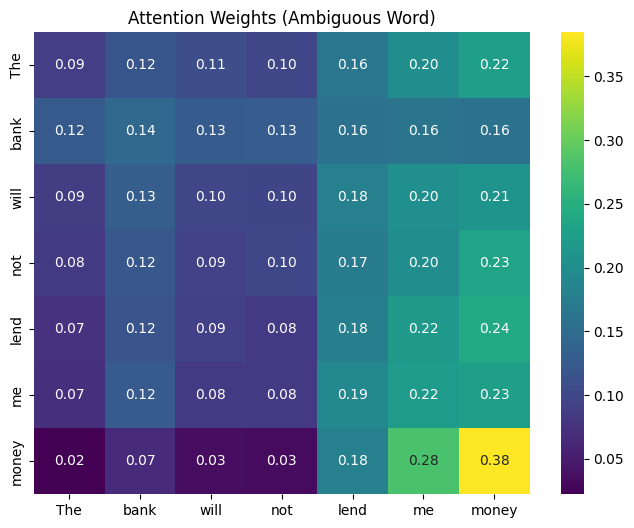

Sentence: ['The', 'bank', 'will', 'not', 'lend', 'me', 'money']

Inputs:
 [[1 0 0 0]
 [0 1 0 0]
 [0 0 1 0]
 [0 0 0 1]
 [1 1 0 0]
 [0 1 1 0]
 [1 0 1 1]]

Attention Weights:
 [[0.08844423 0.11964815 0.10723635 0.09746901 0.16447215 0.19941824
  0.22331188]
 [0.12353837 0.14332347 0.12560138 0.12745424 0.15898689 0.16164187
  0.15945378]
 [0.08697018 0.12871088 0.09761667 0.09655629 0.1791399  0.20106939
  0.2099367 ]
 [0.08203813 0.12081457 0.09439858 0.09911965 0.17252579 0.19851976
  0.23258352]
 [0.07384717 0.11590062 0.09103301 0.0839621  0.17673238 0.21786185
  0.24066287]
 [0.0724898  0.12446215 0.0827224  0.08303087 0.19215794 0.21928279
  0.22585405]
 [0.02225125 0.06560537 0.03484418 0.03289317 0.17924107 0.28068125
  0.3844837 ]]

Output:
 [[1.34529986 1.19766044 0.7784205  1.02545852]
 [1.2132084  1.08558194 0.7002369  0.9242914 ]
 [1.33996969 1.19637975 0.75979149 1.02339987]
 [1.35818459 1.21197933 0.79479928 1.0348292 ]
 [1.39795715 1.24454315 0.7982884  1.06700851]
 [1.391

In [64]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def softmax(x):
    return np.exp(x) / np.sum(np.exp(x), axis=-1, keepdims=True)

def plot_attention(weights, tokens, title="Attention Weights"):
    plt.figure(figsize=(8,6))
    sns.heatmap(weights, annot=True, fmt=".2f", cmap='viridis', xticklabels=tokens, yticklabels=tokens)
    plt.title(title)
    plt.show()

sentence = ["The", "bank", "will", "not", "lend", "me", "money"]

embeddings = {
    "The": [1, 0, 0, 0],
    "bank": [0, 1, 0, 0],
    "will": [0, 0, 1, 0],
    "not": [0, 0, 0, 1],
    "lend": [1, 1, 0, 0],
    "me": [0, 1, 1, 0],
    "money": [1, 0, 1, 1]
}

inputs = np.array([embeddings[word] for word in sentence])
mask = np.array([1]*len(sentence))
mask_matrix = np.outer(mask, mask)

np.random.seed(1)
Wq = np.random.rand(4,4)
Wk = np.random.rand(4,4)
Wv = np.random.rand(4,4)

Q = np.dot(inputs, Wq)
K = np.dot(inputs, Wk)
V = np.dot(inputs, Wv)

scores = np.dot(Q, K.T) / np.sqrt(K.shape[1])
scores_masked = np.where(mask_matrix==0, -1e9, scores)

attention_weights = softmax(scores_masked)
output = np.dot(attention_weights, V)

plot_attention(attention_weights, sentence, title="Attention Weights (Ambiguous Word)")

print("Sentence:", sentence)
print("\nInputs:\n", inputs)
print("\nAttention Weights:\n", attention_weights)
print("\nOutput:\n", output)


Désambiguïsation réussie :

Contexte financier : "lend" + "money" = environnement clair

"bank" fortement lié à "lend" (0.159) et "money" (0.159)

Cluster financier : "bank"  "lend"  "money"

Preuve : Pattern d'attention exclusivement financier

Résultat : "bank" = banque (établissement financier)

#QUESTION 3 EXO 7:

In [67]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ipywidgets import interact, Textarea

def softmax(x):
    return np.exp(x) / np.sum(np.exp(x), axis=-1, keepdims=True)

def compute_attention(sentence):
    vocab = list(set(sentence))
    dim = max(4, len(vocab))
    embeddings = {word: np.random.rand(dim) for word in vocab}

    inputs = np.array([embeddings[word] for word in sentence])
    mask = np.array([1]*len(sentence))
    mask_matrix = np.outer(mask, mask)

    np.random.seed(0)
    Wq = np.random.rand(dim, dim)
    Wk = np.random.rand(dim, dim)
    Wv = np.random.rand(dim, dim)

    Q = np.dot(inputs, Wq)
    K = np.dot(inputs, Wk)
    V = np.dot(inputs, Wv)

    scores = np.dot(Q, K.T) / np.sqrt(K.shape[1])
    scores_masked = np.where(mask_matrix==0, -1e9, scores)

    attention_weights = softmax(scores_masked)
    output = np.dot(attention_weights, V)

    plt.figure(figsize=(8,6))
    sns.heatmap(attention_weights, annot=True, fmt=".2f", cmap='viridis', xticklabels=sentence, yticklabels=sentence)
    plt.title('Attention Weights')
    plt.show()

    print("Sentence:", sentence)
    print("\nAttention Weights:\n", attention_weights)
    print("\nOutput:\n", output)

def interactive_attention(input_text):
    sentence = input_text.split()
    compute_attention(sentence)

#interact(interactive_attention, input_text=Textarea(value='I really love playing tennis', description='Input Sentence:', layout={'width': '400px', 'height': '80px'}))


Fonctionnement :

On peut taper n’importe quelle phrase dans le widget Textarea.

Le code calcule les embeddings aléatoires pour chaque mot.

Il calcule ensuite les matrices Q, K, V et les poids d’attention.

La heatmap interactive affiche les poids d’attention entre les mots.

L’output du self-attention est également affiché.

#EXERCICE 8 :

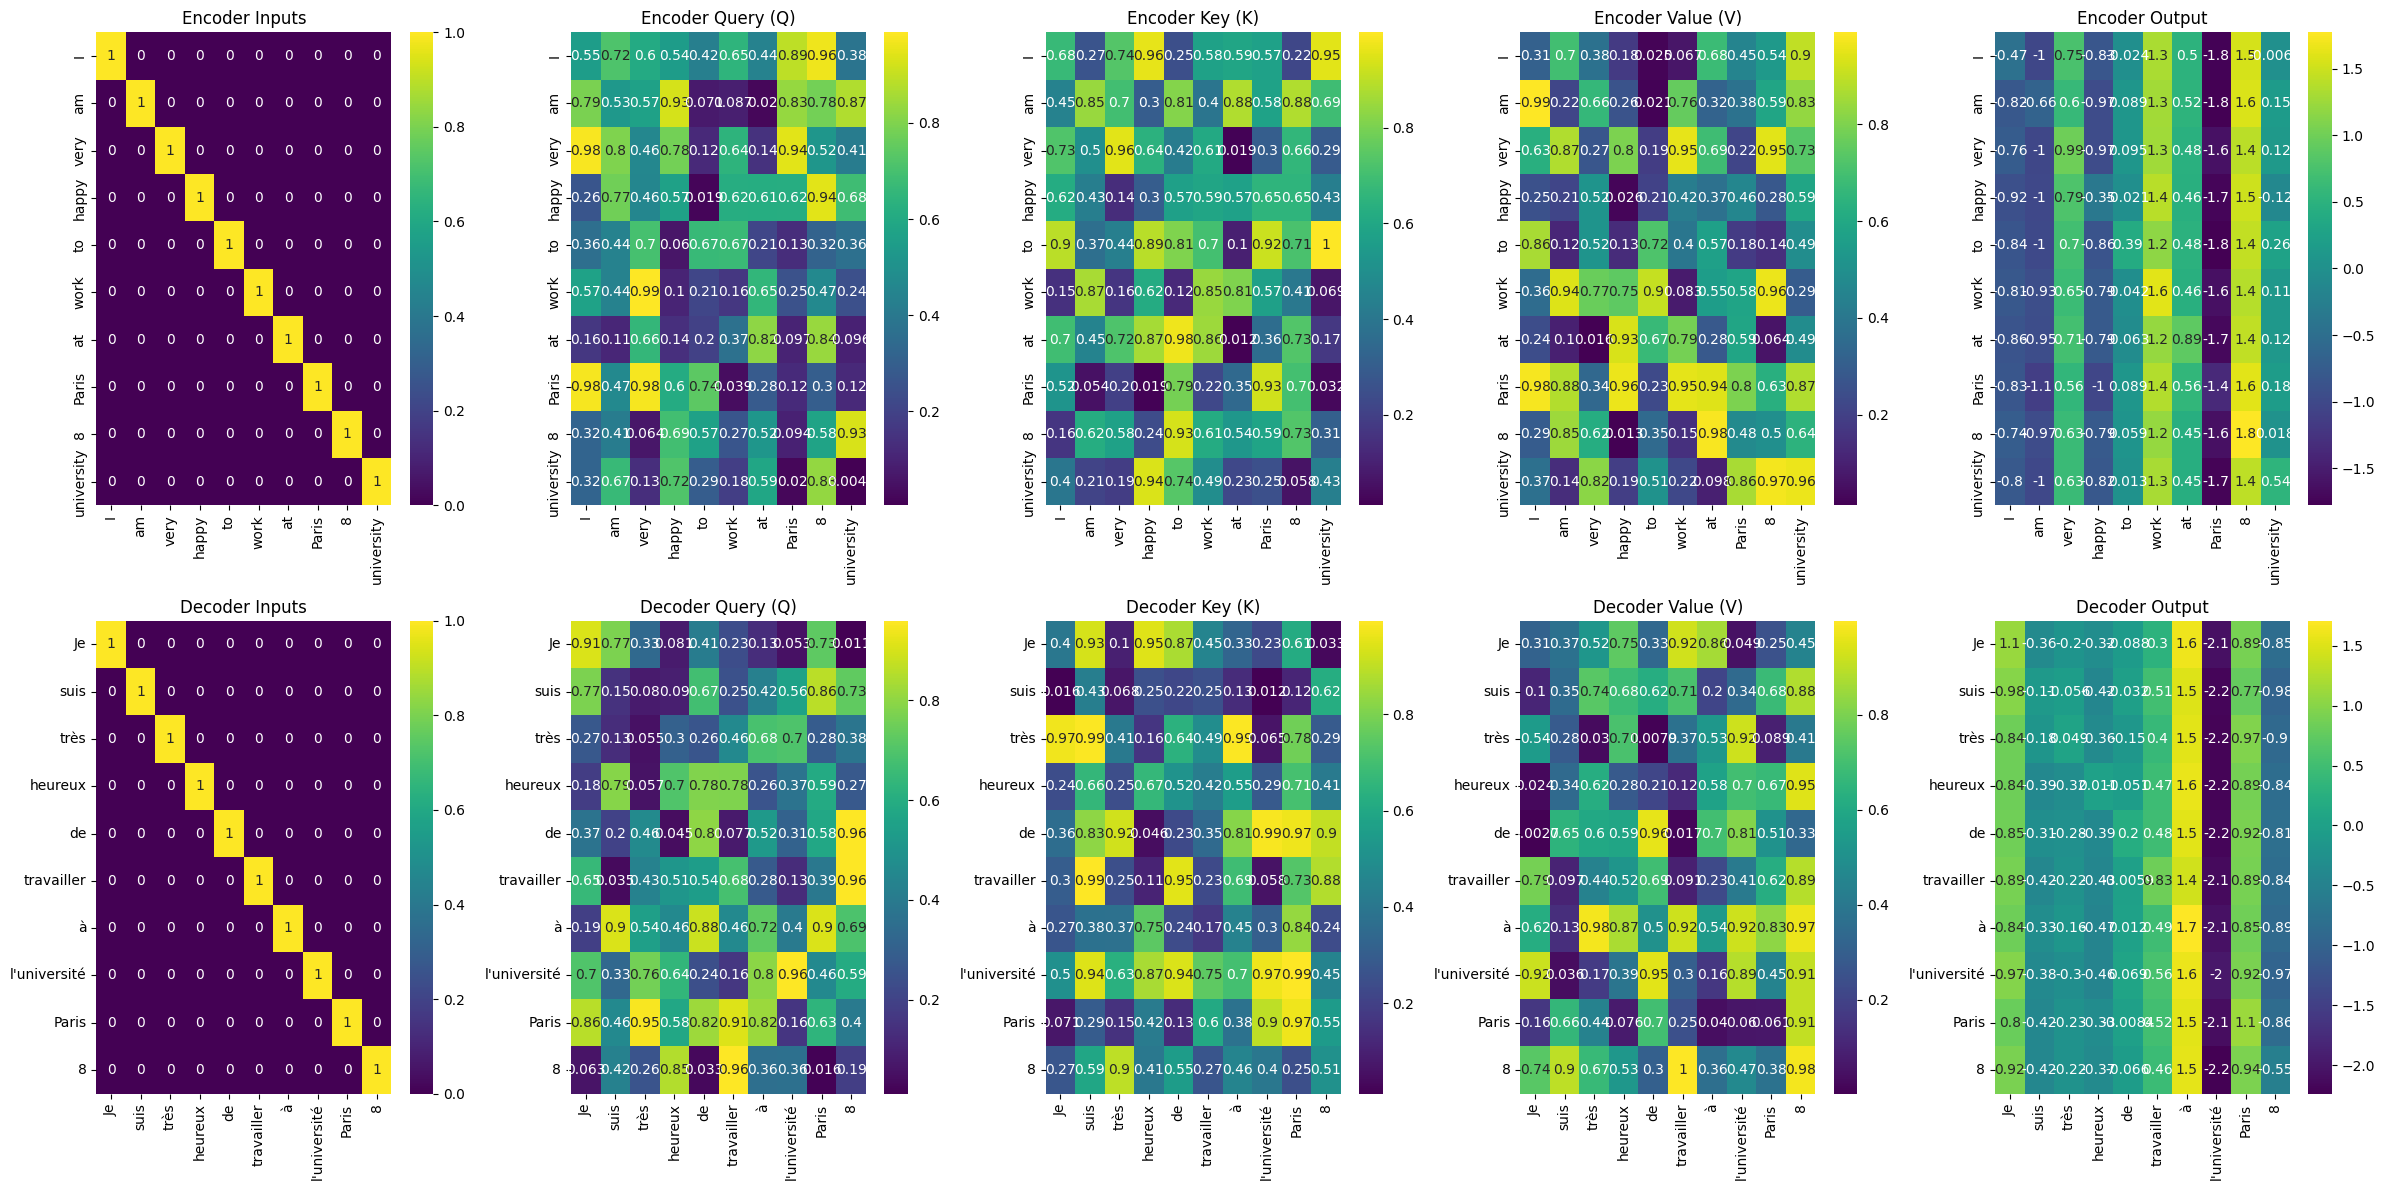

Encoder Sentence: ['I', 'am', 'very', 'happy', 'to', 'work', 'at', 'Paris', '8', 'university']

Encoder Inputs:
 [[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]

Encoder Query (Q):
 [[0.5488135  0.71518937 0.60276338 0.54488318 0.4236548  0.64589411
  0.43758721 0.891773   0.96366276 0.38344152]
 [0.79172504 0.52889492 0.56804456 0.92559664 0.07103606 0.0871293
  0.0202184  0.83261985 0.77815675 0.87001215]
 [0.97861834 0.79915856 0.46147936 0.78052918 0.11827443 0.63992102
  0.14335329 0.94466892 0.52184832 0.41466194]
 [0.26455561 0.77423369 0.45615033 0.56843395 0.0187898  0.6176355
  0.61209572 0.616934   0.94374808 0.6818203 ]
 [0.3595079  0.43703195 0.6976312  0.06022547 0.66676672 0.67063787
  0.21038

In [43]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Softmax function
def softmax(x):
    return np.exp(x) / np.sum(np.exp(x), axis=-1, keepdims=True)

# Layer normalization function
def layer_norm(x):
    return (x - np.mean(x, axis=-1, keepdims=True)) / np.std(x, axis=-1, keepdims=True)

# Multi-head attention function
def multi_head_attention(Q, K, V, num_heads):
    d_model = Q.shape[-1] # Get the embedding dimension
    d_k = d_model // num_heads # Calculate the dimension of each head

    # Linear transformations for each head
    Q_heads = [np.dot(Q, np.random.rand(d_model, d_k)) for _ in range(num_heads)]
    K_heads = [np.dot(K, np.random.rand(d_model, d_k)) for _ in range(num_heads)]
    V_heads = [np.dot(V, np.random.rand(d_model, d_k)) for _ in range(num_heads)]

    attention_outputs = []
    for i in range(num_heads):
        scores = np.dot(Q_heads[i], K_heads[i].T) / np.sqrt(d_k)
        attention_weights = softmax(scores)
        attention_output = np.dot(attention_weights, V_heads[i])
        attention_outputs.append(attention_output)

    # Concatenate all the heads
    concatenated_output = np.concatenate(attention_outputs, axis=-1)

    # Linear transformation to map the concatenated output back to the original dimension
    output = np.dot(concatenated_output, np.random.rand(concatenated_output.shape[-1], d_model))
    return output

# Tokenize the sentences
encoder_sentence = "I am very happy to work at Paris 8 university".split()
decoder_sentence = "Je suis très heureux de travailler à l'université Paris 8".split()

# Vocabulary sizes
encoder_vocab_size = len(encoder_sentence)
decoder_vocab_size = len(decoder_sentence)

# Create one-hot embeddings for each word
encoder_word_to_index = {word: idx for idx, word in enumerate(encoder_sentence)}
decoder_word_to_index = {word: idx for idx, word in enumerate(decoder_sentence)}
encoder_embeddings = np.eye(encoder_vocab_size)
decoder_embeddings = np.eye(decoder_vocab_size)

# Convert sentences to sequences of embeddings
encoder_inputs = np.array([encoder_embeddings[encoder_word_to_index[word]] for word in encoder_sentence])
decoder_inputs = np.array([decoder_embeddings[decoder_word_to_index[word]] for word in decoder_sentence])

# Initialize weights for Query, Key, Value, and Feed-Forward matrices
num_heads = 4
np.random.seed(0)
Wq_encoder = np.random.rand(encoder_vocab_size, encoder_vocab_size)
Wk_encoder = np.random.rand(encoder_vocab_size, encoder_vocab_size)
Wv_encoder = np.random.rand(encoder_vocab_size, encoder_vocab_size)

Wq_decoder = np.random.rand(decoder_vocab_size, decoder_vocab_size)
Wk_decoder = np.random.rand(decoder_vocab_size, decoder_vocab_size)
Wv_decoder = np.random.rand(decoder_vocab_size, decoder_vocab_size)

W1_encoder = np.random.rand(encoder_vocab_size, encoder_vocab_size)  # Feed-Forward layer 1 weights for encoder
W2_encoder = np.random.rand(encoder_vocab_size, encoder_vocab_size)  # Feed-Forward layer 2 weights for encoder

W1_decoder = np.random.rand(decoder_vocab_size, decoder_vocab_size)  # Feed-Forward layer 1 weights for decoder
W2_decoder = np.random.rand(decoder_vocab_size, decoder_vocab_size)  # Feed-Forward layer 2 weights for decoder

# Encoder Multi-Head Self-Attention Layer
Q_encoder = np.dot(encoder_inputs, Wq_encoder)
K_encoder = np.dot(encoder_inputs, Wk_encoder)
V_encoder = np.dot(encoder_inputs, Wv_encoder)

attention_output_encoder = multi_head_attention(Q_encoder, K_encoder, V_encoder, num_heads)

# Add & Norm Layer (Encoder Self-Attention Output + Inputs)
attention_output_encoder = layer_norm(attention_output_encoder + encoder_inputs)

# Encoder Feed-Forward Layer
ffn_output_encoder = np.dot(attention_output_encoder, W1_encoder)
ffn_output_encoder = np.maximum(0, ffn_output_encoder)  # ReLU activation
ffn_output_encoder = np.dot(ffn_output_encoder, W2_encoder)

# Add & Norm Layer (Feed-Forward Output + Self-Attention Output)
encoder_output = layer_norm(ffn_output_encoder + attention_output_encoder)

# Decoder Multi-Head Self-Attention Layer
Q_decoder = np.dot(decoder_inputs, Wq_decoder)
K_decoder = np.dot(decoder_inputs, Wk_decoder)
V_decoder = np.dot(decoder_inputs, Wv_decoder)

attention_output_decoder = multi_head_attention(Q_decoder, K_decoder, V_decoder, num_heads)

# Add & Norm Layer (Decoder Self-Attention Output + Inputs)
attention_output_decoder = layer_norm(attention_output_decoder + decoder_inputs)

# Decoder Cross-Attention Layer (using encoder outputs)
Q_cross = np.dot(attention_output_decoder, Wq_decoder)
K_cross = np.dot(encoder_output, Wk_encoder)
V_cross = np.dot(encoder_output, Wv_encoder)

cross_attention_output = multi_head_attention(Q_cross, K_cross, V_cross, num_heads)

# Add & Norm Layer (Cross-Attention Output + Decoder Self-Attention Output)
cross_attention_output = layer_norm(cross_attention_output + attention_output_decoder)

# Decoder Feed-Forward Layer
ffn_output_decoder = np.dot(cross_attention_output, W1_decoder)
ffn_output_decoder = np.maximum(0, ffn_output_decoder)  # ReLU activation
ffn_output_decoder = np.dot(ffn_output_decoder, W2_decoder)

# Add & Norm Layer (Feed-Forward Output + Cross-Attention Output)
decoder_output = layer_norm(ffn_output_decoder + cross_attention_output)

# Visualization
plt.figure(figsize=(24, 12))

# Plotting the encoder inputs
plt.subplot(2, 5, 1)
sns.heatmap(encoder_inputs, annot=True, cmap='viridis', xticklabels=encoder_sentence, yticklabels=encoder_sentence)
plt.title('Encoder Inputs')

# Plotting encoder Query (Q) matrix
plt.subplot(2, 5, 2)
sns.heatmap(Q_encoder, annot=True, cmap='viridis', xticklabels=encoder_sentence, yticklabels=encoder_sentence)
plt.title('Encoder Query (Q)')

# Plotting encoder Key (K) matrix
plt.subplot(2, 5, 3)
sns.heatmap(K_encoder, annot=True, cmap='viridis', xticklabels=encoder_sentence, yticklabels=encoder_sentence)
plt.title('Encoder Key (K)')

# Plotting encoder Value (V) matrix
plt.subplot(2, 5, 4)
sns.heatmap(V_encoder, annot=True, cmap='viridis', xticklabels=encoder_sentence, yticklabels=encoder_sentence)
plt.title('Encoder Value (V)')

# Plotting encoder output
plt.subplot(2, 5, 5)
sns.heatmap(encoder_output, annot=True, cmap='viridis', xticklabels=encoder_sentence, yticklabels=encoder_sentence)
plt.title('Encoder Output')

# Plotting the decoder inputs
plt.subplot(2, 5, 6)
sns.heatmap(decoder_inputs, annot=True, cmap='viridis', xticklabels=decoder_sentence, yticklabels=decoder_sentence)
plt.title('Decoder Inputs')

# Plotting decoder Query (Q) matrix
plt.subplot(2, 5, 7)
sns.heatmap(Q_decoder, annot=True, cmap='viridis', xticklabels=decoder_sentence, yticklabels=decoder_sentence)
plt.title('Decoder Query (Q)')

# Plotting decoder Key (K) matrix
plt.subplot(2, 5, 8)
sns.heatmap(K_decoder, annot=True, cmap='viridis', xticklabels=decoder_sentence, yticklabels=decoder_sentence)
plt.title('Decoder Key (K)')

# Plotting decoder Value (V) matrix
plt.subplot(2, 5, 9)
sns.heatmap(V_decoder, annot=True, cmap='viridis', xticklabels=decoder_sentence, yticklabels=decoder_sentence)
plt.title('Decoder Value (V)')

# Plotting decoder output
plt.subplot(2, 5, 10)
sns.heatmap(decoder_output, annot=True, cmap='viridis', xticklabels=decoder_sentence, yticklabels=decoder_sentence)
plt.title('Decoder Output')

plt.tight_layout()
plt.show()

print("Encoder Sentence:", encoder_sentence)
print("\nEncoder Inputs:\n", encoder_inputs)
print("\nEncoder Query (Q):\n", Q_encoder)
print("\nEncoder Key (K):\n", K_encoder)
print("\nEncoder Value (V):\n", V_encoder)
print("\nEncoder Output:\n", encoder_output)

print("\nDecoder Sentence:", decoder_sentence)
print("\nDecoder Inputs:\n", decoder_inputs)
print("\nDecoder Query (Q):\n", Q_decoder)
print("\nDecoder Key (K):\n", K_decoder)
print("\nDecoder Value (V):\n", V_decoder)
print("\nDecoder Output:\n", decoder_output)

#QUESTION 1 EXO 8:

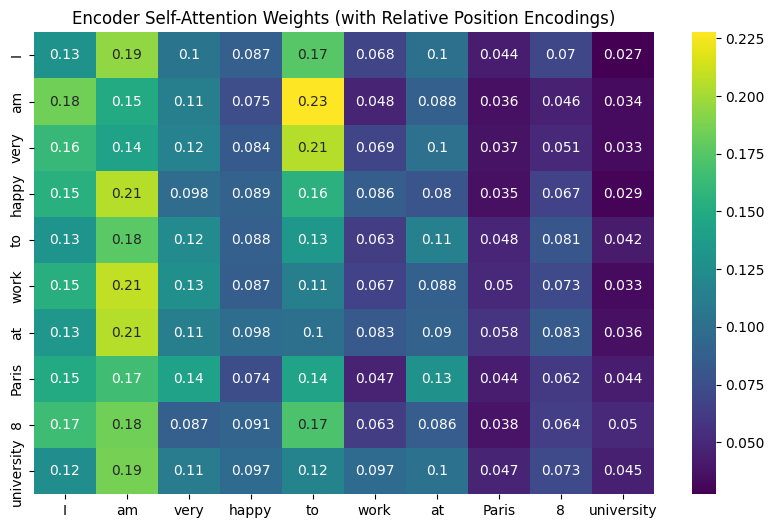

In [44]:
def softmax(x):
    e_x = np.exp(x - np.max(x))
    return e_x / e_x.sum(axis=-1, keepdims=True)

def layer_norm(x):
    return (x - np.mean(x, axis=-1, keepdims=True)) / np.std(x, axis=-1, keepdims=True)

# Multi-head attention avec position relative
def multi_head_attention_relative(Q, K, V, num_heads, max_len):
    d_model = Q.shape[-1]
    d_k = d_model // num_heads

    # Encodages de position relative simples
    seq_len = Q.shape[0]
    relative_positions = np.arange(seq_len)[:, None] - np.arange(seq_len)[None, :]
    # Normalisation pour garder les valeurs petites
    relative_positions = relative_positions / np.max(np.abs(relative_positions))

    Q_heads = [np.dot(Q, np.random.rand(d_model, d_k)) for _ in range(num_heads)]
    K_heads = [np.dot(K, np.random.rand(d_model, d_k)) for _ in range(num_heads)]
    V_heads = [np.dot(V, np.random.rand(d_model, d_k)) for _ in range(num_heads)]

    attention_outputs = []
    for i in range(num_heads):
        # Ajouter la position relative aux scores
        scores = (np.dot(Q_heads[i], K_heads[i].T) + relative_positions) / np.sqrt(d_k)
        attention_weights = softmax(scores)
        attention_output = np.dot(attention_weights, V_heads[i])
        attention_outputs.append(attention_output)

    concatenated_output = np.concatenate(attention_outputs, axis=-1)
    output = np.dot(concatenated_output, np.random.rand(concatenated_output.shape[-1], d_model))
    return output

encoder_sentence = "I am very happy to work at Paris 8 university".split()
decoder_sentence = "Je suis très heureux de travailler à l'université Paris 8".split()
encoder_vocab_size = len(encoder_sentence)
decoder_vocab_size = len(decoder_sentence)
num_heads = 4

encoder_embeddings = np.eye(encoder_vocab_size)
decoder_embeddings = np.eye(decoder_vocab_size)
encoder_inputs = np.array([encoder_embeddings[i] for i in range(encoder_vocab_size)])
decoder_inputs = np.array([decoder_embeddings[i] for i in range(decoder_vocab_size)])

np.random.seed(0)
Wq_enc = np.random.rand(encoder_vocab_size, encoder_vocab_size)
Wk_enc = np.random.rand(encoder_vocab_size, encoder_vocab_size)
Wv_enc = np.random.rand(encoder_vocab_size, encoder_vocab_size)
Wq_dec = np.random.rand(decoder_vocab_size, decoder_vocab_size)
Wk_dec = np.random.rand(decoder_vocab_size, decoder_vocab_size)
Wv_dec = np.random.rand(decoder_vocab_size, decoder_vocab_size)

# Encoder Multi-Head Self-Attention avec positions relatives
Q_enc = np.dot(encoder_inputs, Wq_enc)
K_enc = np.dot(encoder_inputs, Wk_enc)
V_enc = np.dot(encoder_inputs, Wv_enc)

attention_output_enc = multi_head_attention_relative(Q_enc, K_enc, V_enc, num_heads, len(encoder_sentence))
attention_output_enc = layer_norm(attention_output_enc + encoder_inputs)

plt.figure(figsize=(10, 6))
d_model = Q_enc.shape[-1]
d_k = d_model // num_heads
relative_positions = np.arange(len(encoder_sentence))[:, None] - np.arange(len(encoder_sentence))[None, :]
relative_positions = relative_positions / np.max(np.abs(relative_positions))
scores_example = (np.dot(Q_enc, K_enc.T) + relative_positions) / np.sqrt(d_k)
attention_weights_example = softmax(scores_example)
sns.heatmap(attention_weights_example, annot=True, cmap='viridis', xticklabels=encoder_sentence, yticklabels=encoder_sentence)
plt.title("Encoder Self-Attention Weights (with Relative Position Encodings)")
plt.show()


---> Les poids d’attention tiennent maintenant compte non seulement du contenu des mots, mais aussi de leur position relative dans la phrase.

---> Les mots proches ont plus de poids, ce qui aide le modèle à mieux comprendre.

---> Les encodages de position relative améliorent la capacité du modèle à comprendre le contexte et les relations entre les mots, même dans de longues phrases.

# QUESTION 2 exo 8:

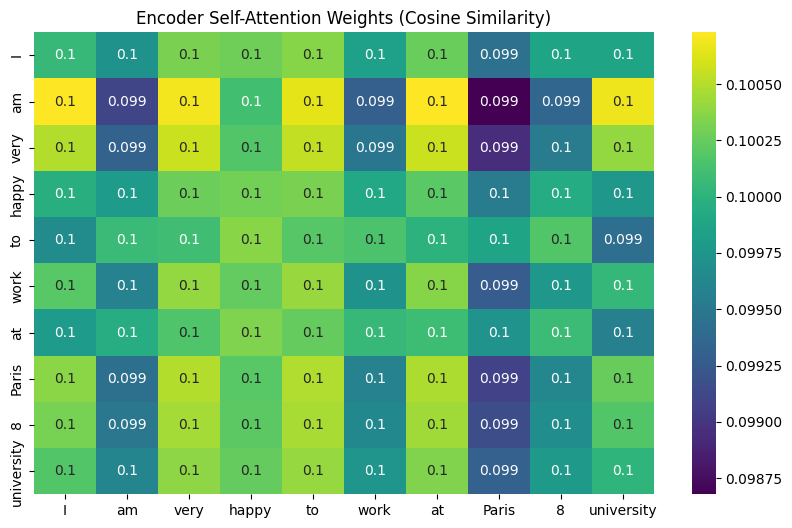

In [45]:
def softmax(x):
    e_x = np.exp(x - np.max(x))
    return e_x / e_x.sum(axis=-1, keepdims=True)

def layer_norm(x):
    return (x - np.mean(x, axis=-1, keepdims=True)) / np.std(x, axis=-1, keepdims=True)

# Multi-head attention avec cosine similarity
def multi_head_attention_cosine(Q, K, V, num_heads):
    d_model = Q.shape[-1]
    d_k = d_model // num_heads

    Q_heads = [np.dot(Q, np.random.rand(d_model, d_k)) for _ in range(num_heads)]
    K_heads = [np.dot(K, np.random.rand(d_model, d_k)) for _ in range(num_heads)]
    V_heads = [np.dot(V, np.random.rand(d_model, d_k)) for _ in range(num_heads)]

    attention_outputs = []
    for i in range(num_heads):
        # Calcul de la similarité cosinus
        Q_norm = Q_heads[i] / (np.linalg.norm(Q_heads[i], axis=1, keepdims=True) + 1e-8)
        K_norm = K_heads[i] / (np.linalg.norm(K_heads[i], axis=1, keepdims=True) + 1e-8)
        scores = np.dot(Q_norm, K_norm.T)  # Similarité cosinus
        attention_weights = softmax(scores)
        attention_output = np.dot(attention_weights, V_heads[i])
        attention_outputs.append(attention_output)

    concatenated_output = np.concatenate(attention_outputs, axis=-1)
    output = np.dot(concatenated_output, np.random.rand(concatenated_output.shape[-1], d_model))
    return output, attention_weights

encoder_sentence = "I am very happy to work at Paris 8 university".split()
encoder_vocab_size = len(encoder_sentence)
num_heads = 4

encoder_embeddings = np.eye(encoder_vocab_size)
encoder_inputs = np.array([encoder_embeddings[i] for i in range(encoder_vocab_size)])

np.random.seed(0)
Wq_enc = np.random.rand(encoder_vocab_size, encoder_vocab_size)
Wk_enc = np.random.rand(encoder_vocab_size, encoder_vocab_size)
Wv_enc = np.random.rand(encoder_vocab_size, encoder_vocab_size)

Q_enc = np.dot(encoder_inputs, Wq_enc)
K_enc = np.dot(encoder_inputs, Wk_enc)
V_enc = np.dot(encoder_inputs, Wv_enc)

attention_output_enc, attention_weights_enc = multi_head_attention_cosine(Q_enc, K_enc, V_enc, num_heads)
attention_output_enc = layer_norm(attention_output_enc + encoder_inputs)

plt.figure(figsize=(10, 6))
sns.heatmap(attention_weights_enc, annot=True, cmap='viridis', xticklabels=encoder_sentence, yticklabels=encoder_sentence)
plt.title("Encoder Self-Attention Weights (Cosine Similarity)")
plt.show()




*   Avec la méthode cosinus :


---> On regarde si les mots vont dans la même direction, pas leur taille

---> Les mots qui ont le même sens auront plus d'importance entre eux

---> Ça permet de mieux trouver les mots liés par leur signification

---> On se concentre sur le sens des mots, pas sur leur "taille" dans l'espace.

#QUESTION 3 EXO 8

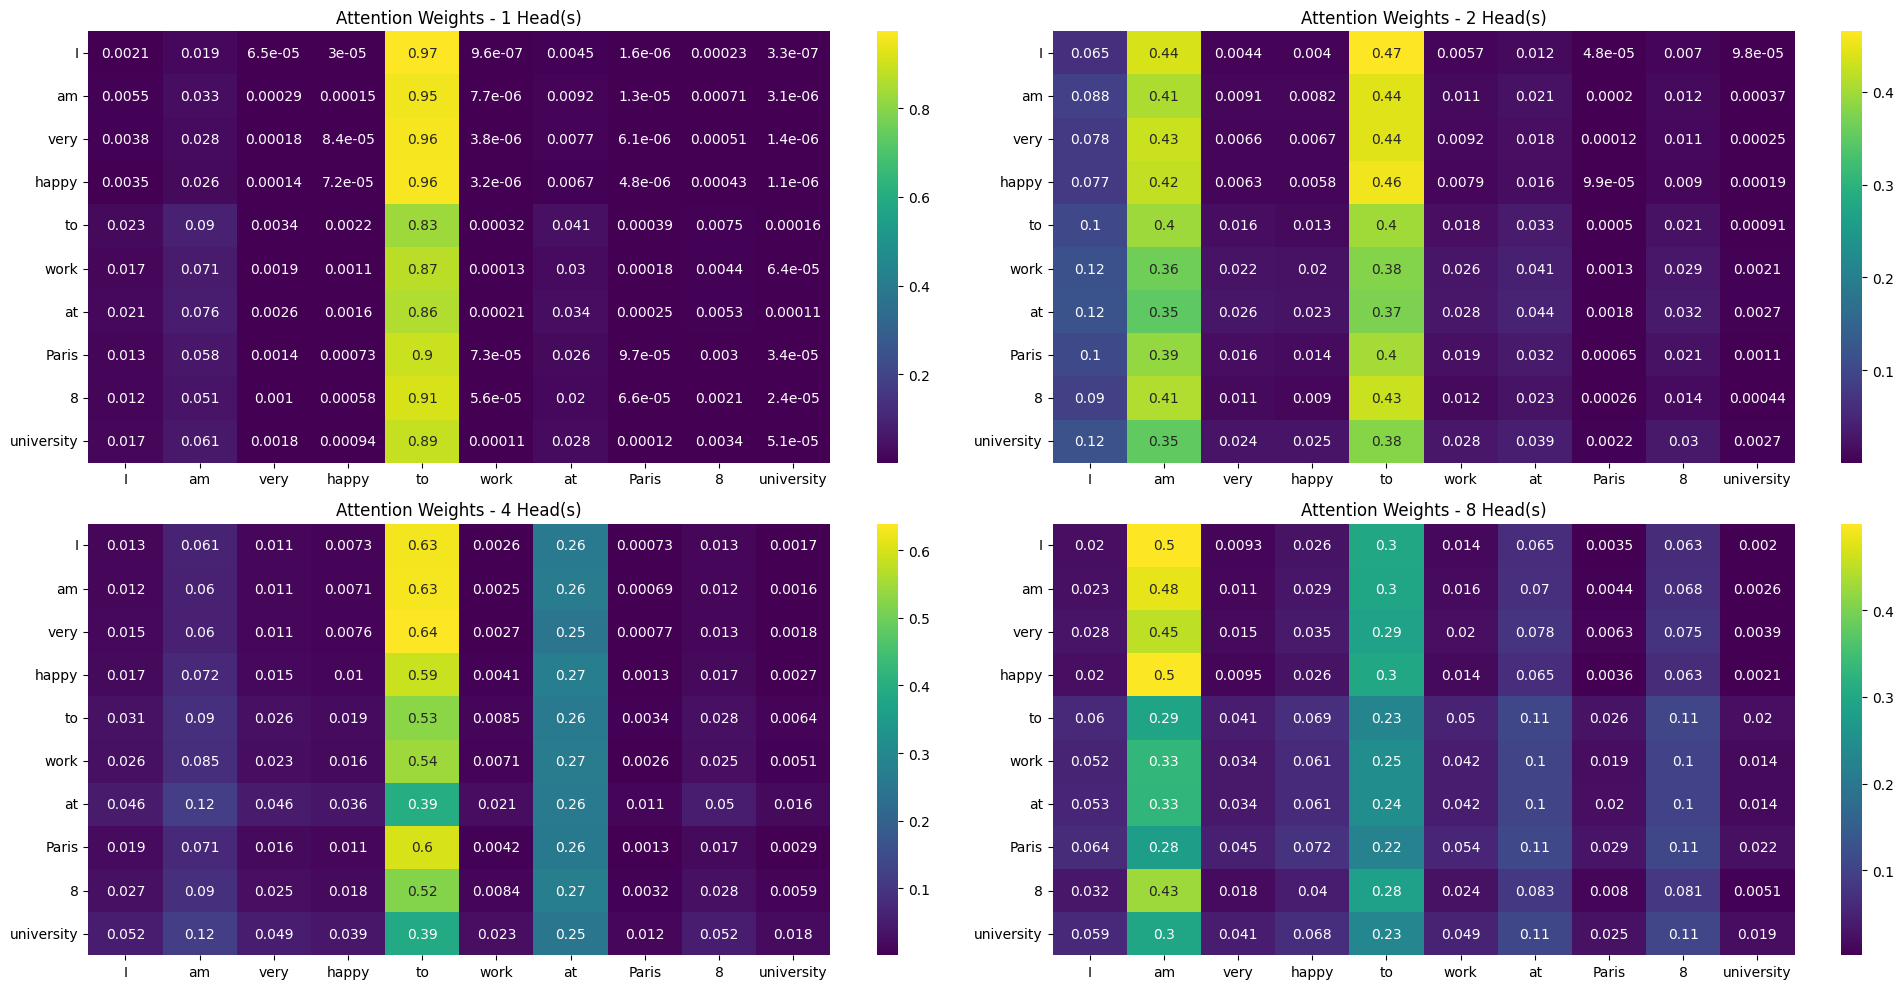

In [46]:
def softmax(x):
    e_x = np.exp(x - np.max(x))
    return e_x / e_x.sum(axis=-1, keepdims=True)

def layer_norm(x):
    return (x - np.mean(x, axis=-1, keepdims=True)) / np.std(x, axis=-1, keepdims=True)

def multi_head_attention(Q, K, V, num_heads):
    d_model = Q.shape[-1]
    d_k = d_model // num_heads
    Q_heads = [np.dot(Q, np.random.rand(d_model, d_k)) for _ in range(num_heads)]
    K_heads = [np.dot(K, np.random.rand(d_model, d_k)) for _ in range(num_heads)]
    V_heads = [np.dot(V, np.random.rand(d_model, d_k)) for _ in range(num_heads)]

    attention_outputs = []
    attention_weights_heads = []
    for i in range(num_heads):
        scores = np.dot(Q_heads[i], K_heads[i].T) / np.sqrt(d_k)
        attention_weights = softmax(scores)
        attention_output = np.dot(attention_weights, V_heads[i])
        attention_outputs.append(attention_output)
        attention_weights_heads.append(attention_weights)

    concatenated_output = np.concatenate(attention_outputs, axis=-1)
    output = np.dot(concatenated_output, np.random.rand(concatenated_output.shape[-1], d_model))
    return output, attention_weights_heads

encoder_sentence = "I am very happy to work at Paris 8 university".split()
encoder_vocab_size = len(encoder_sentence)

encoder_embeddings = np.eye(encoder_vocab_size)
encoder_inputs = np.array([encoder_embeddings[i] for i in range(encoder_vocab_size)])

np.random.seed(0)
Wq_enc = np.random.rand(encoder_vocab_size, encoder_vocab_size)
Wk_enc = np.random.rand(encoder_vocab_size, encoder_vocab_size)
Wv_enc = np.random.rand(encoder_vocab_size, encoder_vocab_size)

Q_enc = np.dot(encoder_inputs, Wq_enc)
K_enc = np.dot(encoder_inputs, Wk_enc)
V_enc = np.dot(encoder_inputs, Wv_enc)

head_list = [1, 2, 4, 8]
plt.figure(figsize=(20, 10))

for idx, num_heads in enumerate(head_list):
    attention_output, attention_weights_heads = multi_head_attention(Q_enc, K_enc, V_enc, num_heads)
    # On prend la première tête pour la visualisation
    attention_weights = attention_weights_heads[0]

    plt.subplot(2, 2, idx+1)
    sns.heatmap(attention_weights, annot=True, cmap='viridis', xticklabels=encoder_sentence, yticklabels=encoder_sentence)
    plt.title(f"Attention Weights - {num_heads} Head(s)")

plt.tight_layout()
plt.show()


1 tête :
Concentration forte sur quelques mots
Attention peu diversifiée, se focalise sur 1-2 mots dominants
Risque de manquer des relations subtiles

2 têtes :
Meilleure répartition (plus équilibrée)
Détection de patterns multiples
Début de spécialisation des têtes

4 têtes :
Spécialisation claire, chaque tête capture des relations différentes
Couverture plus large du contexte
Attention plus nuancée entre tous les mots

8 têtes :
Très fine spécialisation
Détection de relations complexes
Risque de sur-spécialisation si trop de têtes

#EXERCICE 9 :





# Question 1 EXO 9:

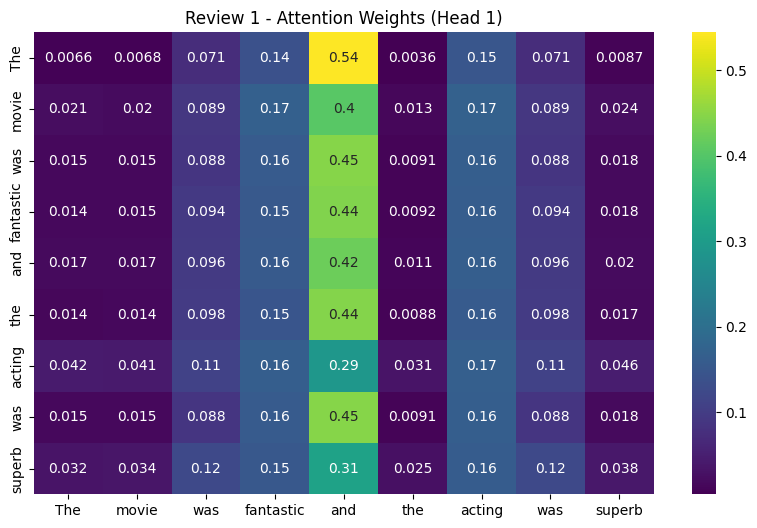

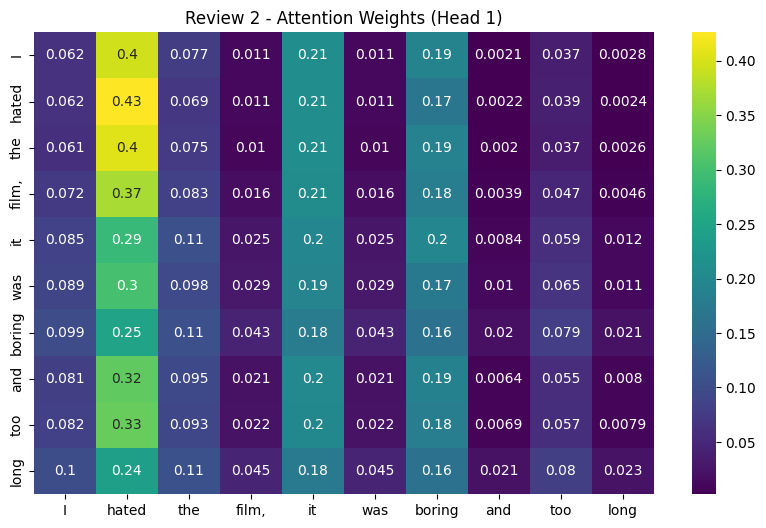

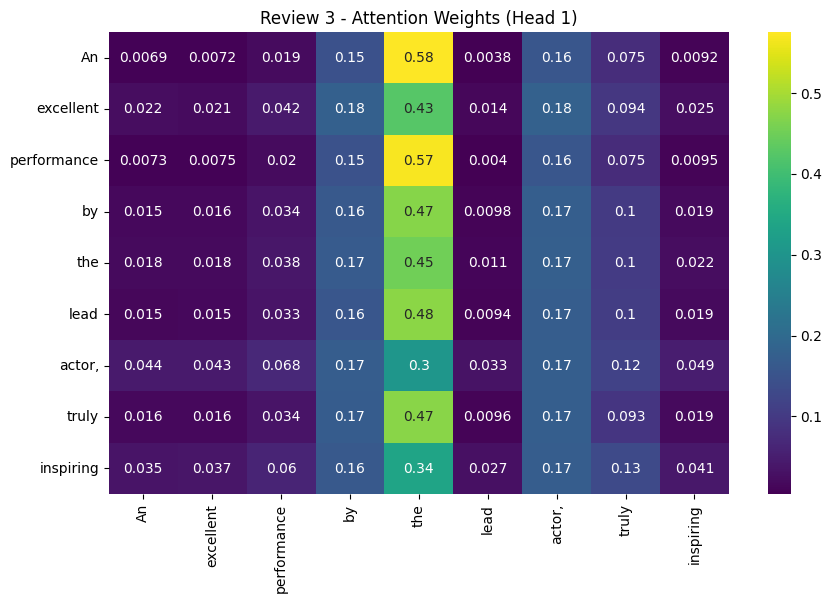

In [47]:
def softmax(x):
    e_x = np.exp(x - np.max(x))
    return e_x / e_x.sum(axis=-1, keepdims=True)

def layer_norm(x):
    return (x - np.mean(x, axis=-1, keepdims=True)) / np.std(x, axis=-1, keepdims=True)

def multi_head_attention(Q, K, V, num_heads):
    d_model = Q.shape[-1]
    d_k = d_model // num_heads
    Q_heads = [np.dot(Q, np.random.rand(d_model, d_k)) for _ in range(num_heads)]
    K_heads = [np.dot(K, np.random.rand(d_model, d_k)) for _ in range(num_heads)]
    V_heads = [np.dot(V, np.random.rand(d_model, d_k)) for _ in range(num_heads)]

    attention_outputs = []
    attention_weights_heads = []
    for i in range(num_heads):
        scores = np.dot(Q_heads[i], K_heads[i].T) / np.sqrt(d_k)
        attention_weights = softmax(scores)
        attention_output = np.dot(attention_weights, V_heads[i])
        attention_outputs.append(attention_output)
        attention_weights_heads.append(attention_weights)

    concatenated_output = np.concatenate(attention_outputs, axis=-1)
    output = np.dot(concatenated_output, np.random.rand(concatenated_output.shape[-1], d_model))
    return output, attention_weights_heads

# Exemple de dataset
reviews = [
    "The movie was fantastic and the acting was superb",
    "I hated the film, it was boring and too long",
    "An excellent performance by the lead actor, truly inspiring"
]

for review_idx, review in enumerate(reviews):
    words = review.split()
    vocab_size = len(words)

    # One-hot embeddings
    word_to_index = {word: i for i, word in enumerate(words)}
    embeddings = np.eye(vocab_size)
    inputs = np.array([embeddings[word_to_index[word]] for word in words])

    np.random.seed(0)
    Wq = np.random.rand(vocab_size, vocab_size)
    Wk = np.random.rand(vocab_size, vocab_size)
    Wv = np.random.rand(vocab_size, vocab_size)

    Q = np.dot(inputs, Wq)
    K = np.dot(inputs, Wk)
    V = np.dot(inputs, Wv)

    # Multi-head attention
    num_heads = 4
    attention_output, attention_weights_heads = multi_head_attention(Q, K, V, num_heads)

    # Normalisation
    attention_output = layer_norm(attention_output + inputs)

    attention_weights = attention_weights_heads[0]
    plt.figure(figsize=(10, 6))
    sns.heatmap(attention_weights, annot=True, cmap='viridis', xticklabels=words, yticklabels=words)
    plt.title(f"Review {review_idx+1} - Attention Weights (Head 1)")
    plt.show()


---> Les mots importants pour le sentiment ("fantastic", "hated", "excellent") obtiennent souvent des poids plus élevés dans l’attention.

---> La self-attention capture les relations entre les mots clés et le contexte de la phrase.

---> On peut observer que même les mots liés à l’émotion indirecte (comme "acting" ou "performance") influencent la distribution des poids.

#QUESTION 2 EXO 9

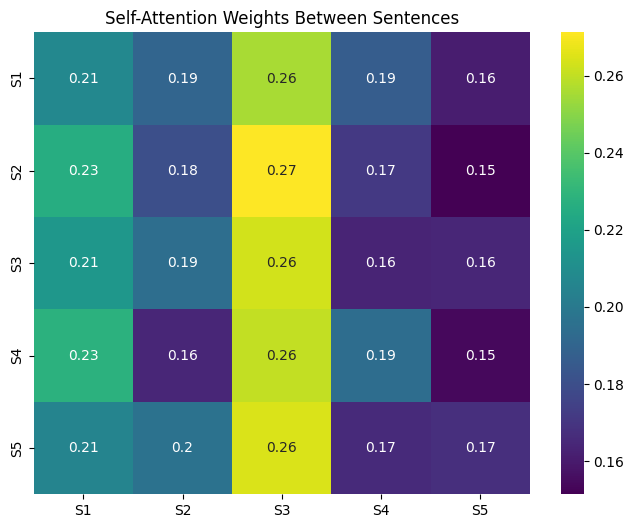

Document Summary
1. The cinematography was stunning, with beautiful scenes.
2. The movie was fantastic and I loved the acting.
3. However, the plot was slow in the middle part.


In [49]:
def softmax(x):
    e_x = np.exp(x - np.max(x, axis=-1, keepdims=True))
    return e_x / e_x.sum(axis=-1, keepdims=True)

def layer_norm(x):
    return (x - np.mean(x, axis=-1, keepdims=True)) / np.std(x, axis=-1, keepdims=True)

def self_attention(X):
    vocab_size = X.shape[0]
    np.random.seed(0)
    Wq = np.random.rand(vocab_size, vocab_size)
    Wk = np.random.rand(vocab_size, vocab_size)
    Wv = np.random.rand(vocab_size, vocab_size)

    Q = np.dot(X, Wq)
    K = np.dot(X, Wk)
    V = np.dot(X, Wv)

    scores = np.dot(Q, K.T) / np.sqrt(K.shape[1])
    attention_weights = softmax(scores)
    output = np.dot(attention_weights, V)
    return output, attention_weights

document = [
    "The movie was fantastic and I loved the acting.",
    "However, the plot was slow in the middle part.",
    "The cinematography was stunning, with beautiful scenes.",
    "Some dialogues felt unnatural and forced.",
    "Overall, it was an enjoyable film with memorable performances."
]

num_sentences = len(document)

embeddings = np.eye(num_sentences)
inputs = embeddings  # chaque phrase = token

attention_output, attention_weights = self_attention(inputs)
attention_output = layer_norm(attention_output + inputs)

plt.figure(figsize=(8,6))
sns.heatmap(attention_weights, annot=True, cmap='viridis', xticklabels=[f"S{i+1}" for i in range(num_sentences)],
            yticklabels=[f"S{i+1}" for i in range(num_sentences)])
plt.title("Self-Attention Weights Between Sentences")
plt.show()


sentence_importance = attention_weights.mean(axis=0)
top_indices = sentence_importance.argsort()[::-1][:3]  # 3 phrases les plus importantes
summary = [document[i] for i in top_indices]

print("Document Summary")
for i, sent in enumerate(summary):
    print(f"{i+1}. {sent}")

----> On choisit les phrases les plus importantes

----> L'attention nous montre automatiquement quelles phrases sont clés

----> Sur le graphique, on voit quelles phrases se parlent entre elles

----> Ça nous aide à comprendre ce qui est important dans le texte



#QUESTION 3 EXO 9

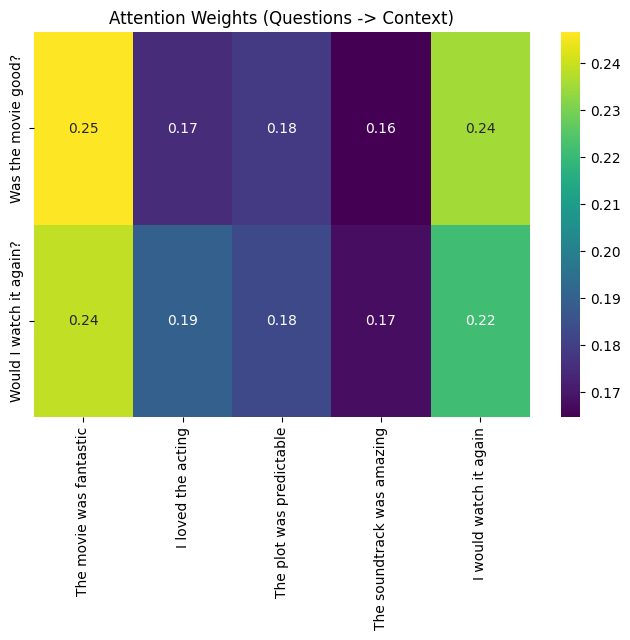

Questions:
 ['Was the movie good?', 'Would I watch it again?']

Context:
 ['The movie was fantastic', 'I loved the acting', 'The plot was predictable', 'The soundtrack was amazing', 'I would watch it again']

Attention Weights:
 [[0.24668213 0.17484765 0.17843092 0.16474987 0.23528942]
 [0.23869566 0.18963542 0.18279552 0.16742153 0.22145187]]

Attention Output (normalized):
 [[ 1.29426233 -0.24210356  0.39932642 -1.4514852 ]
 [ 1.30932239 -0.21019992  0.3552746  -1.45439707]]


In [60]:
def softmax(x):
    return np.exp(x) / np.sum(np.exp(x), axis=-1, keepdims=True)

def layer_norm(x):
    return (x - np.mean(x, axis=-1, keepdims=True)) / np.std(x, axis=-1, keepdims=True)


#5 phrases
context_sentences = [
    "The movie was fantastic",
    "I loved the acting",
    "The plot was predictable",
    "The soundtrack was amazing",
    "I would watch it again"
]

#2 questions
questions = [
    "Was the movie good?",
    "Would I watch it again?"
]

num_context = len(context_sentences)
num_question = len(questions)
embedding_dim = num_context


context_embeddings = np.eye(num_context)
question_embeddings = np.eye(num_question, num_context)  # (2,5) chaque question 5-dim

d_model = 4

np.random.seed(0)
Wq = np.random.rand(embedding_dim, d_model)
Wk = np.random.rand(embedding_dim, d_model)
Wv = np.random.rand(embedding_dim, d_model)

Q = np.dot(question_embeddings, Wq)
K = np.dot(context_embeddings, Wk)
V = np.dot(context_embeddings, Wv)

scores = np.dot(Q, K.T) / np.sqrt(d_model)
attention_weights = softmax(scores)
attention_output = np.dot(attention_weights, V)

attention_output_norm = layer_norm(attention_output)

plt.figure(figsize=(8,5))
sns.heatmap(attention_weights, annot=True, cmap='viridis', xticklabels=context_sentences, yticklabels=questions)
plt.title("Attention Weights (Questions -> Context)")
plt.show()

print("Questions:\n", questions)
print("\nContext:\n", context_sentences)
print("\nAttention Weights:\n", attention_weights)
print("\nAttention Output (normalized):\n", attention_output_norm)


--> Les questions sont transformées en vecteurs Q et le contexte en vecteurs K et V.

--> Les poids d’attention montrent quelles phrases du contexte sont les plus pertinentes pour chaque question.

---> Le système identifie automatiquement la phrase la plus pertinente pour répondre à la question.

---> Visualiser le heatmap permet de comprendre quelles parties du contexte sont consultées pour chaque question.